In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import scipy as s
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
Sepsisdata = pd.read_csv('/content/gdrive/My Drive/dataSepsis.csv',sep=';')
Sepsisdata.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,NaN,NaN,NaN,NaN,30.0,NaN,21.0,45.0,NaN,7.37,90.0,91.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,17,0
1,58.0,95.0,36.11,143.0,77.0,47.0,11.0,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,7.9,113.0,2.5,NaN,78.0,NaN,2.5,4.4,5.1,NaN,NaN,27.8,9.7,NaN,11.0,NaN,158.0,75.91,0,0.0,1.0,-98.60,10,0
2,91.0,94.0,38.50,133.0,74.0,48.0,34.0,NaN,NaN,31.0,0.8,NaN,NaN,NaN,NaN,30.0,NaN,10.9,98.0,0.9,NaN,113.0,NaN,2.4,2.3,3.8,NaN,NaN,26.2,8.8,30.5,8.3,NaN,465.0,45.82,0,1.0,0.0,-1195.71,11,0
3,92.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,111.0,0.7,NaN,73.0,NaN,NaN,NaN,3.8,NaN,NaN,36.9,12.2,NaN,12.0,NaN,298.0,52.01,1,1.0,0.0,-0.03,13,0
4,155.5,94.5,NaN,147.5,102.0,NaN,33.0,NaN,-12.0,13.0,1.0,7.22,36.0,NaN,452.0,68.0,88.0,5.9,113.0,3.8,NaN,263.0,2.2,1.9,3.8,4.6,1.4,NaN,45.0,15.8,26.6,9.3,NaN,26.0,64.24,1,1.0,0.0,-0.05,2,0
5,73.0,99.0,36.06,100.0,67.0,49.5,16.5,NaN,-8.0,16.0,NaN,7.27,37.0,NaN,NaN,28.0,NaN,7.4,105.0,1.2,NaN,129.0,1.8,1.8,3.5,4.5,NaN,NaN,32.9,11.4,NaN,11.4,NaN,357.0,87.08,1,NaN,NaN,-2.23,2,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,25.0,NaN,7.35,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,2.7,NaN,NaN,4.0,NaN,NaN,30.0,9.9,NaN,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,257,1
7,82.0,100.0,35.50,112.0,79.5,63.0,14.0,NaN,0.0,23.0,1.0,7.42,37.0,NaN,NaN,18.0,NaN,NaN,109.0,0.9,NaN,116.0,NaN,NaN,NaN,3.9,NaN,NaN,27.9,9.5,29.9,8.7,NaN,115.0,76.71,0,0.0,1.0,-2.36,3,0
8,89.0,100.0,NaN,141.0,85.0,57.0,17.0,NaN,1.0,25.0,NaN,7.43,37.0,NaN,NaN,9.0,NaN,8.4,110.0,0.7,NaN,137.0,1.0,2.5,2.2,3.5,NaN,NaN,32.2,11.2,NaN,10.6,NaN,184.0,65.79,1,NaN,NaN,-0.02,35,1
9,100.0,95.0,37.28,121.0,20.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,32.0,NaN,7.8,115.0,0.9,NaN,88.0,NaN,1.9,2.9,3.9,NaN,NaN,26.5,9.0,25.8,7.3,NaN,127.0,81.64,1,1.0,0.0,-0.03,16,0


In [ ]:
Sepsisdata.shape

(36302, 41)

In [ ]:
Sepsisdata.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [ ]:
Sepsisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                35506 non-null  float64
 1   O2Sat             34736 non-null  float64
 2   Temp              17101 non-null  float64
 3   SBP               34617 non-null  float64
 4   MAP               34846 non-null  float64
 5   DBP               27917 non-null  float64
 6   Resp              33890 non-null  float64
 7   EtCO2             1613 non-null   float64
 8   BaseExcess        7184 non-null   float64
 9   HCO3              16984 non-null  float64
 10  FiO2              6427 non-null   float64
 11  pH                9221 non-null   float64
 12  PaCO2             8430 non-null   float64
 13  SaO2              4335 non-null   float64
 14  AST               10391 non-null  float64
 15  BUN               32526 non-null  float64
 16  Alkalinephos      10269 non-null  float6

In [ ]:
Sepsisdata.isnull().sum()

HR                    796
O2Sat                1566
Temp                19201
SBP                  1685
MAP                  1456
DBP                  8385
Resp                 2412
EtCO2               34689
BaseExcess          29118
HCO3                19318
FiO2                29875
pH                  27081
PaCO2               27872
SaO2                31967
AST                 25911
BUN                  3776
Alkalinephos        26033
Calcium              7679
Chloride            18937
Creatinine           4042
Bilirubin_direct    35170
Glucose              3045
Lactate             32168
Magnesium            8631
Phosphate           14534
Potassium            3593
Bilirubin_total     25989
TroponinI           32556
Hct                  4122
Hgb                  4486
PTT                 22427
WBC                  4842
Fibrinogen          34161
Platelets            4833
Age                     0
Gender                  0
Unit1               14081
Unit2               14081
HospAdmTime 

In [ ]:
missing_percent=(Sepsisdata.isnull().sum()/Sepsisdata.shape[0])*100
missing_percent

HR                   2.192717
O2Sat                4.313812
Temp                52.892403
SBP                  4.641618
MAP                  4.010798
DBP                 23.097901
Resp                 6.644262
EtCO2               95.556719
BaseExcess          80.210457
HCO3                53.214699
FiO2                82.295741
pH                  74.599196
PaCO2               76.778139
SaO2                88.058509
AST                 71.376233
BUN                 10.401631
Alkalinephos        71.712302
Calcium             21.153105
Chloride            52.165170
Creatinine          11.134373
Bilirubin_direct    96.881715
Glucose              8.387968
Lactate             88.612198
Magnesium           23.775550
Phosphate           40.036362
Potassium            9.897526
Bilirubin_total     71.591097
TroponinI           89.681009
Hct                 11.354746
Hgb                 12.357446
PTT                 61.778965
WBC                 13.338108
Fibrinogen          94.102253
Platelets 

In [ ]:
duplicate = Sepsisdata[Sepsisdata.duplicated()]
duplicate

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis


In [ ]:
new_cols = list(missing_percent[missing_percent < 92].index)

In [ ]:
Sepsisdata = Sepsisdata[new_cols]

In [ ]:
Sepsisdata.shape

(36302, 38)

In [ ]:
new_missing_data = Sepsisdata.isnull().sum()
new_missing_percent = (new_missing_data/Sepsisdata.shape[0])*100
new_missing_percent

HR                  2.192717
O2Sat               4.313812
Temp               52.892403
SBP                 4.641618
MAP                 4.010798
DBP                23.097901
Resp                6.644262
BaseExcess         80.210457
HCO3               53.214699
FiO2               82.295741
pH                 74.599196
PaCO2              76.778139
SaO2               88.058509
AST                71.376233
BUN                10.401631
Alkalinephos       71.712302
Calcium            21.153105
Chloride           52.165170
Creatinine         11.134373
Glucose             8.387968
Lactate            88.612198
Magnesium          23.775550
Phosphate          40.036362
Potassium           9.897526
Bilirubin_total    71.591097
TroponinI          89.681009
Hct                11.354746
Hgb                12.357446
PTT                61.778965
WBC                13.338108
Platelets          13.313316
Age                 0.000000
Gender              0.000000
Unit1              38.788497
Unit2         

In [ ]:
new_df = Sepsisdata['isSepsis'].value_counts()
new_df

0    33655
1     2647
Name: isSepsis, dtype: int64

In [ ]:
Sepsisdata['Age'].max()

100.0

In [ ]:
Sepsisdata['Age'].min()

14.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


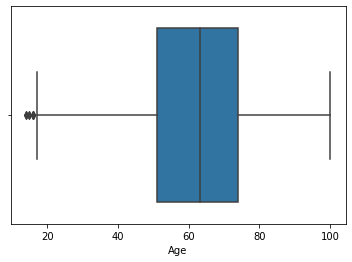

In [ ]:
sns.boxplot(Sepsisdata.Age)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


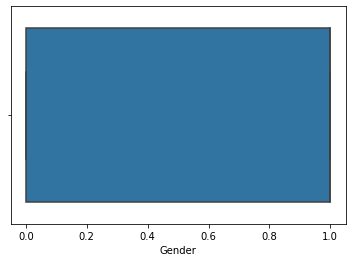

In [ ]:
sns.boxplot(Sepsisdata.Gender)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


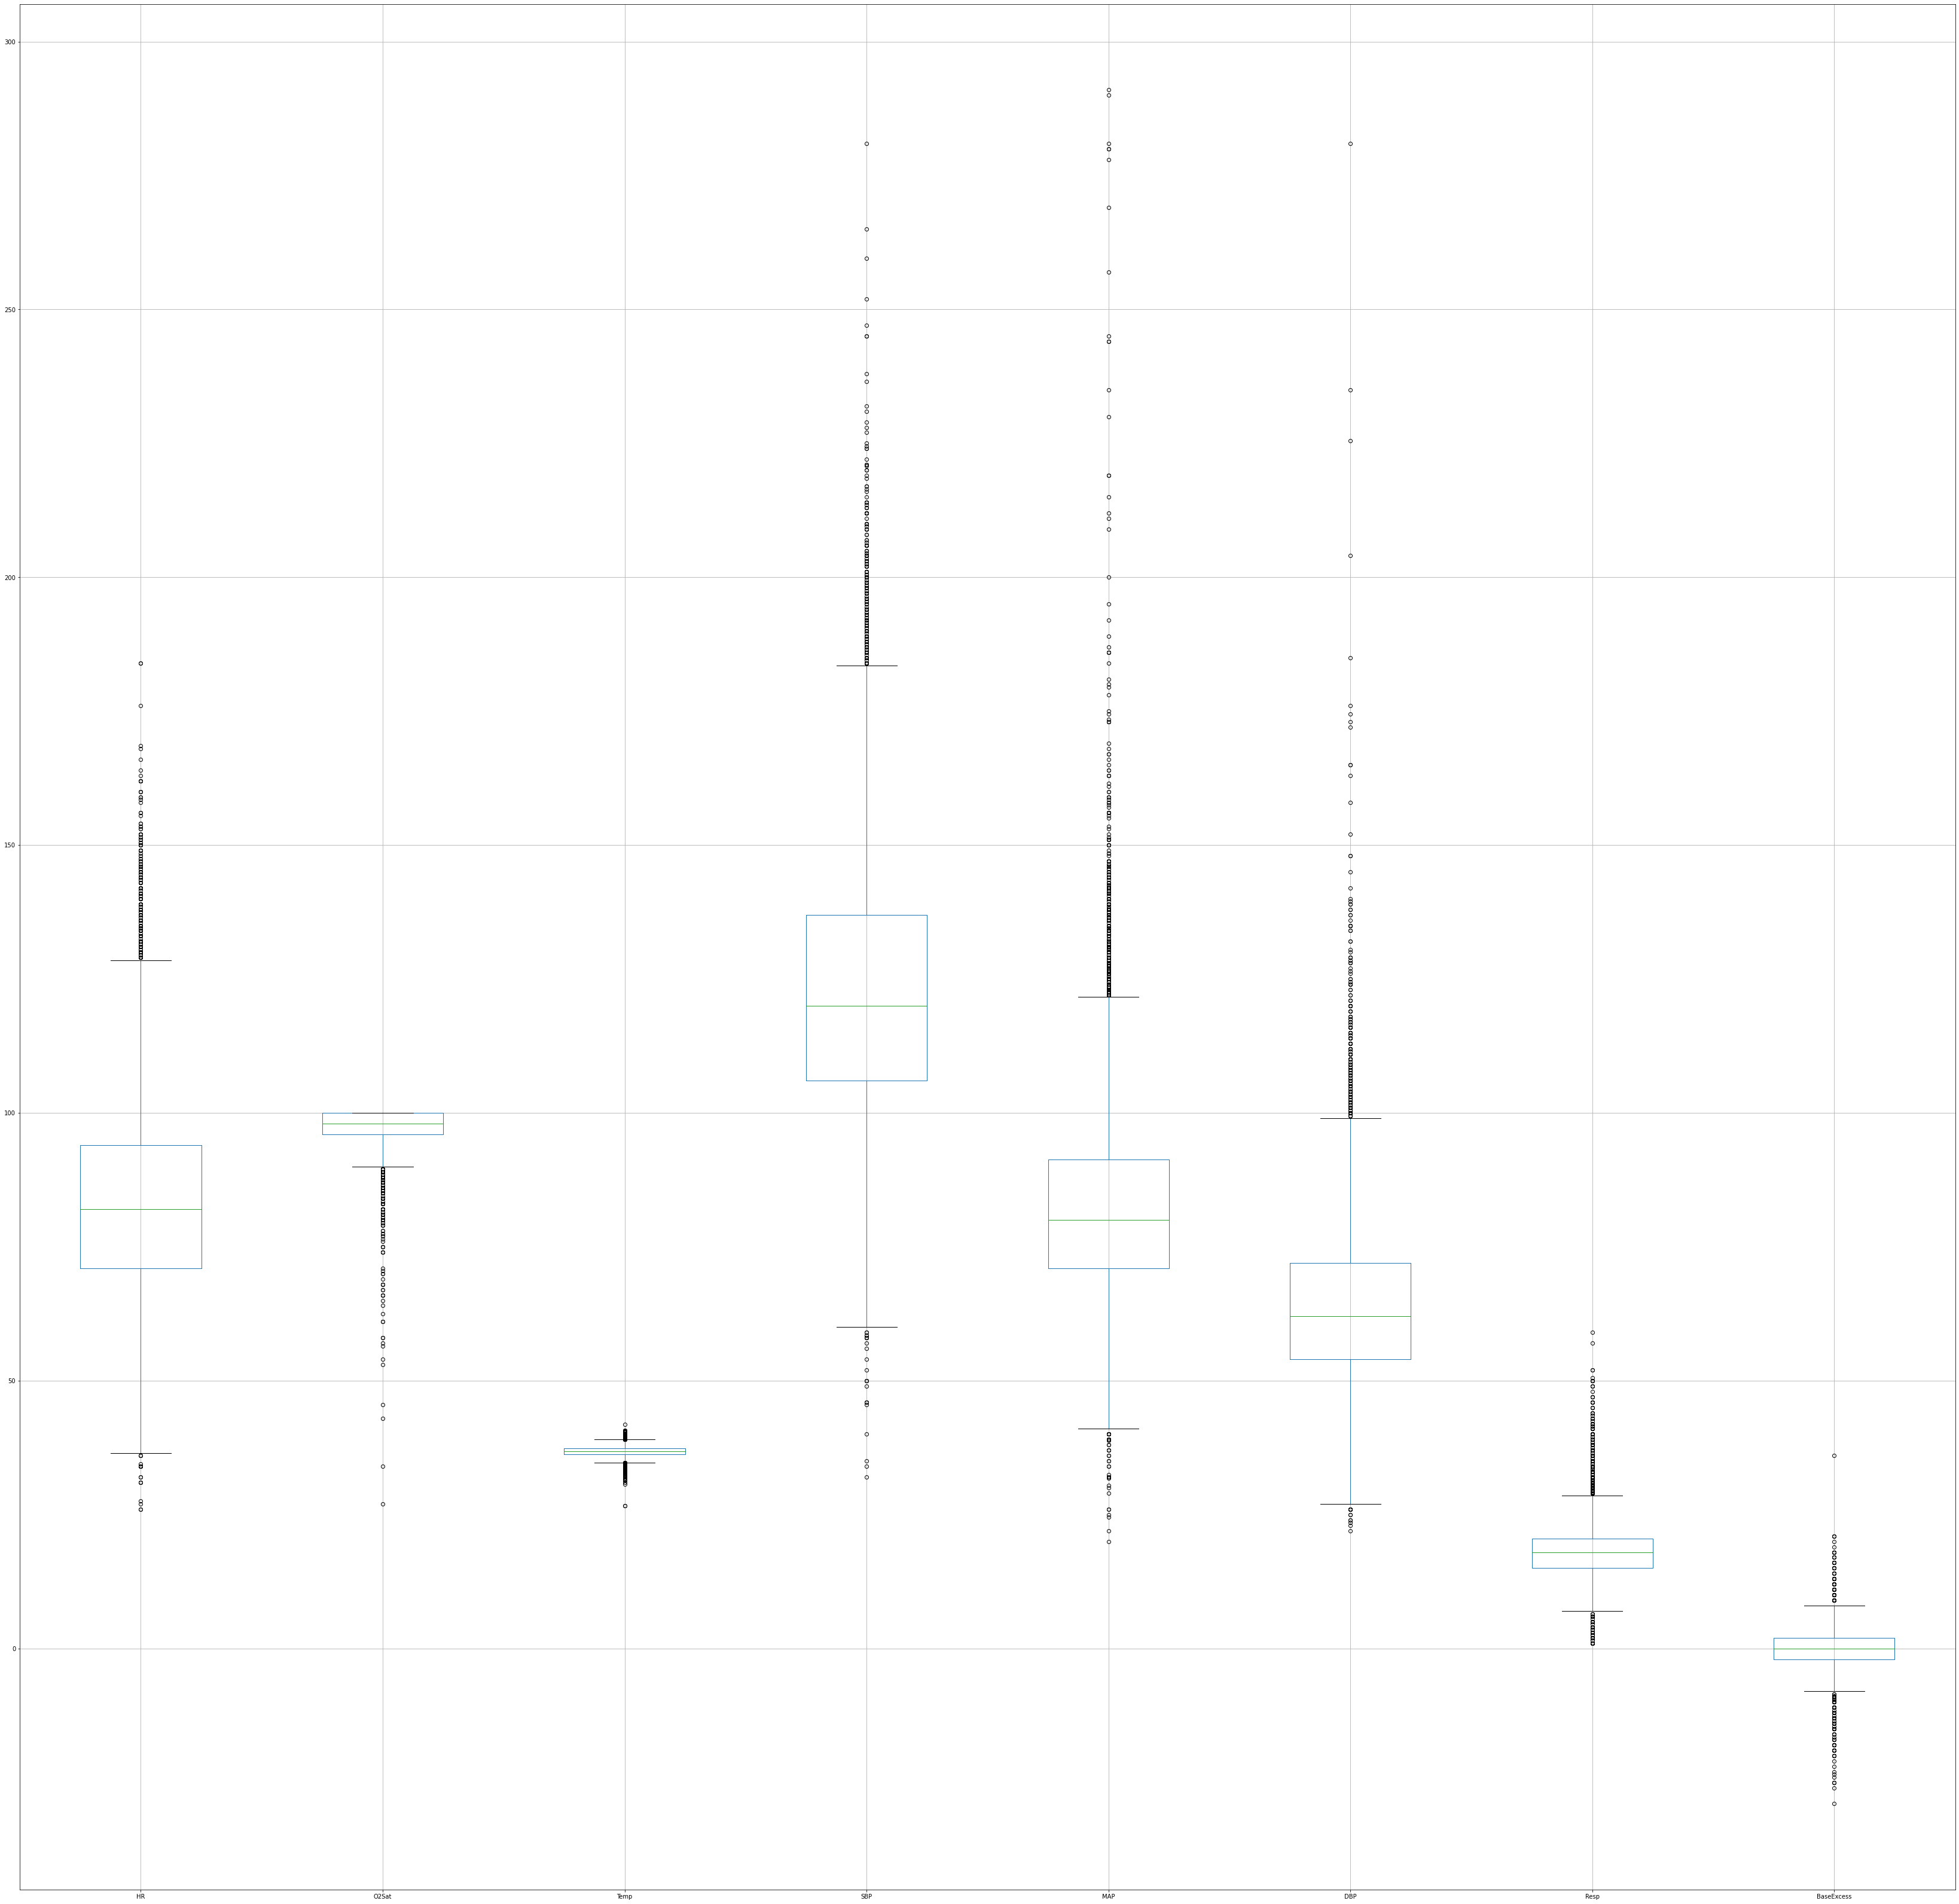

In [ ]:
df = pd.DataFrame(data =Sepsisdata, columns =['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',])
plt.figure(figsize=(58, 58))
df.boxplot()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


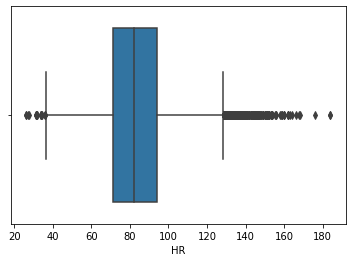

In [ ]:
sns.boxplot(Sepsisdata.HR)
plt.show()

In [ ]:
Sepsisdata.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
print(Sepsisdata.where(Sepsisdata<0).count())

HR                     0
O2Sat                  0
Temp                   0
SBP                    0
MAP                    0
DBP                    0
Resp                   0
BaseExcess          2855
HCO3                   0
FiO2                   0
pH                     0
PaCO2                  0
SaO2                   0
AST                    0
BUN                    0
Alkalinephos           0
Calcium                0
Chloride               0
Creatinine             0
Glucose                0
Lactate                0
Magnesium              0
Phosphate              0
Potassium              0
Bilirubin_total        0
TroponinI              0
Hct                    0
Hgb                    0
PTT                    0
WBC                    0
Platelets              0
Age                    0
Gender                 0
Unit1                  0
Unit2                  0
HospAdmTime        34877
ICULOS                 0
isSepsis               0
dtype: int64


In [ ]:
Sepsisdata.shape

(36302, 38)

In [ ]:
Sepsisdata.columns


Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [ ]:

ix=[i for i in range(Sepsisdata.shape[1]) if i!=37]
ix

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

In [ ]:
Sepsisdata.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,NaN,NaN,NaN,NaN,30.0,21.0,45.0,NaN,7.37,90.0,91.0,16.0,14.0,98.0,9.3,85.0,0.7,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,317.0,83.14,0,NaN,NaN,-0.03,17,0
1,58.0,95.0,36.11,143.0,77.0,47.0,11.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,7.9,113.0,2.5,78.0,NaN,2.5,4.4,5.1,NaN,NaN,27.8,9.7,NaN,11.0,158.0,75.91,0,0.0,1.0,-98.60,10,0
2,91.0,94.0,38.50,133.0,74.0,48.0,34.0,NaN,31.0,0.8,NaN,NaN,NaN,NaN,30.0,NaN,10.9,98.0,0.9,113.0,NaN,2.4,2.3,3.8,NaN,NaN,26.2,8.8,30.5,8.3,465.0,45.82,0,1.0,0.0,-1195.71,11,0
3,92.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,111.0,0.7,73.0,NaN,NaN,NaN,3.8,NaN,NaN,36.9,12.2,NaN,12.0,298.0,52.01,1,1.0,0.0,-0.03,13,0
4,155.5,94.5,NaN,147.5,102.0,NaN,33.0,-12.0,13.0,1.0,7.22,36.0,NaN,452.0,68.0,88.0,5.9,113.0,3.8,263.0,2.2,1.9,3.8,4.6,1.4,NaN,45.0,15.8,26.6,9.3,26.0,64.24,1,1.0,0.0,-0.05,2,0


In [ ]:
from sklearn.impute import KNNImputer
from numpy import isnan
data=Sepsisdata.values
ix=[i for i in range(data.shape[1]) if i!=37]
x,y=data[:,ix],data[:,37]
print('MISSING %d' % sum(isnan(x).flatten()))
imputer=KNNImputer()
imputer.fit(x)
xtrans=imputer.transform(x)
print('MISSING %d' % sum(isnan(xtrans).flatten()))

MISSING 476498
MISSING 0


In [ ]:
final=pd.DataFrame(data=xtrans,columns=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS'])
final['isSepsis']=Sepsisdata['isSepsis']
final.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,37.328,135.6,94.534,76.6,30.0,21.00,45.0,0.52,7.370,90.00,91.00,16.0,14.0,98.0,9.300,85.0,0.7,193.0,2.360,2.00,3.30,3.8,0.30,0.062,37.2,12.5,29.08,5.7,317.0,83.14,0.0,0.8,0.2,-0.03,17.0,0
1,58.0,95.0,36.110,143.0,77.000,47.0,11.0,-1.56,22.0,0.58,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.5,78.0,1.084,2.50,4.40,5.1,0.92,0.634,27.8,9.7,30.48,11.0,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
2,91.0,94.0,38.500,133.0,74.000,48.0,34.0,0.60,31.0,0.80,7.376,42.60,98.20,30.4,30.0,181.8,10.900,98.0,0.9,113.0,2.600,2.40,2.30,3.8,2.04,4.914,26.2,8.8,30.50,8.3,465.0,45.82,0.0,1.0,0.0,-1195.71,11.0,0
3,92.0,100.0,36.420,115.2,80.200,69.7,16.6,-0.98,29.0,0.74,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.7,73.0,1.524,1.86,2.98,3.8,2.00,1.110,36.9,12.2,31.74,12.0,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
4,155.5,94.5,37.894,147.5,102.000,87.3,33.0,-12.00,13.0,1.00,7.220,36.00,98.20,452.0,68.0,88.0,5.900,113.0,3.8,263.0,2.200,1.90,3.80,4.6,1.40,3.590,45.0,15.8,26.60,9.3,26.0,64.24,1.0,1.0,0.0,-0.05,2.0,0


In [ ]:
final.columns


Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [ ]:
final.isnull().sum()

HR                 0
O2Sat              0
Temp               0
SBP                0
MAP                0
DBP                0
Resp               0
BaseExcess         0
HCO3               0
FiO2               0
pH                 0
PaCO2              0
SaO2               0
AST                0
BUN                0
Alkalinephos       0
Calcium            0
Chloride           0
Creatinine         0
Glucose            0
Lactate            0
Magnesium          0
Phosphate          0
Potassium          0
Bilirubin_total    0
TroponinI          0
Hct                0
Hgb                0
PTT                0
WBC                0
Platelets          0
Age                0
Gender             0
Unit1              0
Unit2              0
HospAdmTime        0
ICULOS             0
isSepsis           0
dtype: int64

In [ ]:
Q1 = final["HR"].quantile(0.25)
Q3 = final['HR'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23.0


In [ ]:
final.describe

<bound method NDFrame.describe of           HR  O2Sat    Temp    SBP  ...  Unit2  HospAdmTime  ICULOS  isSepsis
0      103.0   90.0  37.328  135.6  ...    0.2        -0.03    17.0         0
1       58.0   95.0  36.110  143.0  ...    1.0       -98.60    10.0         0
2       91.0   94.0  38.500  133.0  ...    0.0     -1195.71    11.0         0
3       92.0  100.0  36.420  115.2  ...    0.0        -0.03    13.0         0
4      155.5   94.5  37.894  147.5  ...    0.0        -0.05     2.0         0
...      ...    ...     ...    ...  ...    ...          ...     ...       ...
36297   59.0   95.0  36.858  154.0  ...    1.0       -14.90    19.0         0
36298   81.0   99.0  37.322  122.0  ...    0.4        -6.69    25.0         0
36299   76.0   96.0  36.300  118.0  ...    0.2        -0.02     2.0         0
36300   76.0   89.0  36.980  145.0  ...    0.0       -53.64    15.0         0
36301   98.0   99.0  36.440  152.0  ...    0.2         0.00     4.0         0

[36302 rows x 38 columns]>

In [ ]:
final.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
count,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000,36302.000000
mean,83.522528,97.435621,36.799331,122.546287,82.306800,63.539958,18.065969,0.016809,24.441681,0.572625,7.388922,40.653245,94.115177,113.215313,22.051369,91.535662,8.193210,105.818319,1.423757,132.220016,1.992317,2.001199,3.523085,4.093363,1.419952,4.702489,32.227060,10.795344,37.286968,11.019025,209.543287,61.676240,0.559363,0.523619,0.476381,-51.437230,16.982315,0.072916
std,17.356972,2.779672,0.672977,22.714239,16.647753,13.304475,4.901394,2.559164,3.138320,0.151521,0.048232,5.311037,5.381635,351.991611,17.671069,70.872050,1.269949,4.243789,1.731600,48.174930,1.118616,0.339832,1.071499,0.599596,2.082079,9.671863,5.532737,1.924648,15.764814,6.570989,96.531244,16.454453,0.496470,0.427401,0.427401,136.981879,22.731072,0.260002
min,26.000000,27.000000,26.670000,32.000000,20.000000,22.000000,1.000000,-29.000000,5.000000,0.020000,6.650000,12.000000,29.000000,3.000000,1.000000,11.000000,1.010000,38.000000,0.100000,17.000000,0.300000,0.500000,0.400000,1.450000,0.100000,0.010000,9.100000,2.600000,16.600000,0.100000,2.000000,14.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000
25%,71.000000,96.000000,36.410000,106.000000,71.000000,54.500000,15.000000,-1.060000,23.000000,0.470000,7.368000,37.720000,92.360000,28.200000,12.000000,62.000000,7.900000,103.800000,0.700000,103.000000,1.410000,1.800000,2.900000,3.700000,0.640000,0.134500,28.400000,9.500000,29.160000,7.500000,149.000000,51.000000,0.000000,0.000000,0.000000,-43.510000,6.000000,0.000000
50%,82.000000,98.000000,36.772000,120.000000,80.000000,62.000000,18.000000,0.000000,24.400000,0.544000,7.392000,40.200000,96.000000,46.000000,17.000000,76.000000,8.340000,106.000000,0.900000,123.000000,1.746000,2.000000,3.400000,4.000000,0.880000,1.218000,31.900000,10.700000,33.040000,10.100000,197.000000,63.150000,1.000000,0.600000,0.400000,-6.060000,11.000000,0.000000
75%,94.000000,100.000000,37.184000,136.000000,91.000000,71.000000,20.100000,1.300000,26.000000,0.650000,7.418000,43.000000,97.480000,89.800000,26.000000,99.400000,8.760000,108.000000,1.310000,147.500000,2.200000,2.180000,3.900000,4.400000,1.340000,5.748000,35.900000,12.000000,40.000000,13.140000,252.000000,74.000000,1.000000,1.000000,1.000000,-0.040000,20.000000,0.000000
max,184.000000,100.000000,41.800000,281.000000,291.000000,281.000000,59.000000,36.000000,55.000000,2.000000,7.670000,100.000000,100.000000,9961.000000,200.000000,3619.000000,27.000000,139.000000,29.860000,896.000000,27.000000,9.700000,15.600000,11.800000,46.600000,440.000000,71.700000,30.000000,250.000000,387.000000,2322.000000,100.000000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000


In [ ]:
final['HR'].median()

82.0

In [ ]:
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['HR']<lower) | (final['HR']>upper)]
result

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
4,155.5,94.5,37.894,147.5,102.00,87.3,33.0,-12.00,13.0,1.000,7.220,36.00,98.20,452.0,68.0,88.0,5.900,113.0,3.800,263.0,2.200,1.90,3.80,4.60,1.40,3.590,45.00,15.80,26.60,9.300,26.0,64.24,1.0,1.0,0.0,-0.05,2.0,0
67,135.0,96.2,37.884,98.5,53.33,66.0,14.0,3.00,25.0,1.000,7.450,39.00,91.78,121.4,19.0,78.4,7.500,120.0,0.700,346.0,1.666,2.20,3.40,3.70,0.88,1.780,26.90,8.80,23.40,23.300,246.0,56.97,1.0,1.0,0.0,-136.75,101.0,1
84,149.0,99.0,37.908,124.0,82.00,68.6,33.0,-2.04,24.0,0.640,7.432,38.40,97.28,13.0,7.0,49.0,7.500,108.0,0.800,107.0,2.094,1.70,2.20,3.90,0.60,2.014,34.30,11.90,24.00,12.800,263.0,29.68,1.0,1.0,0.0,-0.02,8.0,0
338,130.5,94.5,37.560,133.2,84.00,68.1,24.0,-5.20,21.6,0.520,7.346,37.40,88.01,40.6,26.6,95.2,7.106,109.8,1.256,174.4,3.484,2.18,2.68,4.19,1.56,28.616,35.96,11.92,29.60,11.918,216.4,69.15,0.0,0.8,0.2,-0.03,58.0,1
410,140.0,90.0,37.110,116.0,70.00,50.0,16.0,-15.00,15.0,1.000,7.070,50.00,98.00,34.0,44.0,59.0,10.200,102.0,3.800,123.0,9.300,2.30,9.10,5.20,1.90,2.908,31.10,10.10,47.50,15.900,102.0,74.19,1.0,0.0,1.0,-116.31,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35765,130.0,100.0,38.300,158.0,94.00,64.0,24.0,-0.40,24.0,0.580,7.410,36.00,96.92,233.2,40.0,61.6,8.180,111.2,1.496,150.0,2.402,2.10,3.46,3.90,1.54,0.050,26.70,8.72,33.22,9.200,200.8,63.00,1.0,0.0,1.0,-604.47,49.0,1
35955,133.0,100.0,37.206,141.0,91.00,66.0,16.0,-2.40,22.0,0.412,7.344,42.60,97.54,86.0,27.0,101.0,8.800,104.2,0.870,116.5,3.214,2.20,3.20,4.00,0.60,21.020,30.20,9.99,37.80,7.480,158.6,83.00,0.0,1.0,0.0,-28.44,8.0,0
35999,140.0,95.0,37.600,117.0,91.00,84.0,24.0,-3.20,21.6,0.630,7.390,36.48,87.38,51.4,24.4,115.8,8.280,108.4,1.122,144.6,1.358,2.12,3.18,3.94,0.84,1.040,34.12,11.24,35.66,9.500,237.8,64.00,0.0,1.0,0.0,-140.09,23.0,0
36174,136.0,94.5,37.000,120.5,94.50,77.5,22.0,2.60,26.8,0.710,7.390,47.30,95.40,56.2,19.0,48.4,7.800,105.2,0.940,118.0,3.484,1.90,3.80,3.60,1.74,0.570,29.00,9.60,65.52,1.100,15.0,71.00,1.0,1.0,0.0,-392.24,10.0,0


In [ ]:
result.index

Int64Index([    4,    67,    84,   338,   410,   529,   673,   947,  1112,
             1117,
            ...
            35396, 35521, 35531, 35639, 35720, 35765, 35955, 35999, 36174,
            36277],
           dtype='int64', length=468)

In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,37.328,135.6,94.534,76.6,30.0,21.00,45.0,0.520,7.370,90.00,91.00,16.0,14.0,98.0,9.300,85.0,0.70,193.0,2.360,2.00,3.30,3.8,0.30,0.062,37.2,12.5,29.08,5.7,317.0,83.14,0.0,0.8,0.2,-0.03,17.0,0
1,58.0,95.0,36.110,143.0,77.000,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.50,78.0,1.084,2.50,4.40,5.1,0.92,0.634,27.8,9.7,30.48,11.0,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
2,91.0,94.0,38.500,133.0,74.000,48.0,34.0,0.60,31.0,0.800,7.376,42.60,98.20,30.4,30.0,181.8,10.900,98.0,0.90,113.0,2.600,2.40,2.30,3.8,2.04,4.914,26.2,8.8,30.50,8.3,465.0,45.82,0.0,1.0,0.0,-1195.71,11.0,0
3,92.0,100.0,36.420,115.2,80.200,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.70,73.0,1.524,1.86,2.98,3.8,2.00,1.110,36.9,12.2,31.74,12.0,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
5,73.0,99.0,36.060,100.0,67.000,49.5,16.5,-8.00,16.0,0.582,7.270,37.00,91.78,28.2,28.0,75.4,7.400,105.0,1.20,129.0,1.800,1.80,3.50,4.5,0.74,2.312,32.9,11.4,33.62,11.4,357.0,87.08,1.0,0.8,0.2,-2.23,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36297,59.0,95.0,36.858,154.0,110.000,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.000,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.58,135.0,1.660,2.30,3.06,4.0,3.30,15.398,42.7,13.8,40.24,12.6,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.000,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.85,101.5,1.594,1.98,2.86,3.1,0.70,1.090,49.4,16.1,38.20,10.8,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0
36300,76.0,89.0,36.980,145.0,102.000,74.0,22.8,0.14,19.0,0.442,7.412,39.14,96.10,9.0,49.0,68.0,7.800,105.2,6.60,91.0,1.634,1.90,4.10,4.2,0.20,2.058,27.6,8.9,32.94,12.5,188.0,60.00,0.0,1.0,0.0,-53.64,15.0,0


In [ ]:
final.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [ ]:
Q1 = final["O2Sat"].quantile(0.25)
Q3 = final['O2Sat'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

4.0


In [ ]:
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['O2Sat']<lower) | (final['O2Sat']>upper)]
result

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
119,121.0,85.5,37.358,160.0,96.0,70.0,27.0,-3.50,21.0,0.400,7.370,40.00,93.14,128.2,24.0,62.8,7.800,110.0,1.300,140.00,1.350,2.70,3.10,4.10,3.66,0.850,33.20,11.30,33.20,13.70,116.0,62.96,1.0,0.4,0.6,-0.04,29.0,0
174,70.0,87.0,36.794,145.0,95.0,77.6,22.0,0.72,26.0,0.534,7.394,40.40,91.82,61.2,28.0,82.0,8.500,108.0,1.700,115.00,1.246,2.30,4.50,4.30,1.16,21.498,56.40,16.50,29.70,6.40,169.0,51.67,1.0,1.0,0.0,-0.02,33.0,0
206,68.0,88.0,36.588,102.0,63.0,49.6,16.0,2.38,27.0,0.600,7.420,43.20,97.04,29.6,18.0,59.2,8.500,96.0,1.200,242.00,1.786,1.90,4.40,4.10,0.60,0.018,33.20,11.10,28.00,8.20,216.0,69.03,0.0,0.0,1.0,-0.01,17.0,0
267,105.5,88.5,37.418,130.5,81.5,59.0,32.0,0.00,24.0,0.480,7.390,43.00,97.12,181.6,50.0,76.2,7.800,96.0,2.600,163.00,1.646,2.20,6.00,5.10,0.40,0.500,29.90,9.70,26.46,12.70,323.0,77.38,1.0,1.0,0.0,-0.02,9.0,0
284,65.5,56.5,37.050,110.0,70.0,50.5,10.0,0.00,24.0,0.500,7.380,43.00,88.78,27.0,13.0,32.0,7.300,107.0,0.500,116.00,2.300,1.70,3.70,4.10,0.60,9.266,33.70,11.60,41.70,7.80,139.0,82.07,0.0,0.2,0.8,-34.96,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35909,85.0,89.0,36.700,102.0,71.0,61.0,19.4,0.40,25.8,0.700,7.336,49.60,84.72,269.6,28.0,83.4,8.700,107.0,1.200,210.00,1.772,2.30,3.02,4.50,1.38,7.748,33.40,11.30,32.34,12.00,249.0,77.00,1.0,0.4,0.6,-45.93,11.0,0
36053,88.0,89.0,35.600,103.0,75.5,60.5,20.0,1.00,23.4,0.662,7.402,38.20,93.38,38.6,13.0,104.0,7.518,108.8,0.812,128.65,2.930,1.94,3.28,4.36,2.28,0.928,29.34,10.02,34.76,9.28,138.4,48.00,0.0,1.0,0.0,-73.27,8.0,1
36057,86.0,89.0,36.640,144.0,98.0,83.0,15.0,0.40,23.4,0.350,7.140,67.40,92.90,12.0,24.0,72.0,5.600,104.2,1.010,127.00,0.710,2.30,4.00,4.18,0.20,0.010,41.60,12.60,43.52,9.50,217.0,55.00,0.0,1.0,0.0,-8.67,2.0,0
36089,69.0,87.0,36.200,124.0,91.0,67.0,22.0,2.70,23.0,0.682,7.412,39.40,97.48,19.0,20.0,92.0,9.700,105.2,0.910,85.00,2.108,1.84,4.00,4.20,0.60,4.522,46.60,15.60,29.88,9.90,207.0,21.00,0.0,1.0,0.0,-97.82,2.0,0


In [ ]:
result.index

Int64Index([  119,   174,   206,   267,   284,   316,   358,   551,   592,
              870,
            ...
            34736, 35000, 35019, 35298, 35817, 35909, 36053, 36057, 36089,
            36300],
           dtype='int64', length=353)

In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,37.328,135.6,94.534,76.6,30.0,21.00,45.0,0.520,7.370,90.00,91.00,16.0,14.0,98.0,9.300,85.0,0.70,193.0,2.360,2.00,3.30,3.80,0.30,0.062,37.2,12.5,29.08,5.7,317.0,83.14,0.0,0.8,0.2,-0.03,17.0,0
1,58.0,95.0,36.110,143.0,77.000,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.50,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.0,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
2,91.0,94.0,38.500,133.0,74.000,48.0,34.0,0.60,31.0,0.800,7.376,42.60,98.20,30.4,30.0,181.8,10.900,98.0,0.90,113.0,2.600,2.40,2.30,3.80,2.04,4.914,26.2,8.8,30.50,8.3,465.0,45.82,0.0,1.0,0.0,-1195.71,11.0,0
3,92.0,100.0,36.420,115.2,80.200,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.70,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.0,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
5,73.0,99.0,36.060,100.0,67.000,49.5,16.5,-8.00,16.0,0.582,7.270,37.00,91.78,28.2,28.0,75.4,7.400,105.0,1.20,129.0,1.800,1.80,3.50,4.50,0.74,2.312,32.9,11.4,33.62,11.4,357.0,87.08,1.0,0.8,0.2,-2.23,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.000,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.13,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.2,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.000,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.81,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.000,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.58,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.6,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.000,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.85,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.8,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Temp"].quantile(0.25)
Q3 = final['Temp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Temp']<lower) | (final['Temp']>upper)]
result


0.7680000000000007


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
2,91.0,94.0,38.50,133.00,74.00,48.0,34.0,0.60,31.00,0.800,7.376,42.6,98.20,30.4,30.0,181.8,10.900,98.0,0.900,113.0,2.600,2.40,2.30,3.80,2.04,4.914,26.20,8.80,30.50,8.30,465.0,45.82,0.0,1.0,0.0,-1195.71,11.0,0
26,96.5,93.0,35.00,83.00,55.67,48.2,18.5,-2.08,21.00,0.480,7.438,35.4,96.46,1006.4,64.0,205.4,8.700,99.0,8.600,224.0,1.318,2.20,6.20,4.90,1.76,3.198,35.30,10.90,47.20,8.60,278.0,59.24,1.0,1.0,0.0,-0.04,20.0,0
42,66.0,100.0,33.94,148.00,88.67,70.3,15.0,0.60,24.00,0.570,7.406,43.2,97.04,23.6,37.0,78.8,7.800,109.0,0.900,162.0,2.344,2.40,3.40,5.20,0.76,0.038,30.50,9.90,26.20,13.80,135.0,82.46,0.0,1.0,0.0,-0.04,12.0,0
49,84.0,99.0,35.00,105.00,70.33,55.5,12.0,-1.00,24.60,0.580,7.340,39.0,93.18,24.2,11.8,56.0,6.658,106.2,0.878,131.8,3.606,2.30,3.80,4.08,1.20,0.196,29.06,9.56,32.80,17.56,200.0,46.02,1.0,1.0,0.0,-244.37,6.0,1
62,127.0,93.0,40.50,111.75,67.50,52.5,23.5,0.00,22.00,0.030,7.410,37.0,97.04,89.0,15.0,76.0,9.000,105.0,1.200,106.0,2.000,2.10,2.90,4.10,3.60,0.094,38.10,13.40,44.26,5.60,62.0,70.49,1.0,0.6,0.4,-2.49,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36102,80.0,97.0,38.90,126.00,88.00,64.0,29.0,-0.60,22.56,0.580,7.402,38.4,89.68,51.6,16.0,37.8,7.900,109.2,1.200,148.5,1.418,2.00,1.90,5.10,1.62,3.434,35.20,11.80,33.86,11.60,97.0,68.00,1.0,0.0,1.0,-33.34,7.0,0
36125,104.0,96.5,39.70,140.00,100.00,76.0,32.5,-2.26,23.80,0.280,7.480,34.0,96.10,54.2,32.0,75.2,1.550,115.0,1.442,151.5,2.720,2.20,4.08,3.90,0.78,0.572,34.44,10.88,32.90,13.06,222.4,76.00,0.0,1.0,0.0,-9.46,49.0,1
36157,81.0,99.0,34.40,103.00,75.00,54.0,3.0,0.30,23.60,1.000,7.330,44.0,88.82,65.8,31.4,80.4,1.280,111.0,1.438,120.0,4.530,1.30,3.60,4.10,1.94,5.420,22.70,7.70,33.90,6.30,114.0,79.00,0.0,0.0,1.0,-97.62,49.0,0
36213,64.0,100.0,35.10,144.00,86.00,56.0,15.0,0.00,25.60,1.000,7.400,36.0,84.40,28.0,8.0,41.0,4.900,106.0,0.530,81.0,1.260,1.90,3.10,4.25,0.90,5.266,32.30,11.20,39.70,11.70,190.0,73.00,1.0,0.6,0.4,-296.16,6.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,37.328,135.6,94.534,76.6,30.0,21.00,45.0,0.520,7.370,90.00,91.00,16.0,14.0,98.0,9.300,85.0,0.700,193.0,2.360,2.00,3.30,3.80,0.30,0.062,37.2,12.5,29.08,5.70,317.0,83.14,0.0,0.8,0.2,-0.03,17.0,0
1,58.0,95.0,36.110,143.0,77.000,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.200,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
5,73.0,99.0,36.060,100.0,67.000,49.5,16.5,-8.00,16.0,0.582,7.270,37.00,91.78,28.2,28.0,75.4,7.400,105.0,1.200,129.0,1.800,1.80,3.50,4.50,0.74,2.312,32.9,11.4,33.62,11.40,357.0,87.08,1.0,0.8,0.2,-2.23,2.0,0
6,103.7,98.2,37.808,137.8,97.200,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.000,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.130,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.20,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.000,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.000,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.000,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["SBP"].quantile(0.25)
Q3 = final['SBP'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['SBP']<lower) | (final['SBP']>upper)]
result


29.400000000000006


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
13,116.0,97.0,38.280,200.0,108.0,90.0,24.0,6.00,24.20,0.700,7.510,39.00,94.00,274.2,22.6,88.8,7.086,104.2,1.174,140.4,1.362,2.18,3.52,3.66,2.18,0.486,27.86,9.52,39.50,18.16,277.8,39.28,1.0,1.0,0.0,-0.02,134.0,1
100,125.0,94.9,37.518,60.0,56.0,54.0,28.0,-22.00,8.00,1.000,7.070,22.00,95.86,400.0,24.0,261.0,6.900,113.0,1.000,199.0,8.200,2.00,5.60,5.30,0.20,11.512,50.00,16.20,86.40,81.30,66.0,82.17,1.0,1.0,0.0,-0.02,22.0,0
189,81.0,100.0,36.250,188.0,115.0,68.0,15.0,0.10,25.00,0.400,7.428,37.20,98.02,92.8,27.0,95.2,8.700,105.0,1.300,206.0,1.886,2.10,4.00,3.90,0.88,19.958,31.70,10.10,33.20,8.60,152.0,86.43,0.0,0.6,0.4,-0.02,25.0,0
198,118.5,98.0,36.330,200.0,128.5,80.6,31.0,0.00,22.00,1.000,7.380,41.00,88.00,44.0,67.0,180.0,8.700,101.0,4.600,233.0,1.700,1.80,4.30,4.90,0.40,0.310,44.50,13.90,23.90,13.20,247.0,60.80,0.0,1.0,0.0,-101.74,26.0,0
229,65.0,100.0,36.570,198.0,90.0,80.0,14.0,0.04,22.00,0.430,7.424,38.20,96.86,23.2,19.0,145.0,8.800,111.0,0.800,89.0,1.728,2.06,2.60,3.70,0.64,0.018,25.30,8.00,53.38,4.30,254.0,85.75,0.0,0.4,0.6,-0.02,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36161,66.0,97.0,36.614,220.0,122.0,68.0,16.0,1.20,24.80,0.570,7.430,39.60,97.94,131.0,9.0,54.8,9.300,104.4,1.040,128.0,1.378,2.00,2.90,4.20,0.46,11.812,43.70,14.40,41.52,13.30,244.0,61.00,1.0,0.6,0.4,-0.99,15.0,0
36185,76.0,100.0,36.900,186.0,116.0,88.0,15.0,-0.44,23.40,1.000,7.382,41.00,97.64,34.2,13.2,85.0,8.720,102.8,0.874,103.8,1.736,1.82,3.08,3.86,0.66,0.406,41.26,14.30,31.10,9.60,274.2,34.00,1.0,0.6,0.4,-0.07,7.0,1
36243,97.0,97.0,36.866,181.0,131.0,101.0,15.0,1.60,24.60,0.440,7.414,34.60,93.28,42.8,6.0,94.8,6.400,105.2,0.600,177.0,1.494,1.50,1.70,3.60,0.88,10.054,34.20,11.40,27.86,12.20,241.0,51.00,0.0,0.4,0.6,0.00,18.0,0
36253,93.0,97.0,36.000,185.0,124.0,86.0,26.0,-1.72,24.80,0.412,7.392,39.20,98.32,28.6,19.4,67.6,8.740,104.2,1.108,117.0,1.288,2.08,3.70,3.86,2.20,0.464,36.14,12.08,41.68,7.72,173.6,60.00,1.0,1.0,0.0,-4.14,6.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,37.328,135.6,94.534,76.6,30.0,21.00,45.0,0.520,7.370,90.00,91.00,16.0,14.0,98.0,9.300,85.0,0.700,193.0,2.360,2.00,3.30,3.80,0.30,0.062,37.2,12.5,29.08,5.70,317.0,83.14,0.0,0.8,0.2,-0.03,17.0,0
1,58.0,95.0,36.110,143.0,77.000,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.200,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
5,73.0,99.0,36.060,100.0,67.000,49.5,16.5,-8.00,16.0,0.582,7.270,37.00,91.78,28.2,28.0,75.4,7.400,105.0,1.200,129.0,1.800,1.80,3.50,4.50,0.74,2.312,32.9,11.4,33.62,11.40,357.0,87.08,1.0,0.8,0.2,-2.23,2.0,0
6,103.7,98.2,37.808,137.8,97.200,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.000,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.130,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.20,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.000,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.000,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.000,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["MAP"].quantile(0.25)
Q3 = final['MAP'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['MAP']<lower) | (final['MAP']>upper)]
result

20.0


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
9,100.0,95.0,37.280,121.0,20.00,53.8,20.4,0.28,22.00,0.422,7.396,37.80,96.06,95.6,32.0,116.6,7.800,115.0,0.900,88.0,1.806,1.90,2.90,3.90,1.42,0.290,26.50,9.00,25.80,7.30,127.0,81.64,1.0,1.0,0.0,-0.03,16.0,0
14,110.0,99.0,36.400,116.0,219.00,66.0,19.0,-8.00,19.00,0.428,7.220,46.00,96.00,102.2,85.0,98.4,6.878,96.0,8.700,74.0,1.000,1.90,4.96,4.90,1.86,0.300,30.00,10.10,34.90,14.08,167.2,46.42,1.0,0.8,0.2,-15.87,36.0,0
126,76.0,99.0,36.440,173.5,126.00,89.5,15.5,-0.10,22.00,0.460,7.378,38.00,97.76,33.4,6.0,77.6,7.800,104.0,0.500,217.0,1.118,1.80,2.80,3.80,0.52,3.952,35.60,12.20,27.00,7.40,288.0,58.88,0.0,0.2,0.8,-1.86,4.0,0
388,77.0,97.0,35.780,180.0,123.00,84.0,18.0,3.00,22.00,0.502,7.392,37.20,97.98,65.6,21.0,64.0,7.700,109.0,1.000,120.0,2.236,1.60,2.60,3.70,4.26,4.536,33.70,11.40,27.00,7.10,97.0,76.69,1.0,1.0,0.0,-25.28,13.0,0
552,70.0,99.0,35.990,158.0,127.33,91.6,31.0,0.14,20.00,0.464,7.418,39.70,96.50,48.0,70.0,123.6,8.700,96.0,10.000,112.0,1.190,1.80,6.00,4.30,0.50,0.162,25.90,9.30,22.60,9.90,64.0,44.68,0.0,0.6,0.4,-1.17,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35887,111.0,95.0,37.200,179.5,136.00,106.0,20.0,0.90,26.80,0.480,7.418,39.20,97.76,17.0,9.0,202.0,8.800,103.2,0.930,154.0,2.048,1.60,2.30,2.90,0.60,0.050,38.30,11.70,41.20,18.80,194.0,50.00,0.0,0.8,0.2,-11.16,2.0,0
36061,76.5,95.0,36.454,125.5,40.00,87.5,21.5,1.02,26.08,0.530,7.438,38.20,98.20,424.0,23.0,106.0,7.800,105.6,1.710,229.0,1.498,2.02,3.26,4.20,0.50,0.020,33.80,11.00,63.86,7.00,180.0,68.00,0.0,1.0,0.0,-3.91,3.0,0
36116,78.0,98.0,36.940,160.0,125.00,98.0,18.0,0.42,25.60,0.520,7.414,36.62,98.14,101.0,15.0,118.0,8.300,102.2,1.220,85.0,1.790,1.90,4.30,4.20,1.40,4.770,30.40,10.50,36.16,8.30,78.0,64.00,1.0,0.0,1.0,-65.34,23.0,0
36132,84.0,99.0,36.690,165.0,124.00,96.0,20.0,1.40,23.20,0.580,7.420,38.20,98.44,69.6,11.0,127.0,8.300,106.6,1.030,208.0,1.118,1.60,3.50,3.80,1.04,0.190,43.70,14.00,66.22,10.90,245.0,60.00,0.0,1.0,0.0,-4.79,16.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,37.328,135.6,94.534,76.6,30.0,21.00,45.0,0.520,7.370,90.00,91.00,16.0,14.0,98.0,9.300,85.0,0.700,193.0,2.360,2.00,3.30,3.80,0.30,0.062,37.2,12.5,29.08,5.70,317.0,83.14,0.0,0.8,0.2,-0.03,17.0,0
1,58.0,95.0,36.110,143.0,77.000,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.200,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
5,73.0,99.0,36.060,100.0,67.000,49.5,16.5,-8.00,16.0,0.582,7.270,37.00,91.78,28.2,28.0,75.4,7.400,105.0,1.200,129.0,1.800,1.80,3.50,4.50,0.74,2.312,32.9,11.4,33.62,11.40,357.0,87.08,1.0,0.8,0.2,-2.23,2.0,0
6,103.7,98.2,37.808,137.8,97.200,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.000,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.130,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.20,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.000,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.000,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.000,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["DBP"].quantile(0.25)
Q3 = final['DBP'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['DBP']<lower) | (final['DBP']>upper)]
result

15.899999999999999


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
115,80.0,91.0,36.600,118.75,90.0,96.5,26.0,-9.00,17.0,0.420,7.240,42.50,80.00,93.6,9.0,84.8,7.780,113.0,0.500,139.0,2.800,1.20,4.40,4.50,0.86,6.772,39.40,13.50,45.40,15.900,114.0,21.89,0.0,0.0,1.0,0.00,17.0,0
162,84.0,94.0,37.056,175.50,107.0,101.0,20.0,0.00,23.8,0.604,7.270,62.00,92.00,116.2,29.2,113.8,7.980,105.8,2.128,152.0,1.384,1.84,3.90,5.00,4.28,0.738,33.12,11.04,28.78,9.380,195.0,58.31,1.0,0.8,0.2,-0.01,62.0,1
306,82.0,100.0,36.788,159.00,112.5,98.0,17.0,-2.94,16.0,0.640,7.426,36.50,97.08,1020.2,52.0,116.8,6.600,107.0,8.500,99.0,1.256,1.60,5.60,5.40,1.28,0.116,24.70,8.30,39.20,3.900,93.0,24.10,0.0,1.0,0.0,-0.02,19.0,0
461,99.0,95.5,36.740,157.00,119.0,100.5,21.5,0.58,25.0,0.820,7.400,38.40,97.50,31.0,21.0,87.0,9.100,100.0,1.400,100.0,0.934,2.30,3.40,3.50,1.10,2.028,36.30,13.40,30.52,14.600,288.0,40.39,1.0,0.4,0.6,-2.37,11.0,0
532,92.0,92.0,37.280,118.00,99.5,99.0,24.0,-1.26,23.0,0.712,7.400,35.00,87.96,30.2,17.0,119.6,9.700,101.0,1.400,228.0,2.740,2.30,4.60,4.50,0.88,0.038,42.60,15.00,20.70,14.600,302.0,44.68,1.0,0.4,0.6,-70.46,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36011,93.0,100.0,36.800,135.00,111.0,95.0,28.0,-0.58,28.0,0.460,7.400,38.60,97.40,30.4,17.8,95.4,8.200,101.6,0.966,130.0,1.852,2.04,4.30,3.86,0.82,0.508,35.78,12.24,31.72,6.988,231.8,53.00,1.0,1.0,0.0,-9.03,8.0,0
36191,92.0,100.0,36.500,142.00,114.0,105.0,19.0,-2.60,23.0,0.590,7.326,46.40,85.08,21.8,22.2,66.6,8.200,107.4,0.816,129.6,1.532,2.14,3.10,4.16,0.64,7.760,33.32,11.30,30.30,7.680,277.0,56.00,1.0,0.0,1.0,0.00,6.0,0
36200,120.0,100.0,37.408,144.00,113.0,98.5,14.0,-2.80,22.0,0.780,7.322,40.18,96.42,61.2,27.6,95.4,8.220,107.2,1.054,136.6,6.116,1.90,3.16,3.90,4.92,0.040,31.00,10.60,38.86,9.280,174.4,69.00,1.0,1.0,0.0,-339.52,11.0,1
36218,100.0,97.0,36.782,164.00,121.0,97.0,10.0,0.30,31.4,0.462,7.442,35.20,98.46,28.0,18.0,54.0,8.700,101.8,0.680,127.0,1.510,2.20,3.32,4.00,1.10,0.040,40.30,13.50,24.90,18.700,269.0,55.00,1.0,0.8,0.2,0.00,3.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,37.328,135.6,94.534,76.6,30.0,21.00,45.0,0.520,7.370,90.00,91.00,16.0,14.0,98.0,9.300,85.0,0.700,193.0,2.360,2.00,3.30,3.80,0.30,0.062,37.2,12.5,29.08,5.70,317.0,83.14,0.0,0.8,0.2,-0.03,17.0,0
1,58.0,95.0,36.110,143.0,77.000,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.200,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
5,73.0,99.0,36.060,100.0,67.000,49.5,16.5,-8.00,16.0,0.582,7.270,37.00,91.78,28.2,28.0,75.4,7.400,105.0,1.200,129.0,1.800,1.80,3.50,4.50,0.74,2.312,32.9,11.4,33.62,11.40,357.0,87.08,1.0,0.8,0.2,-2.23,2.0,0
6,103.7,98.2,37.808,137.8,97.200,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.000,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.130,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.20,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.000,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.000,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.000,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Resp"].quantile(0.25)
Q3 = final['Resp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Resp']<lower) | (final['Resp']>upper)]
result

5.0


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,37.328,135.6,94.534,76.6,30.0,21.00,45.00,0.520,7.370,90.0,91.00,16.0,14.0,98.0,9.30,85.0,0.700,193.0,2.360,2.0,3.30,3.80,0.30,0.062,37.2,12.5,29.08,5.7,317.0,83.14,0.0,0.8,0.2,-0.03,17.0,0
19,84.0,98.0,37.072,106.0,67.330,48.0,29.0,2.40,20.00,0.830,7.426,42.2,92.82,27.2,37.0,94.2,6.60,110.0,1.500,75.0,1.296,1.7,3.90,3.90,0.84,2.108,25.0,8.7,83.90,10.9,160.0,70.81,0.0,0.6,0.4,-223.30,8.0,0
22,88.0,96.0,37.660,97.0,65.000,45.0,28.0,-3.00,25.20,0.710,7.360,37.0,92.66,52.0,21.4,188.4,8.08,103.2,1.026,165.9,1.200,2.0,3.74,4.58,2.34,4.320,25.7,8.5,31.36,6.4,202.8,56.46,0.0,1.0,0.0,-90.51,28.0,1
41,98.0,96.0,37.466,140.0,95.330,75.8,30.0,1.38,31.00,0.520,7.404,45.4,96.20,162.0,15.0,97.4,9.30,93.0,0.600,198.0,1.266,2.1,3.10,3.10,0.70,0.212,38.2,13.2,36.98,11.1,262.0,81.08,0.0,1.0,0.0,-0.03,8.0,0
46,109.0,98.0,37.330,109.0,68.330,59.6,33.0,-2.58,18.00,0.600,7.380,35.6,97.36,75.2,44.0,134.4,7.20,97.0,1.400,303.0,4.638,1.6,1.20,4.00,0.48,3.500,33.4,12.0,59.48,13.8,260.0,53.95,1.0,1.0,0.0,-0.02,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36167,103.0,93.0,37.400,148.0,87.000,76.0,30.0,3.60,25.00,0.450,7.486,36.4,92.38,83.0,29.0,75.0,8.30,107.2,0.530,115.0,1.240,2.4,3.30,3.00,0.70,0.262,35.5,11.6,31.50,14.2,239.0,57.00,1.0,0.4,0.6,-164.11,14.0,0
36186,82.0,94.0,36.894,142.0,106.000,88.0,29.0,1.38,25.68,0.364,7.400,36.6,98.06,26.0,39.0,61.6,8.60,105.6,1.370,131.0,1.868,1.9,4.90,4.10,1.14,13.426,39.4,13.4,27.88,11.0,213.0,78.00,0.0,0.0,1.0,-3.52,13.0,0
36201,50.0,96.0,37.600,170.0,106.000,74.0,28.0,-2.36,21.22,0.464,7.406,35.0,97.04,903.0,54.0,85.4,8.90,107.4,5.360,98.0,1.104,1.9,4.70,5.10,1.58,0.010,32.8,11.1,35.66,7.9,132.0,44.00,0.0,1.0,0.0,-8.20,3.0,0
36251,62.0,100.0,36.956,97.0,60.000,42.0,1.0,-1.18,21.20,0.520,7.398,38.2,84.38,33.0,14.0,32.0,7.60,103.0,0.850,122.0,1.596,1.3,3.16,3.20,1.70,1.148,26.8,8.7,32.08,11.3,186.0,66.00,1.0,0.0,1.0,-29.25,3.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
1,58.0,95.0,36.110,143.0,77.0,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.2,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
5,73.0,99.0,36.060,100.0,67.0,49.5,16.5,-8.00,16.0,0.582,7.270,37.00,91.78,28.2,28.0,75.4,7.400,105.0,1.200,129.0,1.800,1.80,3.50,4.50,0.74,2.312,32.9,11.4,33.62,11.40,357.0,87.08,1.0,0.8,0.2,-2.23,2.0,0
6,103.7,98.2,37.808,137.8,97.2,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
7,82.0,100.0,35.500,112.0,79.5,63.0,14.0,0.00,23.0,1.000,7.420,37.00,93.92,41.6,18.0,69.6,7.158,109.0,0.900,116.0,2.098,1.94,3.34,3.90,0.92,0.610,27.9,9.5,29.90,8.70,115.0,76.71,0.0,0.0,1.0,-2.36,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.0,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.130,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.20,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.0,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.0,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.0,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Resp"].quantile(0.25)
Q3 = final['Resp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Resp']<lower) | (final['Resp']>upper)]
result

5.0


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
1,58.0,95.0,36.110,143.0,77.0,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.2,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
5,73.0,99.0,36.060,100.0,67.0,49.5,16.5,-8.00,16.0,0.582,7.270,37.00,91.78,28.2,28.0,75.4,7.400,105.0,1.200,129.0,1.800,1.80,3.50,4.50,0.74,2.312,32.9,11.4,33.62,11.40,357.0,87.08,1.0,0.8,0.2,-2.23,2.0,0
6,103.7,98.2,37.808,137.8,97.2,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
7,82.0,100.0,35.500,112.0,79.5,63.0,14.0,0.00,23.0,1.000,7.420,37.00,93.92,41.6,18.0,69.6,7.158,109.0,0.900,116.0,2.098,1.94,3.34,3.90,0.92,0.610,27.9,9.5,29.90,8.70,115.0,76.71,0.0,0.0,1.0,-2.36,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.0,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.130,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.20,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.0,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.0,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.0,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["BaseExcess"].quantile(0.25)
Q3 = final['BaseExcess'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['BaseExcess']<lower) | (final['BaseExcess']>upper)]
result

2.3


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
5,73.0,99.0,36.060,100.0,67.0,49.5,16.5,-8.00,16.0,0.582,7.270,37.0,91.78,28.2,28.0,75.4,7.400,105.0,1.200,129.0,1.800,1.80,3.50,4.5,0.74,2.312,32.90,11.40,33.62,11.40,357.0,87.08,1.0,0.8,0.2,-2.23,2.0,0
28,70.0,100.0,36.398,104.0,67.0,50.0,10.0,6.00,33.0,0.500,7.330,66.0,97.80,34.0,25.0,46.6,5.638,100.0,0.700,171.0,2.096,2.00,4.20,4.2,0.76,0.720,29.60,9.80,27.62,10.40,449.0,65.04,1.0,0.4,0.6,-146.03,9.0,0
37,68.0,98.0,37.122,111.0,71.0,48.0,14.5,12.00,39.0,0.620,7.450,56.0,95.00,61.0,65.0,131.0,8.000,96.0,2.400,93.0,1.928,2.10,3.90,4.1,1.10,4.468,31.50,10.20,30.08,5.80,190.0,72.55,1.0,0.8,0.2,-97.71,33.0,0
44,92.0,96.0,37.100,102.4,71.0,57.2,14.0,6.50,24.2,0.750,7.450,46.5,86.80,153.2,35.2,181.0,9.000,104.4,1.278,127.7,3.638,1.86,3.08,4.1,2.20,18.674,31.50,10.54,28.88,10.52,208.2,68.59,0.0,1.0,0.0,-0.02,23.0,1
48,83.0,100.0,35.390,112.0,100.0,91.0,16.0,-11.50,17.0,0.500,7.220,37.0,99.00,755.0,22.0,130.0,6.900,114.0,0.600,164.0,4.750,1.30,8.00,5.5,0.90,14.326,36.40,12.70,50.80,9.40,144.0,51.59,0.0,0.4,0.6,-0.07,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36182,95.4,97.7,37.576,105.8,64.3,52.1,20.4,-6.00,24.2,0.450,7.348,35.0,90.84,299.0,39.0,70.2,8.900,108.0,4.720,150.0,2.192,1.90,4.30,3.4,0.92,1.370,25.30,7.80,39.60,9.60,314.0,83.00,0.0,1.0,0.0,-0.42,41.0,0
36196,107.1,95.6,37.332,136.0,88.4,69.9,23.1,-5.30,20.8,0.640,7.410,29.0,95.90,768.0,33.6,230.0,7.898,101.0,2.284,133.0,1.200,2.16,4.50,3.2,11.88,0.250,28.15,9.40,37.50,12.40,103.0,47.00,1.0,1.0,0.0,-0.08,236.0,1
36198,79.1,95.2,37.276,106.2,79.4,65.7,18.0,-5.30,20.8,0.574,7.310,45.4,95.38,83.4,10.0,184.8,8.100,109.0,0.680,207.0,1.322,1.98,3.32,3.8,1.48,1.476,37.70,13.10,27.36,8.00,225.0,52.00,1.0,1.0,0.0,-4.35,27.0,0
36202,97.0,100.0,37.000,128.0,88.0,76.0,18.0,-5.40,21.2,0.700,7.338,33.0,92.00,30.2,12.4,109.4,8.680,103.2,0.716,130.4,1.922,2.00,3.22,3.9,1.68,1.614,36.40,12.34,65.30,13.12,329.4,45.00,1.0,1.0,0.0,-4.84,4.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
1,58.0,95.0,36.110,143.0,77.0,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.2,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
6,103.7,98.2,37.808,137.8,97.2,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
7,82.0,100.0,35.500,112.0,79.5,63.0,14.0,0.00,23.0,1.000,7.420,37.00,93.92,41.6,18.0,69.6,7.158,109.0,0.900,116.0,2.098,1.94,3.34,3.90,0.92,0.610,27.9,9.5,29.90,8.70,115.0,76.71,0.0,0.0,1.0,-2.36,3.0,0
8,89.0,100.0,37.642,141.0,85.0,57.0,17.0,1.00,25.0,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.400,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.2,11.2,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.0,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.130,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.20,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.0,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.0,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.0,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["HCO3"].quantile(0.25)
Q3 = final['HCO3'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['HCO3']<lower) | (final['HCO3']>upper)]
result

3.0


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
34,106.0,97.0,36.170,82.0,72.00,61.5,20.0,-1.40,33.0,0.660,7.428,41.60,96.92,15.0,79.0,104.0,9.80,88.0,2.000,83.0,3.436,2.60,5.80,3.30,1.40,1.230,34.90,9.70,30.30,7.10,334.0,46.35,0.0,0.8,0.2,-22.54,13.0,0
55,86.0,100.0,37.208,116.0,74.00,52.0,21.0,2.00,14.0,0.680,7.408,42.90,95.56,42.0,27.0,76.0,7.70,113.0,1.100,181.0,2.310,2.50,3.90,4.60,0.30,6.126,26.00,8.60,29.00,10.80,136.0,68.98,0.0,0.8,0.2,-0.01,29.0,1
75,72.0,100.0,36.480,146.0,87.33,74.0,17.0,0.02,31.0,0.460,7.404,37.80,98.50,43.0,59.0,71.4,9.50,90.0,8.600,227.0,0.886,2.50,4.60,5.10,0.98,0.128,31.80,10.00,25.60,12.90,296.0,61.49,0.0,1.0,0.0,-8.63,11.0,0
79,60.0,98.0,37.288,121.0,68.00,50.8,17.0,3.00,31.0,0.460,7.462,40.00,96.98,41.8,14.0,78.6,8.70,101.0,1.100,107.0,1.680,2.50,3.10,4.10,0.74,14.976,36.40,12.90,27.40,12.10,280.0,87.99,1.0,0.6,0.4,-0.02,18.0,0
122,83.0,92.0,37.280,104.0,57.33,49.4,27.0,2.80,31.4,1.000,7.402,41.70,94.94,243.2,35.6,206.0,8.48,97.2,2.098,132.0,1.408,1.96,3.82,3.92,1.00,6.480,27.80,9.26,32.90,14.58,96.6,77.56,1.0,0.2,0.8,-47.97,59.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34412,106.0,98.0,36.800,141.0,93.00,77.0,20.0,3.14,30.6,0.554,7.326,47.20,97.16,42.6,13.0,90.8,8.30,104.4,0.500,158.0,2.408,2.00,3.76,3.90,0.74,4.974,32.83,11.18,35.16,11.40,170.2,71.00,0.0,0.8,0.2,-5.66,35.0,0
35086,101.0,99.5,36.822,119.0,90.00,74.0,20.0,-1.20,18.2,0.210,7.120,15.00,97.80,21.4,7.0,119.6,8.20,105.2,0.790,164.0,1.608,1.70,2.10,4.00,0.46,0.014,43.90,14.70,29.44,28.70,306.0,24.00,0.0,1.0,0.0,-7.08,2.0,0
35217,113.0,100.0,37.700,82.0,76.00,71.0,16.5,4.00,31.2,0.442,7.406,43.74,95.33,232.0,14.0,101.4,8.00,103.6,0.670,122.0,1.682,2.10,4.08,4.20,4.26,3.866,22.20,7.30,36.22,26.30,170.0,29.00,0.0,0.0,1.0,-215.95,218.0,1
35726,69.0,95.0,36.300,88.0,57.00,47.0,17.0,2.20,30.6,0.402,7.458,42.60,97.90,44.4,8.0,188.2,8.50,105.4,0.670,110.0,1.644,1.88,3.42,4.00,0.56,7.694,27.10,8.30,36.42,10.10,288.0,59.00,1.0,0.0,1.0,0.00,31.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
1,58.0,95.0,36.110,143.0,77.0,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.2,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
6,103.7,98.2,37.808,137.8,97.2,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
7,82.0,100.0,35.500,112.0,79.5,63.0,14.0,0.00,23.0,1.000,7.420,37.00,93.92,41.6,18.0,69.6,7.158,109.0,0.900,116.0,2.098,1.94,3.34,3.90,0.92,0.610,27.9,9.5,29.90,8.70,115.0,76.71,0.0,0.0,1.0,-2.36,3.0,0
8,89.0,100.0,37.642,141.0,85.0,57.0,17.0,1.00,25.0,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.400,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.2,11.2,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.0,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.130,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.20,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.0,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.0,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.0,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["FiO2"].quantile(0.25)
Q3 = final['FiO2'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['FiO2']<lower) | (final['FiO2']>upper)]
result

0.186


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
7,82.0,100.0,35.500,112.0,79.50,63.0,14.0,0.00,23.00,1.00,7.420,37.0,93.92,41.6,18.0,69.6,7.158,109.0,0.900,116.0,2.098,1.94,3.34,3.90,0.92,0.610,27.9,9.50,29.90,8.70,115.0,76.71,0.0,0.0,1.0,-2.36,3.0,0
12,88.0,100.0,36.300,99.0,66.00,52.0,16.0,-3.00,20.00,1.00,7.350,39.0,98.18,40.0,14.0,46.0,8.000,116.0,1.200,168.0,2.030,1.74,2.96,4.60,0.48,8.530,29.7,10.50,32.50,12.10,202.0,58.00,1.0,0.0,1.0,0.94,3.0,0
31,86.0,100.0,36.458,119.0,93.00,77.0,14.0,-0.50,21.00,1.00,7.390,37.0,67.00,118.8,11.0,58.8,6.748,115.0,1.000,136.0,3.000,2.32,3.04,4.26,1.84,0.356,31.5,10.90,41.20,24.40,139.0,57.37,0.0,0.0,1.0,-73.73,3.0,0
33,98.0,100.0,36.252,108.0,77.33,55.1,20.0,0.70,23.00,0.95,7.372,44.2,90.82,71.0,16.0,52.2,7.300,103.0,2.200,136.0,1.528,1.50,2.20,6.00,0.70,1.406,30.1,9.40,34.82,8.30,320.0,57.17,1.0,0.2,0.8,-150.40,5.0,0
50,70.0,100.0,37.006,91.0,61.00,43.4,20.5,-0.70,24.00,1.00,7.362,39.8,88.38,106.2,19.0,69.6,9.200,104.0,1.100,106.0,3.020,1.90,3.70,4.00,0.68,4.596,34.5,11.50,29.90,6.20,244.0,87.78,0.0,0.0,1.0,-21.04,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36075,91.0,92.0,36.400,105.0,66.00,54.0,25.0,-0.40,22.60,1.00,7.340,40.2,99.40,428.6,81.0,77.0,4.900,106.6,2.190,132.0,1.280,2.00,3.60,4.19,1.28,17.034,30.3,10.14,43.92,24.30,154.0,71.00,0.0,0.0,1.0,-30.59,168.0,1
36119,87.0,100.0,35.950,153.5,90.50,61.5,10.0,-2.66,21.60,1.00,7.380,41.6,98.70,270.4,34.0,88.6,5.260,107.6,4.240,110.5,2.150,2.08,3.06,4.74,1.32,1.460,31.8,10.40,35.14,16.00,165.0,70.00,1.0,0.0,1.0,-75.88,20.0,0
36172,88.0,100.0,36.600,125.0,87.00,68.0,15.0,0.90,22.40,1.00,7.300,41.6,99.00,137.0,14.0,56.6,5.160,108.6,1.170,127.0,2.600,2.50,2.72,4.18,0.76,1.408,33.6,11.50,29.40,20.40,96.0,78.00,1.0,1.0,0.0,-0.01,27.0,0
36180,88.0,96.0,36.692,115.0,78.00,54.0,16.0,0.06,25.42,1.00,7.440,40.0,97.50,94.8,23.4,124.2,8.040,110.2,1.204,148.0,2.024,2.22,3.12,3.90,2.18,5.546,29.5,9.64,41.92,9.46,215.6,56.00,0.0,0.8,0.2,-0.04,95.0,1


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
1,58.0,95.0,36.110,143.0,77.00,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.20,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
6,103.7,98.2,37.808,137.8,97.20,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.400,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.2,11.2,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.300,103.0,0.800,65.0,1.382,1.40,2.40,4.10,0.50,1.220,31.0,10.5,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.00,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.130,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.20,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.00,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["pH"].quantile(0.25)
Q3 = final['pH'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['pH']<lower) | (final['pH']>upper)]
result

0.045999999999999375


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
63,88.0,100.0,36.500,135.0,102.0,88.0,14.0,-2.00,23.0,0.580,7.28,51.0,94.22,33.2,18.0,53.6,8.36,115.0,0.900,102.0,1.482,1.92,3.98,4.300,1.26,1.888,33.40,11.60,29.70,11.90,193.0,51.14,1.0,0.0,1.0,-2.83,4.0,0
69,80.8,97.0,37.280,131.0,80.0,61.0,16.0,-3.00,19.0,0.482,7.30,35.6,97.84,62.2,22.0,79.8,7.40,115.0,0.900,192.0,2.100,1.50,3.10,4.400,1.00,0.044,31.70,10.80,25.30,17.00,173.0,61.60,1.0,0.6,0.4,-0.03,4.0,0
76,71.0,97.0,37.200,103.0,73.0,58.0,14.0,0.00,26.0,0.600,7.30,56.0,95.00,34.0,12.0,81.8,8.76,107.0,0.800,226.5,1.180,2.10,3.22,4.900,1.00,0.014,26.40,8.70,26.50,17.20,257.0,48.85,1.0,0.0,1.0,-3.07,16.0,0
127,76.5,99.0,37.060,97.0,67.0,52.0,13.5,-1.00,27.0,0.816,7.27,56.0,97.00,24.8,20.0,98.8,8.54,109.0,0.842,102.0,1.200,2.16,3.62,4.500,1.32,0.438,37.10,11.70,30.70,17.40,184.2,56.57,1.0,0.0,1.0,-63.33,4.0,0
157,101.0,100.0,36.832,90.5,77.0,50.5,12.0,-4.00,20.0,0.600,7.29,46.0,81.00,145.4,20.0,50.0,8.26,113.0,1.100,148.0,4.600,2.70,3.78,3.800,0.82,7.242,26.90,8.60,43.00,16.20,102.0,57.25,1.0,0.4,0.6,-0.02,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35819,102.0,100.0,36.400,130.0,90.0,65.0,16.0,-1.00,24.4,0.210,7.30,26.0,94.20,28.8,25.6,86.6,1.24,108.0,3.326,177.5,1.110,1.70,3.98,3.500,0.68,0.058,29.60,10.36,44.06,14.28,179.8,18.00,0.0,1.0,0.0,-6.59,11.0,0
36017,78.0,100.0,36.108,97.0,72.0,58.0,12.0,3.50,24.2,0.600,7.49,30.0,99.60,47.6,15.0,74.4,8.70,109.4,0.890,110.0,1.558,2.20,2.70,3.500,0.58,1.884,37.80,11.90,36.54,9.50,279.0,86.00,0.0,0.8,0.2,-3.11,5.0,0
36077,97.5,97.5,36.400,133.0,65.0,43.5,26.0,1.80,28.4,0.620,7.29,39.0,89.10,230.8,45.6,82.0,7.17,102.2,1.566,153.0,1.500,2.28,3.74,3.716,4.14,2.010,29.78,9.56,31.40,9.98,185.2,73.00,1.0,0.0,1.0,-172.60,136.0,1
36091,96.0,100.0,36.700,111.0,82.0,70.0,10.0,-2.40,22.8,0.500,7.50,46.0,98.30,49.6,41.4,57.6,1.07,111.2,0.948,123.0,1.340,2.32,3.52,3.400,2.50,1.610,27.68,9.56,28.60,15.34,207.8,56.00,1.0,0.0,1.0,-0.11,7.0,1


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
1,58.0,95.0,36.110,143.0,77.00,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.20,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
6,103.7,98.2,37.808,137.8,97.20,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.400,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.2,11.2,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.300,103.0,0.800,65.0,1.382,1.40,2.40,4.10,0.50,1.220,31.0,10.5,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36296,73.0,100.0,37.400,120.0,78.00,58.0,14.5,0.40,22.4,0.400,7.400,28.00,98.60,1186.4,11.0,69.4,4.790,108.2,1.130,141.5,4.950,2.20,4.14,4.65,5.26,13.642,30.3,10.3,35.34,7.20,71.0,71.00,1.0,0.0,1.0,-29.57,10.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.00,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.00,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["PaCO2"].quantile(0.25)
Q3 = final['PaCO2'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['PaCO2']<lower) | (final['PaCO2']>upper)]
result

4.799999999999997


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
56,80.0,100.0,35.280,113.5,81.50,62.5,10.0,0.00,27.00,0.750,7.320,53.00,94.80,33.4,17.0,58.2,8.320,108.0,0.900,127.0,1.640,2.28,2.98,4.500,0.54,2.372,34.5,12.10,29.50,13.50,196.0,68.65,1.0,0.0,1.0,-0.93,8.0,0
91,84.0,93.0,37.272,85.5,51.00,36.0,15.0,2.00,20.00,0.670,7.390,50.70,90.40,278.0,62.0,521.0,7.214,102.0,3.600,170.0,1.900,2.16,4.74,3.800,6.80,0.240,36.0,10.84,55.68,24.30,214.0,70.44,1.0,1.0,0.0,-290.75,12.0,0
104,108.0,96.0,37.098,166.5,108.00,93.5,26.0,-2.00,20.00,0.440,7.450,28.00,97.00,918.0,9.0,84.0,7.700,111.0,0.500,59.0,1.000,1.80,1.10,2.800,6.10,0.138,36.3,13.00,33.00,9.40,175.0,24.29,0.0,0.8,0.2,-0.02,3.0,0
166,76.0,98.0,36.940,136.0,85.33,69.0,19.0,3.00,29.00,0.742,7.380,52.00,93.78,163.2,11.0,59.4,7.600,97.0,0.600,138.0,1.822,1.20,3.44,2.900,0.66,0.726,26.8,9.00,29.70,22.80,162.0,80.41,0.0,0.0,1.0,-0.97,5.0,0
184,71.0,99.0,37.100,94.0,63.00,45.0,16.0,2.00,25.00,0.420,7.390,50.00,80.00,74.6,19.0,59.2,8.700,107.0,0.900,122.0,1.854,2.00,4.50,4.000,5.26,4.040,32.4,11.40,31.00,13.80,138.0,68.11,0.0,0.0,1.0,-19.86,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36126,97.0,98.0,37.700,105.0,70.00,56.0,11.0,0.12,24.26,0.660,7.312,53.80,97.18,47.8,17.0,44.0,7.700,110.3,1.040,129.0,1.960,2.10,2.70,4.000,0.86,1.218,27.9,10.00,32.59,11.30,132.0,72.00,1.0,0.0,1.0,-43.27,13.0,0
36152,88.0,92.0,36.300,109.0,85.00,70.0,26.0,-0.52,23.40,0.700,7.386,50.20,88.74,51.0,20.0,87.0,8.800,109.6,1.340,210.0,2.710,1.80,3.70,4.000,1.00,8.022,43.0,14.50,45.60,8.00,134.0,70.00,1.0,1.0,0.0,-9.16,4.0,0
36215,79.0,90.0,37.200,147.0,84.00,55.0,21.0,0.80,22.20,0.600,7.340,85.00,90.40,42.0,8.0,90.0,4.720,106.6,0.550,125.0,0.870,1.80,2.70,3.500,0.60,0.100,38.8,11.80,52.50,17.30,170.0,87.00,0.0,0.0,1.0,-38.65,2.0,0
36264,91.0,96.0,37.000,127.0,94.00,75.0,17.1,2.40,28.20,0.740,7.362,50.38,98.22,61.4,27.6,88.6,7.496,100.0,1.244,208.0,3.878,2.02,3.54,4.164,1.70,3.790,29.3,9.84,44.36,10.42,155.4,56.00,0.0,1.0,0.0,-321.03,37.0,1


In [ ]:
final.columns


Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
1,58.0,95.0,36.110,143.0,77.00,47.0,11.0,-1.56,22.0,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.1,0.92,0.634,27.8,9.7,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
3,92.0,100.0,36.420,115.2,80.20,69.7,16.6,-0.98,29.0,0.740,7.390,39.60,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.8,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
6,103.7,98.2,37.808,137.8,97.20,71.0,23.6,0.00,25.0,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.0,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.400,110.0,0.700,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.300,103.0,0.800,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.2,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.300,105.0,1.010,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.30,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.00,58.0,20.0,0.40,24.2,0.548,7.416,38.40,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.0,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.1,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["SaO2"].quantile(0.25)
Q3 = final['SaO2'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['SaO2']<lower) | (final['SaO2']>upper)]
result

5.000000000000014


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
1,58.0,95.0,36.110,143.0,77.000,47.0,11.0,-1.56,22.00,0.580,7.316,43.06,81.32,69.4,100.0,81.0,7.900,113.0,2.500,78.0,1.084,2.50,4.40,5.10,0.92,0.634,27.80,9.70,30.48,11.00,158.0,75.91,0.0,0.0,1.0,-98.60,10.0,0
16,98.0,94.0,36.262,95.0,62.000,45.0,15.0,0.00,26.00,0.600,7.410,41.16,84.86,12.0,11.0,55.0,7.400,101.0,0.500,122.0,2.230,2.00,2.90,4.10,0.60,0.186,27.90,9.90,36.20,15.20,205.0,87.80,0.0,1.0,0.0,-122.18,10.0,0
27,80.0,91.0,37.278,96.0,68.000,52.0,20.0,-3.40,21.00,0.740,7.314,45.60,84.80,26.4,16.0,90.6,8.060,105.0,1.300,130.1,1.540,1.86,3.12,4.20,2.20,5.068,26.80,9.82,33.58,9.96,165.0,77.28,0.0,0.0,1.0,-22.64,13.0,1
39,83.0,95.0,36.900,107.0,71.000,55.0,24.0,-0.70,24.00,0.700,7.390,40.60,80.60,43.2,24.0,67.4,8.280,105.0,1.300,97.0,2.280,2.16,3.54,5.90,1.08,3.868,27.40,9.30,32.70,8.50,152.0,82.10,1.0,0.0,1.0,-65.91,14.0,0
43,66.0,99.0,37.594,132.0,76.000,50.4,24.0,0.00,23.00,0.560,7.350,46.00,60.00,26.2,32.0,97.2,8.360,106.0,2.000,183.0,2.392,2.00,4.00,4.60,1.90,4.358,26.00,9.30,25.70,13.20,98.0,61.34,1.0,0.0,1.0,-62.99,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36115,86.5,98.5,37.000,111.5,78.500,69.0,17.0,0.90,25.00,0.564,7.362,46.40,84.30,35.6,11.0,87.4,8.180,106.2,0.706,121.8,2.362,1.82,3.14,3.94,0.62,0.018,36.08,11.90,33.74,13.14,267.8,43.00,1.0,1.0,0.0,-5.32,2.0,0
36158,64.0,95.0,36.232,153.0,72.000,50.0,15.0,-1.40,25.80,0.660,7.384,38.00,79.74,38.0,22.0,57.8,9.100,105.2,0.850,100.5,2.010,2.10,2.84,3.70,0.86,1.016,27.20,9.00,30.34,7.90,126.0,74.00,0.0,0.0,1.0,-127.49,8.0,0
36164,73.0,100.0,36.000,103.0,75.468,60.0,18.0,1.00,25.20,0.542,7.384,37.00,79.78,36.6,11.6,93.0,8.300,108.4,0.822,118.5,2.468,2.00,3.14,3.90,1.22,0.012,37.26,12.10,36.98,7.66,289.2,60.00,0.0,0.4,0.6,-5.26,4.0,0
36212,64.5,100.0,36.200,110.0,79.500,62.0,10.0,-0.78,23.92,0.560,7.358,41.04,76.86,35.4,12.8,72.2,7.454,110.0,0.932,137.3,2.974,2.26,3.38,4.17,0.66,1.240,29.32,9.52,35.38,12.00,228.4,67.00,1.0,0.0,1.0,-33.39,2.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
3,92.0,100.0,36.420,115.2,80.20,69.7,16.6,-0.98,29.0,0.740,7.390,39.6,96.88,52.6,9.0,84.2,5.114,111.0,0.700,73.0,1.524,1.86,2.98,3.8,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
6,103.7,98.2,37.808,137.8,97.20,71.0,23.6,0.00,25.0,0.610,7.350,48.0,94.02,789.2,42.0,196.6,9.280,103.4,2.284,119.0,2.700,2.46,5.82,4.0,10.06,0.180,30.0,9.9,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.400,110.0,0.700,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.300,103.0,0.800,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.0,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.020,108.0,1.100,100.0,1.300,2.00,2.80,4.3,0.84,26.544,32.5,11.4,34.00,14.70,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.2,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.300,105.0,1.010,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.30,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.800,105.8,0.810,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36298,81.0,99.0,37.322,122.0,71.00,58.0,20.0,0.40,24.2,0.548,7.416,38.4,96.40,849.0,8.0,259.0,8.800,106.8,0.580,135.0,1.660,2.30,3.06,4.0,3.30,15.398,42.7,13.8,40.24,12.60,238.0,84.00,0.0,0.6,0.4,-6.69,25.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.800,110.2,0.850,101.5,1.594,1.98,2.86,3.1,0.70,1.090,49.4,16.1,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["AST"].quantile(0.25)
Q3 = final['AST'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['AST']<lower) | (final['AST']>upper)]
result

58.4


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
6,103.7,98.2,37.808,137.8,97.20,71.0,23.6,0.00,25.00,0.610,7.350,48.00,94.02,789.2,42.0,196.6,9.28,103.4,2.284,119.0,2.700,2.46,5.82,4.00,10.06,0.180,30.00,9.90,30.64,12.62,318.0,27.92,1.0,1.0,0.0,-0.03,257.0,1
29,78.0,100.0,36.330,119.0,80.33,62.8,13.0,-2.40,22.20,0.700,7.338,43.00,92.78,402.0,16.6,111.6,8.02,106.4,0.914,137.2,2.188,1.92,3.80,3.90,2.62,2.830,31.88,10.68,32.36,11.90,217.0,51.35,0.0,0.6,0.4,-26.03,5.0,0
38,114.0,94.0,36.796,116.0,79.00,60.0,14.0,-0.40,25.00,0.640,7.356,44.20,96.30,1748.8,11.0,146.8,9.70,97.0,0.500,100.0,1.832,1.80,4.20,4.10,0.62,41.076,39.00,13.20,29.30,7.50,349.0,41.61,0.0,0.6,0.4,-67.77,5.0,0
53,100.0,100.0,36.376,123.0,82.33,59.4,16.0,-3.20,22.00,0.676,7.362,39.80,94.38,213.6,59.0,80.8,6.78,101.0,2.000,194.0,2.110,2.00,5.90,4.10,0.96,0.114,30.20,10.10,31.08,11.90,136.0,68.89,0.0,0.2,0.8,-19.26,14.0,0
64,85.0,97.1,36.760,109.0,77.67,60.6,21.0,1.20,23.20,0.454,7.384,41.40,97.92,308.6,15.0,98.0,8.64,106.0,0.800,168.0,4.054,1.98,2.74,4.10,0.68,0.018,48.20,12.40,28.66,16.34,347.0,42.60,1.0,0.8,0.2,-2.31,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36195,88.5,100.0,36.600,128.0,100.00,80.0,13.0,-3.18,20.60,0.210,7.360,32.00,97.26,284.8,24.0,144.6,4.90,103.0,1.140,254.0,4.400,2.00,3.20,3.85,0.66,0.018,34.24,11.24,95.38,9.96,288.6,37.00,0.0,0.0,1.0,-4.14,2.0,0
36231,83.0,96.0,37.600,126.0,74.00,52.0,18.0,3.20,22.60,0.500,7.454,41.62,97.96,206.4,11.0,70.8,8.20,105.2,0.780,144.0,2.326,2.00,3.58,4.10,1.50,8.996,29.00,9.60,34.42,17.30,111.0,82.00,1.0,0.0,1.0,-66.55,12.0,0
36255,101.0,98.0,36.698,114.0,69.00,48.0,16.0,-2.60,24.48,0.456,7.330,44.80,97.18,229.4,14.0,61.4,8.20,108.8,0.790,154.0,3.340,1.30,3.18,3.40,0.62,0.310,24.40,8.20,42.62,9.10,137.0,78.00,0.0,0.0,1.0,-9.88,10.0,0
36278,98.0,100.0,37.600,146.5,84.50,57.5,17.0,-1.50,24.48,0.440,7.400,36.60,98.46,1101.0,55.0,72.0,8.20,105.4,5.260,187.0,1.510,2.50,7.30,4.80,3.50,0.024,28.00,8.90,35.20,14.10,240.0,67.00,1.0,0.0,1.0,-17.66,4.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
3,92.0,100.0,36.420,115.2,80.20,69.7,16.6,-0.98,29.00,0.740,7.390,39.6,96.88,52.6,9.0,84.2,5.114,111.0,0.70,73.0,1.524,1.86,2.98,3.8,2.00,1.110,36.9,12.20,31.74,12.0,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.400,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.20,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.300,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.50,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.00,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.020,108.0,1.10,100.0,1.300,2.00,2.80,4.3,0.84,26.544,32.5,11.40,34.00,14.7,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.00,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.300,102.0,1.00,108.0,1.278,2.30,4.30,4.5,0.96,24.116,35.9,13.24,26.40,9.3,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36294,91.0,94.0,37.100,136.0,90.00,63.0,21.0,2.18,26.68,0.522,7.444,37.6,97.06,55.4,37.0,70.4,9.200,105.0,9.93,100.0,1.474,1.80,6.60,4.5,1.10,2.578,30.2,9.50,37.84,2.8,198.0,45.00,1.0,1.0,0.0,-4.55,23.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.300,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.90,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.800,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.10,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.20,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.800,110.2,0.85,101.5,1.594,1.98,2.86,3.1,0.70,1.090,49.4,16.10,38.20,10.8,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["BUN"].quantile(0.25)
Q3 = final['BUN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['BUN']<lower) | (final['BUN']>upper)]
result

13.0


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
18,97.5,97.5,36.800,114.8,79.0,67.0,20.4,0.40,24.00,0.540,7.440,36.00,86.36,39.6,65.0,184.0,9.90,96.0,7.00,238.0,1.320,2.50,10.50,6.1,0.78,5.568,34.7,11.1,30.30,12.5,561.0,35.89,0.0,1.0,0.0,-722.87,8.0,0
47,93.0,94.0,36.600,139.0,90.0,66.0,16.0,0.00,21.00,0.500,7.422,36.28,94.66,22.8,107.0,72.2,7.50,95.0,10.60,141.0,1.972,1.80,8.20,4.3,0.96,0.094,21.1,7.4,22.50,15.4,167.0,68.20,1.0,1.0,0.0,-140.06,7.0,1
92,73.0,97.0,36.610,129.0,63.0,44.0,18.0,-1.40,22.00,0.530,7.376,40.00,85.34,14.0,45.0,59.0,8.42,102.0,2.40,159.0,2.310,2.34,4.04,4.9,0.80,2.600,25.8,8.9,36.30,9.3,116.0,83.09,1.0,0.6,0.4,-139.33,15.0,0
130,63.0,98.0,36.386,112.0,70.0,48.0,12.0,-3.62,28.00,0.500,7.344,37.42,97.42,60.0,67.0,192.0,8.10,99.0,6.60,84.0,1.108,2.30,6.10,5.5,0.60,2.124,33.0,10.5,46.16,10.3,380.0,69.14,1.0,0.0,1.0,-29.03,9.0,0
151,84.0,99.0,36.728,133.0,82.0,57.0,14.0,-0.92,20.00,0.600,7.406,37.00,98.22,30.8,58.0,68.4,9.40,109.0,1.80,210.0,2.356,2.00,4.50,4.2,0.94,5.900,25.6,8.9,26.20,13.2,319.0,76.17,0.0,1.0,0.0,-0.03,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36210,80.5,100.0,36.400,130.0,89.0,62.0,24.0,0.46,26.94,0.480,7.442,36.80,97.18,10.0,44.0,67.0,6.50,104.8,12.55,91.0,1.238,2.00,6.20,5.7,0.30,0.014,33.5,10.7,48.60,6.1,198.0,64.00,0.0,1.0,0.0,-4.67,12.0,0
36265,95.0,95.0,36.804,152.0,95.0,81.0,16.0,-0.24,29.08,0.328,7.442,37.00,93.88,60.6,48.0,107.0,8.80,101.6,13.30,114.0,1.542,2.30,6.00,4.4,1.08,0.064,34.6,11.6,28.74,4.9,228.0,29.00,1.0,0.8,0.2,-6.33,7.0,0
36269,66.0,96.0,36.442,157.0,115.0,83.0,14.0,0.04,25.02,0.422,7.374,39.00,98.30,23.0,68.0,131.0,9.50,104.0,2.19,110.0,1.788,1.92,4.16,3.2,1.30,0.050,30.9,10.7,34.52,5.8,128.0,75.00,1.0,0.6,0.4,-6.08,2.0,0
36288,55.0,97.0,36.350,85.0,78.0,70.0,15.0,-2.80,24.40,0.620,7.388,36.96,98.26,41.8,81.0,93.8,6.10,101.6,2.05,145.0,2.646,1.70,6.60,3.4,1.28,5.686,33.7,11.0,37.38,19.6,191.0,68.00,0.0,0.8,0.2,-126.18,10.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
3,92.0,100.0,36.420,115.2,80.20,69.7,16.6,-0.98,29.00,0.740,7.390,39.6,96.88,52.6,9.0,84.2,5.114,111.0,0.70,73.0,1.524,1.86,2.98,3.8,2.00,1.110,36.9,12.20,31.74,12.0,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.400,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.20,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.300,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.50,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.00,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.020,108.0,1.10,100.0,1.300,2.00,2.80,4.3,0.84,26.544,32.5,11.40,34.00,14.7,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.00,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.300,102.0,1.00,108.0,1.278,2.30,4.30,4.5,0.96,24.116,35.9,13.24,26.40,9.3,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36294,91.0,94.0,37.100,136.0,90.00,63.0,21.0,2.18,26.68,0.522,7.444,37.6,97.06,55.4,37.0,70.4,9.200,105.0,9.93,100.0,1.474,1.80,6.60,4.5,1.10,2.578,30.2,9.50,37.84,2.8,198.0,45.00,1.0,1.0,0.0,-4.55,23.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.300,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.90,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.800,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.10,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.20,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.800,110.2,0.85,101.5,1.594,1.98,2.86,3.1,0.70,1.090,49.4,16.10,38.20,10.8,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Alkalinephos"].quantile(0.25)
Q3 = final['Alkalinephos'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Alkalinephos']<lower) | (final['Alkalinephos']>upper)]
result

32.2


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
54,110.0,96.0,36.576,110.0,76.00,60.0,20.0,-1.84,24.40,0.560,7.380,38.20,96.44,35.8,16.6,150.6,8.66,104.0,0.942,116.6,2.680,2.02,3.72,3.76,0.54,0.062,39.96,13.42,30.20,7.4,258.6,41.77,1.0,0.8,0.2,-4.78,10.0,1
86,65.0,96.0,37.560,112.0,57.00,50.8,12.0,-1.80,23.00,0.600,7.362,41.80,85.40,54.4,11.0,179.4,7.40,105.0,0.700,113.0,1.754,2.00,2.30,4.20,1.34,1.900,28.10,9.40,45.00,15.5,190.0,82.10,0.0,0.2,0.8,-236.99,30.0,0
102,117.0,92.0,37.390,104.0,70.00,59.2,24.0,-0.68,27.00,0.510,7.362,40.88,95.62,91.4,7.0,247.8,8.60,109.0,1.100,139.0,2.558,1.90,3.70,3.80,1.42,0.208,23.70,7.50,67.10,8.6,257.0,51.02,1.0,1.0,0.0,-30.88,6.0,0
133,99.0,98.0,36.232,134.0,78.67,63.6,15.0,-0.10,29.00,0.720,7.376,40.00,89.40,138.2,7.0,198.4,8.58,102.0,0.800,114.0,3.200,2.14,4.00,3.90,2.08,6.164,25.50,8.80,30.04,5.4,250.0,20.49,1.0,0.0,1.0,-852.03,15.0,0
141,61.0,98.0,36.688,117.0,100.00,92.0,12.0,2.00,25.00,0.660,7.398,40.40,95.58,41.0,23.0,149.2,8.70,99.0,0.800,132.0,1.472,1.90,3.10,3.80,0.94,1.534,35.50,11.80,23.80,13.7,302.0,75.79,0.0,0.6,0.4,-63.41,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36156,70.0,100.0,36.600,108.0,86.00,80.0,21.0,1.56,23.88,0.380,7.460,35.20,97.34,118.0,6.0,193.8,8.40,108.4,0.550,102.0,1.304,1.70,0.80,4.10,4.96,0.198,31.90,10.70,32.56,5.0,90.0,35.00,0.0,1.0,0.0,-7.77,22.0,0
36178,67.0,97.0,36.950,111.0,80.00,56.0,16.0,-1.86,24.80,0.780,7.350,40.84,86.14,31.0,27.0,157.0,9.30,109.4,7.280,95.0,1.322,2.60,3.40,3.60,1.90,0.644,30.20,9.90,38.84,9.9,159.0,64.00,0.0,1.0,0.0,-46.68,9.0,0
36209,79.0,97.0,37.000,160.0,93.00,72.0,17.0,-0.20,28.28,0.500,7.380,47.50,91.42,36.2,28.0,150.2,9.30,103.4,0.850,148.0,2.946,2.00,2.60,3.60,1.58,0.840,35.10,11.70,31.94,9.8,160.0,83.00,0.0,1.0,0.0,-23.14,21.0,0
36276,122.0,96.0,36.800,131.0,93.00,65.0,16.0,-1.40,25.20,0.514,7.318,49.40,93.00,96.6,13.0,167.2,8.80,105.4,1.190,196.5,1.202,2.10,3.52,4.00,1.48,0.030,33.30,10.90,28.38,9.0,497.0,44.00,0.0,1.0,0.0,-7.87,41.0,0


In [ ]:
final.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
3,92.0,100.0,36.420,115.2,80.20,69.7,16.6,-0.98,29.00,0.740,7.390,39.6,96.88,52.6,9.0,84.2,5.114,111.0,0.70,73.0,1.524,1.86,2.98,3.8,2.00,1.110,36.9,12.20,31.74,12.0,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.400,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.20,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.300,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.50,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.00,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.020,108.0,1.10,100.0,1.300,2.00,2.80,4.3,0.84,26.544,32.5,11.40,34.00,14.7,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.00,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.300,102.0,1.00,108.0,1.278,2.30,4.30,4.5,0.96,24.116,35.9,13.24,26.40,9.3,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36294,91.0,94.0,37.100,136.0,90.00,63.0,21.0,2.18,26.68,0.522,7.444,37.6,97.06,55.4,37.0,70.4,9.200,105.0,9.93,100.0,1.474,1.80,6.60,4.5,1.10,2.578,30.2,9.50,37.84,2.8,198.0,45.00,1.0,1.0,0.0,-4.55,23.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.300,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.90,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.800,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.10,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.20,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.800,110.2,0.85,101.5,1.594,1.98,2.86,3.1,0.70,1.090,49.4,16.10,38.20,10.8,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Calcium"].quantile(0.25)
Q3 = final['Calcium'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Calcium']<lower) | (final['Calcium']>upper)]
result

0.8000000000000007


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
3,92.0,100.0,36.420,115.2,80.2,69.7,16.6,-0.98,29.00,0.74,7.390,39.6,96.88,52.6,9.0,84.2,5.114,111.0,0.70,73.0,1.524,1.86,2.98,3.80,2.00,1.110,36.9,12.2,31.74,12.00,298.0,52.01,1.0,1.0,0.0,-0.03,13.0,0
35,79.0,100.0,36.200,118.0,86.0,69.5,15.0,3.00,24.00,0.75,7.480,34.0,97.46,84.4,17.0,105.6,5.412,111.0,1.10,118.0,2.890,2.10,3.38,4.27,3.94,3.714,28.1,9.9,38.70,12.50,136.0,59.34,1.0,0.0,1.0,-19.05,5.0,0
45,95.0,92.0,37.940,91.5,57.0,46.0,15.0,4.60,25.00,0.66,7.400,37.1,94.94,39.0,33.0,132.0,3.328,103.0,1.20,176.9,1.300,2.30,2.90,4.30,0.80,0.060,33.6,10.8,34.30,16.00,489.0,70.51,1.0,0.0,1.0,-323.82,54.0,0
97,71.0,100.0,35.900,130.0,87.0,59.0,10.0,2.00,22.80,0.75,7.450,36.0,98.00,100.4,17.2,119.4,6.574,105.8,0.78,60.0,1.128,2.06,3.34,3.78,4.14,0.672,30.0,10.0,32.40,7.12,124.0,57.77,1.0,0.4,0.6,-0.02,45.0,0
98,89.5,94.0,37.500,87.5,64.0,53.5,17.5,0.00,22.00,0.41,7.410,36.0,97.00,34.8,31.0,108.6,6.758,107.0,1.40,150.0,2.808,1.80,2.70,4.50,0.86,7.134,25.6,8.9,32.58,19.00,148.0,74.66,1.0,0.0,1.0,-68.28,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36012,88.0,92.0,36.766,110.0,82.0,66.0,20.0,-0.86,25.80,0.21,7.350,35.0,89.60,26.8,20.2,111.0,1.180,102.8,1.67,123.0,1.510,2.24,3.54,3.90,0.98,6.742,32.2,9.5,32.82,6.80,329.0,74.00,0.0,0.0,1.0,-57.30,44.0,1
36020,122.0,94.0,36.930,111.0,96.0,91.0,24.0,1.82,23.20,0.48,7.422,38.4,97.06,32.0,37.0,106.0,11.600,105.6,1.88,74.0,1.148,2.50,3.52,4.10,0.40,0.316,21.7,7.1,24.60,3.70,45.0,54.00,1.0,1.0,0.0,-0.05,7.0,0
36142,92.0,98.0,37.270,116.0,99.0,52.0,18.0,-0.22,23.74,0.50,7.350,42.0,97.40,84.0,18.0,63.0,4.510,105.6,0.97,108.0,1.450,1.90,3.80,4.65,2.70,6.786,34.7,11.4,46.36,5.60,86.0,59.00,1.0,0.0,1.0,-0.07,28.0,0
36204,91.0,99.0,36.874,141.0,100.0,74.0,22.0,1.20,23.40,0.21,7.362,49.8,94.36,58.0,15.0,88.0,4.650,105.2,1.45,109.0,2.230,2.30,1.70,3.25,6.00,0.046,41.8,14.4,34.30,11.30,176.0,26.00,1.0,0.0,1.0,-0.03,2.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.40,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.20,11.20,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.30,103.0,0.800,65.0,1.382,1.40,2.40,4.10,0.50,1.220,31.00,10.50,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.00,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.02,108.0,1.100,100.0,1.300,2.00,2.80,4.30,0.84,26.544,32.50,11.40,34.00,14.70,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.00,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.30,102.0,1.000,108.0,1.278,2.30,4.30,4.50,0.96,24.116,35.90,13.24,26.40,9.30,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
17,72.0,96.0,37.044,103.0,62.00,45.0,20.0,-1.00,25.20,0.480,7.400,36.0,98.00,80.8,14.4,129.2,8.50,105.2,0.788,123.8,2.560,2.04,4.18,4.06,2.72,1.542,28.62,9.62,29.02,9.78,172.2,77.26,0.0,0.0,1.0,-135.81,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36294,91.0,94.0,37.100,136.0,90.00,63.0,21.0,2.18,26.68,0.522,7.444,37.6,97.06,55.4,37.0,70.4,9.20,105.0,9.930,100.0,1.474,1.80,6.60,4.50,1.10,2.578,30.20,9.50,37.84,2.80,198.0,45.00,1.0,1.0,0.0,-4.55,23.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.30,105.0,1.010,132.0,1.494,2.00,2.60,4.10,0.70,0.010,42.00,14.90,30.72,12.30,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.80,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.20,13.10,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.20,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.80,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.40,16.10,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Chloride"].quantile(0.25)
Q3 = final['Chloride'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Chloride']<lower) | (final['Chloride']>upper)]
result

4.0


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
132,96.0,100.0,36.440,147.00,101.67,75.0,22.0,3.60,30.0,0.502,7.396,46.50,95.44,91.3,35.0,135.7,8.50,90.0,1.500,107.0,1.736,1.70,4.90,4.0,4.22,0.652,23.50,7.90,81.60,11.3,476.0,54.09,1.0,1.0,0.0,-209.27,42.0,0
238,66.0,93.0,36.380,104.00,65.00,45.0,13.0,3.82,22.0,0.770,7.386,36.70,93.86,91.0,8.0,94.2,7.90,115.0,0.600,83.0,1.348,1.80,3.50,3.2,0.86,0.010,38.30,12.50,108.80,4.4,82.0,55.69,1.0,0.6,0.4,-9.28,8.0,0
269,102.5,99.0,37.790,130.25,73.50,77.0,24.0,-1.80,26.0,0.516,7.408,34.80,94.60,33.0,10.0,78.0,8.60,94.0,0.900,339.0,1.490,2.30,2.50,2.9,1.08,0.700,35.30,12.70,22.60,15.9,355.0,54.21,0.0,1.0,0.0,-20.94,2.0,0
330,125.0,95.0,37.118,158.00,106.67,80.8,25.0,3.00,25.0,0.500,7.480,37.00,95.82,35.8,28.0,91.2,9.40,96.0,0.900,208.0,1.438,1.80,4.90,4.3,0.74,13.600,30.30,10.30,40.80,12.9,1047.0,61.56,0.0,1.0,0.0,-0.03,7.0,0
373,94.0,96.0,36.110,128.00,79.00,58.7,22.0,0.00,24.0,0.560,7.404,35.40,92.16,109.0,42.0,84.0,7.60,115.0,0.500,103.0,1.770,2.10,2.60,3.6,0.90,2.608,34.70,12.40,27.20,13.0,136.0,78.19,0.0,0.6,0.4,-0.03,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29505,91.0,96.0,36.912,158.00,102.00,86.0,20.0,-2.50,27.4,0.444,7.418,35.80,97.38,54.0,12.0,101.6,9.60,96.8,0.900,158.5,1.742,1.80,2.58,3.4,0.80,7.460,41.80,13.90,31.86,6.9,209.0,57.00,1.0,1.0,0.0,-1.99,13.0,0
32978,68.0,99.0,36.000,139.00,105.00,82.0,16.0,-3.26,18.6,0.382,7.402,40.34,95.94,19.0,42.0,46.0,9.40,115.4,13.160,102.0,2.752,2.20,5.40,5.8,0.60,0.160,29.80,9.70,32.80,3.9,101.0,53.00,1.0,1.0,0.0,-42.93,14.0,0
33965,56.0,100.0,37.100,130.00,88.00,66.0,12.0,1.40,24.6,0.300,7.480,33.00,95.40,42.2,16.8,61.6,8.56,118.0,0.930,130.0,1.400,1.88,3.22,3.8,1.26,5.504,33.00,11.30,32.04,10.8,154.0,62.00,0.0,0.0,1.0,-77.03,14.0,0
34732,107.0,96.0,36.650,89.00,73.00,65.0,15.0,-0.58,24.4,0.582,7.380,42.80,97.52,44.0,15.0,62.0,8.20,114.4,0.940,236.0,1.112,1.50,3.70,4.6,0.70,0.196,35.90,10.70,29.60,15.0,262.0,57.00,1.0,0.0,1.0,-14.54,6.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.40,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.20,11.20,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.30,103.0,0.800,65.0,1.382,1.40,2.40,4.10,0.50,1.220,31.00,10.50,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.00,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.02,108.0,1.100,100.0,1.300,2.00,2.80,4.30,0.84,26.544,32.50,11.40,34.00,14.70,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.00,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.30,102.0,1.000,108.0,1.278,2.30,4.30,4.50,0.96,24.116,35.90,13.24,26.40,9.30,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
17,72.0,96.0,37.044,103.0,62.00,45.0,20.0,-1.00,25.20,0.480,7.400,36.0,98.00,80.8,14.4,129.2,8.50,105.2,0.788,123.8,2.560,2.04,4.18,4.06,2.72,1.542,28.62,9.62,29.02,9.78,172.2,77.26,0.0,0.0,1.0,-135.81,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36294,91.0,94.0,37.100,136.0,90.00,63.0,21.0,2.18,26.68,0.522,7.444,37.6,97.06,55.4,37.0,70.4,9.20,105.0,9.930,100.0,1.474,1.80,6.60,4.50,1.10,2.578,30.20,9.50,37.84,2.80,198.0,45.00,1.0,1.0,0.0,-4.55,23.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.30,105.0,1.010,132.0,1.494,2.00,2.60,4.10,0.70,0.010,42.00,14.90,30.72,12.30,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.80,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.20,13.10,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.20,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.80,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.40,16.10,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Creatinine"].quantile(0.25)
Q3 = final['Creatinine'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Creatinine']<lower) | (final['Creatinine']>upper)]
result

0.40000000000000013


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
40,67.0,99.0,36.554,113.0,73.00,58.6,11.0,1.20,29.00,0.500,7.430,37.4,96.18,22.6,36.0,66.4,7.30,99.0,3.00,118.0,1.992,1.5,4.70,5.1,0.50,0.010,25.6,7.9,75.50,7.80,160.0,46.82,1.0,1.0,0.0,-0.02,12.0,0
194,90.0,98.0,37.110,99.0,74.00,64.0,23.0,0.38,27.00,0.390,7.372,40.2,97.26,60.0,19.0,72.4,8.60,105.0,2.10,112.0,1.070,1.9,6.20,6.6,0.68,15.994,37.5,12.7,43.62,20.10,274.0,62.82,1.0,0.4,0.6,-7.63,13.0,0
210,97.0,100.0,37.110,152.0,94.67,83.6,20.0,-2.40,19.00,0.482,7.388,39.0,97.54,26.6,39.0,92.2,8.40,103.0,6.50,260.0,2.360,1.5,6.80,4.8,0.70,0.014,33.2,11.2,28.50,6.00,253.0,29.01,0.0,1.0,0.0,-0.01,6.0,0
248,80.0,98.0,36.400,105.0,70.00,49.0,15.0,-0.30,20.00,0.500,7.418,36.4,96.88,25.2,34.0,83.4,8.62,108.0,5.20,100.0,2.126,2.5,3.32,5.8,0.70,0.788,32.0,10.9,28.30,11.20,245.0,72.13,1.0,0.0,1.0,-0.03,17.0,0
253,60.0,100.0,37.170,101.0,69.00,58.5,14.0,0.18,22.00,0.520,7.430,36.1,97.04,62.0,37.0,131.0,7.60,108.0,4.50,104.0,1.712,1.3,4.70,3.4,0.50,1.740,29.0,10.1,66.26,4.10,60.0,46.23,1.0,1.0,0.0,-0.01,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36207,77.0,99.0,36.800,156.0,111.00,77.0,20.0,1.02,22.60,0.500,7.414,38.6,96.82,98.6,28.0,107.2,8.60,101.6,3.28,156.5,1.312,1.8,4.20,3.2,0.42,0.416,30.9,9.6,27.76,7.40,318.0,45.00,0.0,0.8,0.2,-3.53,14.0,0
36222,62.0,95.0,36.662,105.0,68.00,44.0,18.0,-1.60,26.68,0.622,7.342,45.0,97.42,23.0,28.0,61.8,8.50,107.2,3.27,119.0,2.042,1.7,3.40,3.6,0.76,0.070,22.6,7.2,77.34,12.10,144.0,86.00,1.0,0.8,0.2,-5.56,5.0,0
36225,110.0,98.0,35.900,104.0,80.40,69.0,20.0,-3.00,25.80,0.520,7.350,39.4,97.24,76.0,34.0,37.0,8.70,105.6,2.82,139.0,1.696,2.2,2.96,4.4,0.80,105.632,22.2,7.4,31.92,5.60,177.0,71.00,0.0,1.0,0.0,-0.75,67.0,1
36263,90.0,99.5,36.800,142.0,94.00,81.0,18.0,-4.20,25.20,0.482,7.376,45.0,91.94,74.0,21.0,78.0,8.70,104.4,1.80,116.0,1.146,1.8,2.50,3.1,1.12,0.044,34.5,11.4,30.52,11.05,284.0,44.00,0.0,0.8,0.2,-6.08,7.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.40,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.20,11.20,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.30,103.0,0.800,65.0,1.382,1.40,2.40,4.10,0.50,1.220,31.00,10.50,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.0,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.02,108.0,1.100,100.0,1.300,2.00,2.80,4.30,0.84,26.544,32.50,11.40,34.00,14.70,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.0,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.30,102.0,1.000,108.0,1.278,2.30,4.30,4.50,0.96,24.116,35.90,13.24,26.40,9.30,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
17,72.0,96.0,37.044,103.0,62.00,45.0,20.0,-1.00,25.2,0.480,7.400,36.0,98.00,80.8,14.4,129.2,8.50,105.2,0.788,123.8,2.560,2.04,4.18,4.06,2.72,1.542,28.62,9.62,29.02,9.78,172.2,77.26,0.0,0.0,1.0,-135.81,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,82.0,97.0,36.892,116.0,72.00,48.0,22.0,1.70,25.2,0.608,7.410,40.0,88.80,24.0,19.0,81.0,8.90,105.0,1.330,151.0,2.260,2.00,3.40,3.50,0.70,18.948,40.10,13.30,30.70,14.60,263.0,100.00,0.0,1.0,0.0,-2.83,14.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.2,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.30,105.0,1.010,132.0,1.494,2.00,2.60,4.10,0.70,0.010,42.00,14.90,30.72,12.30,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.80,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.20,13.10,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.80,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.40,16.10,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Glucose"].quantile(0.25)
Q3 = final['Glucose'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Glucose']<lower) | (final['Glucose']>upper)]
result

40.0


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
78,82.0,99.0,37.000,137.0,86.33,72.4,16.0,-0.38,21.00,0.550,7.404,35.20,98.44,45.6,14.0,66.8,8.50,103.0,0.70,210.0,1.348,1.60,3.20,3.6,1.26,0.018,34.6,11.8,26.50,8.9,236.0,57.03,0.0,0.8,0.2,-0.02,6.0,0
185,122.0,96.0,37.046,138.0,85.00,66.0,17.0,0.00,23.00,0.502,7.430,38.00,97.48,130.0,11.0,65.0,7.90,106.0,0.70,226.0,1.170,1.50,3.00,4.0,0.70,0.016,29.5,10.4,27.00,7.7,196.0,26.99,0.0,1.0,0.0,-10.68,6.0,0
224,96.0,100.0,37.170,142.0,97.33,70.0,14.0,-0.16,19.00,0.400,7.370,42.06,92.56,68.4,6.0,132.2,7.70,108.0,0.80,262.0,2.698,1.50,3.00,3.6,0.82,14.646,27.9,9.1,55.40,9.2,163.0,48.94,1.0,1.0,0.0,-0.01,28.0,0
250,81.0,100.0,36.582,123.0,91.00,70.0,18.0,-1.00,23.00,0.460,7.440,31.00,98.60,149.6,11.0,109.0,8.10,108.0,0.80,205.0,0.900,2.00,2.50,4.4,0.82,37.550,32.5,11.2,26.60,13.8,215.0,72.08,1.0,0.6,0.4,-14.79,23.0,0
337,75.0,99.0,36.320,142.0,86.67,53.2,21.5,0.20,30.00,0.400,7.380,40.20,96.58,58.0,26.0,137.0,8.30,98.0,1.20,224.0,1.794,2.20,3.30,4.6,0.50,1.902,31.5,10.8,27.70,9.1,387.0,66.57,1.0,1.0,0.0,-437.84,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36063,70.0,99.0,36.936,94.0,67.00,52.0,21.0,0.80,24.80,0.890,7.384,42.60,95.90,28.8,11.0,108.4,9.00,105.8,0.68,213.0,1.762,1.92,3.32,4.1,1.14,0.886,37.0,11.9,40.78,7.2,274.0,55.00,0.0,1.0,0.0,-92.30,30.0,0
36101,64.0,97.0,36.160,117.0,93.00,76.0,17.0,1.12,26.00,0.420,7.422,38.80,92.90,44.0,11.0,57.0,8.70,105.8,0.85,252.0,1.932,2.00,1.60,4.0,0.90,0.326,38.5,12.8,51.54,7.1,217.0,37.00,1.0,1.0,0.0,-4.71,28.0,0
36130,58.0,93.0,35.700,130.0,92.00,66.0,17.0,-0.12,24.20,0.800,7.412,37.80,98.56,71.4,20.0,54.4,8.85,108.6,0.92,232.5,1.292,1.80,2.70,4.0,0.86,0.046,33.6,11.6,63.36,5.0,226.0,62.00,1.0,0.4,0.6,-6.09,5.0,0
36229,103.0,100.0,36.964,147.0,100.00,68.0,21.0,-0.38,26.20,0.580,7.428,34.40,98.06,23.0,9.0,87.0,8.20,104.6,0.77,270.0,1.478,2.00,2.50,3.4,0.90,0.080,38.1,12.1,23.40,14.4,240.0,50.00,0.0,0.6,0.4,-0.04,3.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.40,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.20,11.20,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.30,103.0,0.800,65.0,1.382,1.40,2.40,4.10,0.50,1.220,31.00,10.50,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.0,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.02,108.0,1.100,100.0,1.300,2.00,2.80,4.30,0.84,26.544,32.50,11.40,34.00,14.70,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.0,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.30,102.0,1.000,108.0,1.278,2.30,4.30,4.50,0.96,24.116,35.90,13.24,26.40,9.30,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
17,72.0,96.0,37.044,103.0,62.00,45.0,20.0,-1.00,25.2,0.480,7.400,36.0,98.00,80.8,14.4,129.2,8.50,105.2,0.788,123.8,2.560,2.04,4.18,4.06,2.72,1.542,28.62,9.62,29.02,9.78,172.2,77.26,0.0,0.0,1.0,-135.81,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,82.0,97.0,36.892,116.0,72.00,48.0,22.0,1.70,25.2,0.608,7.410,40.0,88.80,24.0,19.0,81.0,8.90,105.0,1.330,151.0,2.260,2.00,3.40,3.50,0.70,18.948,40.10,13.30,30.70,14.60,263.0,100.00,0.0,1.0,0.0,-2.83,14.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.2,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.30,105.0,1.010,132.0,1.494,2.00,2.60,4.10,0.70,0.010,42.00,14.90,30.72,12.30,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.80,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.20,13.10,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.80,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.40,16.10,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Lactate"].quantile(0.25)
Q3 = final['Lactate'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Lactate']<lower) | (final['Lactate']>upper)]
result

0.7039999999999997


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
52,80.0,100.0,38.200,121.0,79.50,62.5,18.0,0.00,23.00,0.500,7.430,36.00,98.00,56.8,17.0,54.2,8.000,107.0,1.20,113.5,3.900,2.80,0.40,3.6,0.98,7.348,31.5,11.3,31.20,14.00,160.0,75.79,1.0,0.0,1.0,-27.03,39.0,0
70,64.0,99.0,35.900,129.0,87.00,66.0,14.0,-2.00,21.00,0.580,7.370,38.00,99.00,44.0,12.0,116.0,8.100,111.0,0.70,187.0,4.200,2.50,1.00,4.3,0.20,0.014,32.7,11.0,25.50,8.70,246.0,72.90,0.0,0.0,1.0,-0.01,10.0,0
74,91.0,94.0,36.820,119.0,78.33,61.4,23.0,-0.82,23.00,0.492,7.362,45.40,94.54,34.2,9.0,61.6,9.600,103.0,0.50,191.0,3.760,1.90,3.10,4.2,0.64,0.672,32.9,11.1,23.70,8.30,307.0,73.85,1.0,0.4,0.6,-2.16,3.0,0
103,109.8,97.6,36.988,122.0,79.60,69.4,21.0,0.20,21.00,0.470,7.370,41.40,85.50,23.0,6.0,54.0,8.800,113.0,0.70,143.0,3.702,1.50,2.00,3.4,0.70,1.122,33.8,12.0,28.20,14.30,196.0,38.61,1.0,0.8,0.2,-0.03,8.0,0
227,106.0,97.0,38.200,104.0,65.00,50.0,22.0,0.12,23.00,0.510,7.382,35.00,90.66,76.0,42.0,50.6,6.922,108.0,1.40,155.0,4.442,2.40,3.60,3.9,0.90,1.000,30.6,10.5,25.10,13.50,263.0,59.35,1.0,0.6,0.4,-10.20,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36082,90.0,97.0,36.700,116.0,76.00,65.0,20.0,1.80,25.28,0.440,7.370,41.20,95.38,38.4,9.0,67.4,8.000,105.6,1.01,103.0,4.028,1.86,2.86,3.4,0.80,0.058,33.2,10.8,36.10,7.00,305.0,86.00,1.0,0.6,0.4,-6.12,27.0,0
36105,85.0,98.0,37.000,172.0,91.00,59.0,18.0,-2.32,24.72,0.550,7.312,42.76,96.78,70.2,15.0,78.6,8.800,106.6,0.67,128.0,4.528,2.00,4.00,3.6,0.96,7.150,32.7,10.8,36.66,11.50,137.0,84.00,0.0,0.0,1.0,-25.09,14.0,0
36248,87.0,100.0,36.640,99.0,75.00,62.0,16.0,-0.30,24.48,0.604,7.366,42.30,85.40,56.0,22.0,116.0,7.300,109.8,1.69,109.0,6.928,1.60,3.28,4.2,0.30,1.130,27.8,9.0,34.62,24.56,348.0,55.00,0.0,0.2,0.8,-8.13,4.0,0
36273,84.0,97.0,37.200,156.0,101.00,83.0,20.0,4.10,26.00,0.422,7.418,37.46,96.34,100.8,8.0,55.2,8.500,103.2,0.73,126.5,3.292,1.80,3.70,4.4,3.92,0.056,36.5,12.6,27.70,13.10,156.0,38.00,1.0,0.0,1.0,-28.38,14.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.40,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.20,11.20,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.30,103.0,0.800,65.0,1.382,1.40,2.40,4.10,0.50,1.220,31.00,10.50,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.0,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.02,108.0,1.100,100.0,1.300,2.00,2.80,4.30,0.84,26.544,32.50,11.40,34.00,14.70,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.0,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.30,102.0,1.000,108.0,1.278,2.30,4.30,4.50,0.96,24.116,35.90,13.24,26.40,9.30,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
17,72.0,96.0,37.044,103.0,62.00,45.0,20.0,-1.00,25.2,0.480,7.400,36.0,98.00,80.8,14.4,129.2,8.50,105.2,0.788,123.8,2.560,2.04,4.18,4.06,2.72,1.542,28.62,9.62,29.02,9.78,172.2,77.26,0.0,0.0,1.0,-135.81,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,82.0,97.0,36.892,116.0,72.00,48.0,22.0,1.70,25.2,0.608,7.410,40.0,88.80,24.0,19.0,81.0,8.90,105.0,1.330,151.0,2.260,2.00,3.40,3.50,0.70,18.948,40.10,13.30,30.70,14.60,263.0,100.00,0.0,1.0,0.0,-2.83,14.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.2,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.30,105.0,1.010,132.0,1.494,2.00,2.60,4.10,0.70,0.010,42.00,14.90,30.72,12.30,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.80,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.20,13.10,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.80,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.40,16.10,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Magnesium"].quantile(0.25)
Q3 = final['Magnesium'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Magnesium']<lower) | (final['Magnesium']>upper)]
result

0.30000000000000004


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
213,63.0,96.0,36.560,145.5,105.50,83.0,20.0,3.00,29.0,0.700,7.380,40.4,96.00,50.0,17.0,48.0,7.736,100.0,0.966,158.6,1.446,1.3,3.64,3.5,1.18,0.706,36.9,12.5,30.68,14.5,152.6,68.07,0.0,0.0,1.0,-22.91,2.0,0
375,68.0,92.0,37.330,128.0,82.67,61.6,18.0,2.20,26.0,0.550,7.414,43.6,93.56,28.8,17.0,68.8,9.140,102.0,1.100,80.0,1.456,1.3,3.66,3.6,0.50,3.422,30.4,10.0,36.44,6.8,299.0,73.60,0.0,0.2,0.8,-481.02,6.0,0
508,67.0,97.0,37.220,109.0,51.00,45.2,22.0,1.00,23.0,0.440,7.430,40.6,97.78,63.6,19.0,66.2,7.900,112.0,1.000,77.0,1.560,2.6,2.70,3.6,0.60,2.254,29.6,9.8,26.20,7.5,249.0,88.54,0.0,1.0,0.0,-0.03,28.0,0
524,104.5,97.5,35.350,103.5,58.00,45.0,13.0,-3.00,21.0,0.480,7.350,39.0,98.00,143.2,8.0,56.0,8.040,113.0,0.800,138.0,2.480,2.7,2.50,3.2,0.68,7.572,29.8,10.6,59.50,16.1,104.0,82.24,1.0,0.0,1.0,-50.39,4.0,0
555,89.0,95.0,37.000,106.0,64.00,47.0,17.0,3.00,25.0,0.490,7.480,36.0,94.00,53.0,12.0,41.8,8.400,105.0,0.600,83.0,2.430,2.6,3.80,4.1,1.23,2.168,31.3,10.8,31.60,13.6,128.0,75.22,0.0,0.0,1.0,-175.98,42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35994,107.0,95.0,37.400,147.0,116.00,89.0,13.0,-0.32,24.4,0.580,7.434,37.0,99.00,29.0,11.0,51.0,8.300,105.2,0.790,197.0,1.860,1.3,2.70,4.1,0.90,0.148,37.2,12.6,35.96,10.3,230.0,66.00,1.0,0.0,1.0,-13.22,2.0,0
36024,75.0,99.0,37.100,124.0,85.00,61.0,13.0,-0.50,22.0,0.480,7.430,36.4,90.20,97.0,11.0,93.8,7.700,108.6,0.570,107.5,1.910,1.1,3.16,3.7,1.66,2.906,32.1,10.5,34.84,8.7,105.0,76.00,1.0,0.2,0.8,-38.67,20.0,0
36197,65.0,94.0,36.500,142.0,87.50,64.0,14.0,-1.40,23.2,0.820,7.408,40.6,94.98,69.6,9.0,99.0,8.500,104.2,0.700,89.0,2.020,2.6,3.80,4.8,0.66,0.078,38.9,13.1,60.92,5.7,305.0,100.00,1.0,1.0,0.0,-9.63,8.0,0
36254,98.0,100.0,36.660,140.0,102.00,92.0,17.1,-0.86,24.0,0.422,7.366,43.4,96.98,27.0,18.0,112.0,9.000,105.4,1.270,170.0,1.380,1.3,1.90,3.6,0.80,1.160,21.2,7.2,35.30,3.6,39.0,56.00,1.0,0.8,0.2,-7.88,11.0,0


In [ ]:
final.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.40,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.20,11.20,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.30,103.0,0.800,65.0,1.382,1.40,2.40,4.10,0.50,1.220,31.00,10.50,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.0,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.02,108.0,1.100,100.0,1.300,2.00,2.80,4.30,0.84,26.544,32.50,11.40,34.00,14.70,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.0,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.30,102.0,1.000,108.0,1.278,2.30,4.30,4.50,0.96,24.116,35.90,13.24,26.40,9.30,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
17,72.0,96.0,37.044,103.0,62.00,45.0,20.0,-1.00,25.2,0.480,7.400,36.0,98.00,80.8,14.4,129.2,8.50,105.2,0.788,123.8,2.560,2.04,4.18,4.06,2.72,1.542,28.62,9.62,29.02,9.78,172.2,77.26,0.0,0.0,1.0,-135.81,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,82.0,97.0,36.892,116.0,72.00,48.0,22.0,1.70,25.2,0.608,7.410,40.0,88.80,24.0,19.0,81.0,8.90,105.0,1.330,151.0,2.260,2.00,3.40,3.50,0.70,18.948,40.10,13.30,30.70,14.60,263.0,100.00,0.0,1.0,0.0,-2.83,14.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.2,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.30,105.0,1.010,132.0,1.494,2.00,2.60,4.10,0.70,0.010,42.00,14.90,30.72,12.30,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.80,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.20,13.10,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.80,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.40,16.10,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Phosphate"].quantile(0.25)
Q3 = final['Phosphate'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Phosphate']<lower) | (final['Phosphate']>upper)]
result

0.8000000000000003


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
32,112.0,97.0,36.980,151.0,104.33,85.4,24.0,-1.12,19.00,0.600,7.412,36.4,97.46,11.0,13.0,59.0,7.7,107.0,0.60,93.0,2.192,1.5,0.6,3.2,0.30,0.052,34.0,11.6,62.74,4.9,199.0,55.39,0.0,1.0,0.0,-0.04,10.0,0
105,100.0,95.0,36.220,80.0,61.00,49.0,15.0,1.20,29.00,0.490,7.390,44.2,90.98,107.0,17.0,73.4,8.6,101.0,0.60,114.0,2.062,1.5,5.6,4.0,4.04,2.686,26.8,8.8,26.88,8.7,159.0,49.50,1.0,0.4,0.6,-8.01,8.0,0
257,80.0,96.0,37.000,113.0,72.00,58.0,19.0,0.30,23.00,0.660,7.366,46.1,95.44,116.8,21.0,65.0,8.7,108.0,1.70,143.0,1.646,1.8,6.0,3.7,0.70,11.334,28.0,9.0,30.60,13.2,209.0,69.94,1.0,1.0,0.0,-0.03,10.0,0
355,82.0,97.0,36.890,113.0,72.00,62.0,15.0,-1.32,21.00,0.608,7.344,43.8,89.44,34.0,8.0,102.0,7.6,103.0,0.50,72.0,2.446,2.1,1.5,4.2,0.50,0.076,32.2,10.9,27.30,14.0,297.0,73.75,0.0,0.6,0.4,-0.02,8.0,0
393,87.0,98.4,36.412,119.0,80.33,62.2,20.0,-1.46,24.00,0.700,7.368,40.0,87.10,40.8,26.0,136.6,8.6,107.0,0.90,160.0,2.764,1.7,1.1,3.8,4.22,7.376,28.9,9.4,25.00,10.4,266.0,66.89,0.0,0.2,0.8,-50.28,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36049,101.0,100.0,37.018,155.0,90.00,70.0,24.0,-4.20,25.00,0.414,7.378,37.8,96.08,82.0,16.0,96.0,8.3,110.0,1.19,113.5,1.642,2.4,1.5,3.5,0.68,0.496,40.3,13.5,25.28,13.8,261.0,28.00,0.0,1.0,0.0,-3.41,14.0,0
36065,83.5,97.0,36.326,136.0,96.00,69.0,26.0,1.38,22.20,0.600,7.436,37.8,97.74,96.0,19.0,110.0,9.2,108.0,0.80,168.0,1.706,2.4,1.3,4.0,1.10,7.738,38.3,11.2,45.82,11.3,403.0,69.00,1.0,1.0,0.0,-3.36,19.0,0
36153,67.0,99.0,36.702,108.0,78.00,59.0,15.0,3.90,25.20,0.620,7.448,36.4,94.78,73.0,12.0,95.0,9.4,106.2,1.19,110.0,1.506,2.1,1.4,2.0,0.70,3.200,30.7,11.1,35.38,12.0,248.0,66.00,0.0,0.0,1.0,-4.52,12.0,0
36232,72.0,97.0,36.998,108.0,79.00,68.0,20.0,1.90,24.88,0.514,7.432,39.0,97.14,18.8,17.0,52.4,8.0,102.0,0.60,86.0,1.270,1.9,1.1,4.4,0.96,0.050,28.0,8.8,40.00,19.3,336.0,76.00,0.0,1.0,0.0,-3.63,28.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.40,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.20,11.20,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.30,103.0,0.800,65.0,1.382,1.40,2.40,4.10,0.50,1.220,31.00,10.50,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.0,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.02,108.0,1.100,100.0,1.300,2.00,2.80,4.30,0.84,26.544,32.50,11.40,34.00,14.70,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.0,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.30,102.0,1.000,108.0,1.278,2.30,4.30,4.50,0.96,24.116,35.90,13.24,26.40,9.30,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
17,72.0,96.0,37.044,103.0,62.00,45.0,20.0,-1.00,25.2,0.480,7.400,36.0,98.00,80.8,14.4,129.2,8.50,105.2,0.788,123.8,2.560,2.04,4.18,4.06,2.72,1.542,28.62,9.62,29.02,9.78,172.2,77.26,0.0,0.0,1.0,-135.81,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,82.0,97.0,36.892,116.0,72.00,48.0,22.0,1.70,25.2,0.608,7.410,40.0,88.80,24.0,19.0,81.0,8.90,105.0,1.330,151.0,2.260,2.00,3.40,3.50,0.70,18.948,40.10,13.30,30.70,14.60,263.0,100.00,0.0,1.0,0.0,-2.83,14.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.2,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.30,105.0,1.010,132.0,1.494,2.00,2.60,4.10,0.70,0.010,42.00,14.90,30.72,12.30,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.80,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.20,13.10,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.80,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.40,16.10,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Potassium"].quantile(0.25)
Q3 = final['Potassium'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Potassium']<lower) | (final['Potassium']>upper)]
result

0.5999999999999996


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
220,75.0,100.0,36.900,126.5,77.50,60.0,16.0,-4.00,19.0,0.50,7.320,42.00,98.00,51.0,20.0,37.0,7.10,114.0,1.400,131.0,1.328,2.20,3.20,6.3,0.40,0.010,29.80,10.10,36.50,12.70,211.0,63.25,1.0,0.0,1.0,-3.85,10.0,0
233,95.0,100.0,37.050,99.0,68.00,54.0,26.0,-2.00,27.2,0.68,7.350,41.00,97.64,48.8,22.8,66.6,8.22,106.0,0.644,122.4,2.402,1.88,3.20,6.0,4.48,19.292,32.40,10.84,33.14,8.30,181.0,50.63,1.0,0.8,0.2,-0.04,61.0,1
362,81.0,99.0,36.110,136.0,74.67,53.8,16.0,0.14,21.0,0.66,7.396,41.00,95.92,58.6,37.0,74.8,7.60,105.0,1.100,113.0,1.632,1.90,3.80,6.0,0.80,5.682,27.20,8.90,39.00,3.20,148.0,71.35,0.0,0.6,0.4,-0.02,38.0,0
380,84.0,95.0,36.400,131.0,94.00,73.0,18.0,0.00,25.0,0.40,7.370,42.20,97.00,25.0,20.0,56.0,8.44,105.0,1.000,118.0,2.158,1.94,3.54,5.3,0.72,2.326,36.50,11.36,30.92,9.98,254.2,63.77,0.0,0.0,1.0,-8.40,6.0,0
602,98.0,97.0,36.520,131.0,82.00,68.4,21.0,-1.98,27.0,0.68,7.366,38.60,97.38,99.8,12.0,121.4,9.70,102.0,0.800,90.0,1.752,2.00,4.60,6.3,0.62,2.574,31.90,10.80,32.38,14.20,225.0,56.50,1.0,1.0,0.0,-1.11,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35688,60.0,96.0,36.720,111.0,79.00,61.0,15.0,-0.54,27.8,0.56,7.362,46.00,94.76,75.6,26.0,58.2,7.90,104.4,1.060,91.0,1.032,2.40,3.40,5.9,0.80,0.108,37.20,12.06,35.28,6.00,225.2,62.00,0.0,1.0,0.0,-9.31,14.0,0
35838,91.0,96.0,36.750,138.0,102.00,77.0,17.0,-1.98,25.0,0.52,7.398,41.60,98.10,75.2,17.0,110.8,8.30,105.6,1.240,129.0,1.914,1.70,1.90,2.6,5.42,0.204,38.50,13.40,29.42,5.00,113.0,58.00,1.0,0.0,1.0,-6.78,25.0,1
35985,62.0,100.0,37.200,127.0,100.00,83.0,18.0,1.10,25.6,0.58,7.442,36.60,95.96,20.0,13.0,52.0,8.80,106.2,0.350,95.0,1.420,1.80,2.00,2.7,0.90,0.016,32.00,10.40,28.30,6.60,158.0,21.00,0.0,0.0,1.0,-0.06,6.0,0
35989,87.0,100.0,35.942,154.0,114.00,86.0,20.0,1.40,25.6,0.56,7.422,43.80,98.18,52.0,14.0,96.0,8.60,103.4,0.940,159.0,2.940,2.00,3.60,5.6,1.30,0.020,30.98,10.50,28.32,12.92,265.4,89.00,0.0,0.8,0.2,-0.11,3.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.40,110.0,0.700,137.0,1.000,2.50,2.20,3.50,0.64,4.590,32.20,11.20,42.68,10.60,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.30,103.0,0.800,65.0,1.382,1.40,2.40,4.10,0.50,1.220,31.00,10.50,37.70,12.70,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.0,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.02,108.0,1.100,100.0,1.300,2.00,2.80,4.30,0.84,26.544,32.50,11.40,34.00,14.70,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.0,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.30,102.0,1.000,108.0,1.278,2.30,4.30,4.50,0.96,24.116,35.90,13.24,26.40,9.30,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
17,72.0,96.0,37.044,103.0,62.00,45.0,20.0,-1.00,25.2,0.480,7.400,36.0,98.00,80.8,14.4,129.2,8.50,105.2,0.788,123.8,2.560,2.04,4.18,4.06,2.72,1.542,28.62,9.62,29.02,9.78,172.2,77.26,0.0,0.0,1.0,-135.81,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,82.0,97.0,36.892,116.0,72.00,48.0,22.0,1.70,25.2,0.608,7.410,40.0,88.80,24.0,19.0,81.0,8.90,105.0,1.330,151.0,2.260,2.00,3.40,3.50,0.70,18.948,40.10,13.30,30.70,14.60,263.0,100.00,0.0,1.0,0.0,-2.83,14.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.2,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.30,105.0,1.010,132.0,1.494,2.00,2.60,4.10,0.70,0.010,42.00,14.90,30.72,12.30,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.80,105.8,0.810,116.0,1.906,2.00,3.00,3.50,0.64,15.548,39.20,13.10,44.68,7.00,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.80,110.2,0.850,101.5,1.594,1.98,2.86,3.10,0.70,1.090,49.40,16.10,38.20,10.80,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Bilirubin_total"].quantile(0.25)
Q3 = final['Bilirubin_total'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Bilirubin_total']<lower) | (final['Bilirubin_total']>upper)]
result

0.5000000000000001


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
17,72.0,96.0,37.044,103.0,62.00,45.0,20.0,-1.00,25.2,0.480,7.400,36.00,98.00,80.8,14.4,129.2,8.5,105.2,0.788,123.8,2.560,2.04,4.18,4.06,2.72,1.542,28.62,9.62,29.02,9.78,172.2,77.26,0.0,0.0,1.0,-135.81,19.0,1
65,93.0,94.0,37.000,116.0,79.00,62.0,22.0,3.00,26.0,0.684,7.470,37.00,97.16,39.0,23.0,91.8,8.1,103.0,1.200,149.5,2.000,1.80,4.10,4.20,2.20,0.264,24.60,8.60,23.10,18.70,189.0,67.57,1.0,0.0,1.0,-88.65,44.0,0
110,67.0,100.0,36.500,146.5,87.00,56.5,18.5,3.00,23.0,0.584,7.390,43.86,90.98,26.6,23.0,79.2,8.3,107.0,0.800,93.0,1.846,2.10,4.40,3.60,3.30,0.064,28.30,9.70,27.90,22.20,542.0,73.09,0.0,0.8,0.2,-255.87,2.0,0
136,94.0,95.0,37.000,94.0,68.00,57.0,19.0,1.00,23.0,0.534,7.440,39.00,96.54,72.6,16.0,59.8,8.6,104.0,1.100,116.0,1.778,1.70,4.40,4.10,3.84,16.362,29.50,11.00,30.24,16.70,150.0,57.50,1.0,0.0,1.0,-6.52,37.0,0
160,56.0,96.0,36.488,107.0,71.67,54.6,14.0,-0.38,28.0,0.560,7.406,39.30,93.42,39.0,10.0,66.6,9.0,108.0,0.700,130.0,1.932,2.00,3.86,3.60,3.78,11.320,33.60,11.90,45.94,11.30,214.0,53.78,1.0,0.6,0.4,0.00,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36228,80.8,97.0,37.200,129.0,83.40,72.6,20.8,2.34,25.4,0.496,7.386,44.40,88.60,51.4,11.0,112.8,8.9,104.4,0.760,103.0,1.172,2.06,3.06,3.70,1.94,2.446,39.40,12.80,37.10,3.70,106.0,51.00,1.0,0.4,0.6,-64.31,19.0,0
36236,114.0,96.0,37.300,133.0,88.00,69.0,16.0,1.70,28.6,0.500,7.446,37.94,97.44,50.0,8.0,78.2,8.6,104.0,0.740,121.0,2.476,1.70,2.00,3.70,2.84,1.776,33.90,11.60,60.12,13.40,149.0,39.00,1.0,0.4,0.6,-134.49,29.0,0
36252,98.0,95.0,36.732,110.0,80.00,65.0,15.0,-1.00,25.0,0.840,7.360,42.52,89.74,59.4,20.0,78.8,8.0,108.4,0.730,147.0,2.316,2.10,2.98,3.60,2.12,0.186,28.20,9.20,52.58,8.42,177.0,71.00,1.0,0.0,1.0,-95.07,10.0,0
36260,79.0,98.0,37.100,129.0,83.00,63.0,20.0,0.74,25.8,0.574,7.416,38.60,97.82,42.6,5.0,92.0,8.2,104.6,0.650,116.0,1.322,1.80,2.40,3.40,3.70,4.130,26.90,9.00,29.98,11.00,370.0,61.00,1.0,0.0,1.0,-14.21,30.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.0,0.514,7.430,37.0,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.20,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.0,0.540,7.412,37.4,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.50,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
11,86.0,96.0,38.000,111.0,66.00,49.0,17.0,1.00,27.0,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.02,108.0,1.10,100.0,1.300,2.00,2.80,4.3,0.84,26.544,32.5,11.40,34.00,14.7,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.00,60.0,11.0,-1.14,30.0,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.30,102.0,1.00,108.0,1.278,2.30,4.30,4.5,0.96,24.116,35.9,13.24,26.40,9.3,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
20,69.5,100.0,37.170,109.5,71.00,57.2,17.5,2.60,24.0,0.660,7.416,40.4,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.40,29.50,17.0,184.0,43.82,1.0,0.8,0.2,-0.03,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,82.0,97.0,36.892,116.0,72.00,48.0,22.0,1.70,25.2,0.608,7.410,40.0,88.80,24.0,19.0,81.0,8.90,105.0,1.33,151.0,2.260,2.00,3.40,3.5,0.70,18.948,40.1,13.30,30.70,14.6,263.0,100.00,0.0,1.0,0.0,-2.83,14.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.2,0.460,7.412,41.4,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.90,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.2,0.462,7.404,37.6,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.10,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.2,0.492,7.374,33.6,96.04,24.0,6.0,116.0,9.80,110.2,0.85,101.5,1.594,1.98,2.86,3.1,0.70,1.090,49.4,16.10,38.20,10.8,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["TroponinI"].quantile(0.25)
Q3 = final['TroponinI'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['TroponinI']<lower) | (final['TroponinI']>upper)]
result

6.236


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
11,86.0,96.0,38.000,111.0,66.000,49.0,17.0,1.00,27.0,0.520,7.390,45.0,95.00,98.4,16.0,80.2,8.02,108.0,1.100,100.0,1.300,2.0,2.80,4.30,0.84,26.544,32.5,11.40,34.00,14.7,140.0,73.43,1.0,0.0,1.0,-7.05,30.0,0
15,54.0,95.0,36.348,103.0,63.000,60.0,11.0,-1.14,30.0,0.442,7.418,36.3,96.46,37.8,11.0,63.6,9.30,102.0,1.000,108.0,1.278,2.3,4.30,4.50,0.96,24.116,35.9,13.24,26.40,9.3,221.0,64.66,1.0,0.8,0.2,-0.02,13.0,0
25,64.0,96.0,36.468,160.0,84.670,62.2,20.0,-2.56,25.0,0.554,7.358,38.6,95.52,69.0,25.0,69.6,8.20,113.0,0.800,109.0,1.484,1.8,2.20,3.90,0.78,20.064,30.6,10.40,31.90,11.6,135.0,82.32,0.0,1.0,0.0,-0.04,44.0,0
30,61.0,99.0,36.720,102.0,75.000,59.0,18.0,-3.00,21.0,0.600,7.350,39.0,96.42,22.4,16.0,68.0,8.50,106.0,1.100,113.5,1.042,2.0,3.40,4.30,0.72,26.478,35.7,12.20,23.20,12.4,176.0,62.36,1.0,0.0,1.0,-3.19,16.0,0
116,57.0,97.0,36.360,134.0,89.330,68.4,13.0,0.22,25.0,0.500,7.388,38.8,96.38,21.2,16.0,57.0,7.88,105.0,1.100,186.0,1.010,1.9,3.58,4.20,1.00,17.642,37.0,13.00,23.30,10.6,164.0,64.60,1.0,0.2,0.8,-0.03,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36211,73.0,90.0,36.600,93.0,69.000,55.0,22.0,0.20,25.6,0.630,7.392,38.1,97.00,23.2,8.0,118.6,7.90,101.6,0.590,106.0,2.324,2.0,4.52,3.80,0.84,15.870,22.7,7.20,33.12,10.0,511.0,54.00,1.0,0.0,1.0,-427.37,15.0,0
36220,89.0,95.0,36.800,168.0,112.000,93.0,19.0,-1.42,25.0,0.444,7.374,40.6,96.28,55.6,30.0,85.4,8.00,103.8,0.850,113.0,1.394,2.4,2.44,4.40,0.46,19.134,36.6,11.50,36.48,13.7,240.0,68.00,1.0,0.6,0.4,-5.80,36.0,0
36221,63.0,98.0,36.000,96.0,73.000,67.0,16.0,0.80,26.8,0.410,7.408,43.8,87.38,42.8,16.0,52.4,8.90,105.0,0.770,106.0,1.446,2.1,2.78,3.80,0.86,23.552,40.5,14.20,34.90,7.1,204.0,61.00,1.0,1.0,0.0,-2.22,44.0,0
36267,78.0,98.0,36.100,148.0,84.466,71.0,17.0,0.68,24.6,0.582,7.368,40.2,93.72,38.4,18.8,70.0,8.18,103.8,0.944,115.0,2.298,1.9,3.84,3.92,0.44,40.026,33.5,11.08,45.98,6.1,192.2,73.00,1.0,0.8,0.2,-3.70,5.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
20,69.5,100.0,37.170,109.5,71.00,57.2,17.5,2.60,24.00,0.660,7.416,40.40,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.4,29.50,17.0,184.0,43.82,1.0,0.8,0.2,-0.03,7.0,0
21,89.0,96.0,37.000,73.5,55.00,46.0,14.0,-0.72,25.00,0.442,7.414,34.80,98.02,110.2,19.0,50.8,8.30,109.0,0.90,140.0,1.738,1.70,4.20,4.3,1.00,0.420,29.1,10.1,36.30,17.0,234.0,63.77,1.0,0.4,0.6,-4.80,5.0,0
23,80.0,99.0,36.548,129.0,100.00,77.0,18.0,4.00,22.00,0.570,7.470,36.92,94.06,51.6,8.0,62.0,8.00,107.0,0.60,118.0,1.580,1.80,2.80,3.8,0.88,0.610,28.0,9.3,25.80,15.0,341.0,47.01,0.0,0.2,0.8,-158.44,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36286,62.0,100.0,36.000,151.0,106.00,74.0,15.0,2.88,30.44,0.402,7.408,42.80,94.56,31.4,19.0,101.8,8.50,104.4,1.14,147.0,1.514,2.20,3.24,4.2,1.02,3.004,34.2,11.0,33.26,8.8,220.0,87.00,1.0,0.6,0.4,-55.31,4.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0
36299,76.0,96.0,36.300,118.0,79.00,68.0,14.0,1.00,26.20,0.492,7.374,33.60,96.04,24.0,6.0,116.0,9.80,110.2,0.85,101.5,1.594,1.98,2.86,3.1,0.70,1.090,49.4,16.1,38.20,10.8,201.0,30.00,1.0,0.8,0.2,-0.02,2.0,0


In [ ]:
Q1 = final["Hct"].quantile(0.25)
Q3 = final['Hct'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Hct']<lower) | (final['Hct']>upper)]
result

7.700000000000003


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
2361,58.0,100.0,35.280,86.0,50.670,38.9,16.0,-3.22,23.00,0.622,7.318,44.14,98.20,30.0,22.0,98.0,8.100,112.0,1.300,152.0,2.930,1.60,4.50,3.70,0.50,2.288,16.80,5.60,24.40,1.60,35.0,81.17,0.0,1.0,0.0,-0.02,2.0,0
3156,93.0,95.0,37.220,148.0,103.000,83.2,23.0,-1.74,24.00,0.464,7.382,36.60,92.00,39.4,12.0,78.8,9.800,102.0,1.000,103.0,1.320,2.50,3.30,4.00,0.54,11.646,50.80,17.10,24.20,15.70,357.0,41.01,1.0,0.8,0.2,-0.02,27.0,0
4575,103.0,95.0,36.720,158.0,112.000,84.8,22.0,1.60,24.00,0.480,7.422,40.00,97.80,19.0,7.0,75.0,8.300,103.0,0.600,131.0,2.320,2.20,3.10,4.50,1.00,0.722,50.10,17.80,25.10,13.50,182.0,36.79,1.0,1.0,0.0,-2.21,13.0,0
5859,88.0,96.0,37.720,121.0,85.000,68.0,13.0,0.40,19.00,0.570,7.350,40.60,97.14,51.0,32.0,112.4,8.700,108.0,1.500,175.0,2.700,1.80,3.70,4.70,0.90,0.014,50.20,17.20,28.10,5.40,257.0,54.67,1.0,0.6,0.4,-1.25,6.0,0
16121,83.0,100.0,36.672,104.0,78.670,63.4,16.0,2.80,26.00,0.402,7.458,40.80,95.76,20.0,12.0,66.2,7.400,110.0,0.800,103.0,1.724,2.00,2.90,3.40,0.20,3.180,10.30,3.30,27.00,6.00,316.0,55.70,1.0,1.0,0.0,-0.02,39.0,0
18386,83.0,96.0,36.300,126.0,97.000,80.0,18.0,-0.80,27.20,0.460,7.422,42.00,91.68,20.2,23.0,61.8,8.900,104.2,1.490,92.0,1.474,2.20,3.80,3.80,1.10,0.024,48.80,16.00,41.98,8.10,205.0,43.00,1.0,0.0,1.0,-4.55,13.0,0
18636,49.0,97.0,36.060,153.0,104.000,86.0,16.0,2.80,25.40,0.402,7.402,40.40,97.70,19.0,15.0,84.0,9.800,104.2,1.160,127.0,1.370,2.40,3.30,4.00,0.80,8.356,51.80,17.50,43.58,11.40,187.0,62.00,1.0,1.0,0.0,-3.31,13.0,0
19296,55.0,91.0,36.856,130.0,94.000,77.0,16.0,-1.40,24.40,0.420,7.372,40.00,97.10,16.0,18.0,86.0,8.900,105.0,1.090,98.0,1.040,2.40,3.60,4.30,1.00,8.228,48.90,16.20,26.40,8.20,171.0,77.00,1.0,1.0,0.0,-65.23,38.0,0
19419,73.0,97.0,36.434,130.0,102.000,86.0,24.0,0.88,22.80,0.480,7.368,44.60,92.80,26.0,6.0,97.0,8.500,103.8,0.810,147.5,1.218,2.20,4.30,4.50,1.20,7.302,50.10,17.50,32.96,8.20,185.0,62.00,1.0,0.4,0.6,-1.01,2.0,0
20190,84.0,99.5,36.000,97.0,72.000,53.0,22.0,-2.40,21.16,0.550,7.426,34.50,93.40,32.0,23.0,141.0,8.000,108.0,1.440,125.5,2.670,1.90,3.70,4.40,0.48,0.346,17.10,5.40,32.42,10.40,188.0,67.00,1.0,0.0,1.0,-67.47,12.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
20,69.5,100.0,37.170,109.5,71.00,57.2,17.5,2.60,24.00,0.660,7.416,40.40,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.4,29.50,17.0,184.0,43.82,1.0,0.8,0.2,-0.03,7.0,0
21,89.0,96.0,37.000,73.5,55.00,46.0,14.0,-0.72,25.00,0.442,7.414,34.80,98.02,110.2,19.0,50.8,8.30,109.0,0.90,140.0,1.738,1.70,4.20,4.3,1.00,0.420,29.1,10.1,36.30,17.0,234.0,63.77,1.0,0.4,0.6,-4.80,5.0,0
23,80.0,99.0,36.548,129.0,100.00,77.0,18.0,4.00,22.00,0.570,7.470,36.92,94.06,51.6,8.0,62.0,8.00,107.0,0.60,118.0,1.580,1.80,2.80,3.8,0.88,0.610,28.0,9.3,25.80,15.0,341.0,47.01,0.0,0.2,0.8,-158.44,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36284,80.0,97.0,36.380,128.0,97.00,77.0,18.0,0.26,26.00,0.600,7.388,43.00,96.52,53.0,12.0,113.0,9.60,106.0,1.05,101.0,1.704,1.92,3.82,4.4,0.50,0.050,48.0,16.2,22.40,10.3,286.0,55.00,0.0,0.8,0.2,-0.02,4.0,0
36286,62.0,100.0,36.000,151.0,106.00,74.0,15.0,2.88,30.44,0.402,7.408,42.80,94.56,31.4,19.0,101.8,8.50,104.4,1.14,147.0,1.514,2.20,3.24,4.2,1.02,3.004,34.2,11.0,33.26,8.8,220.0,87.00,1.0,0.6,0.4,-55.31,4.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0


In [ ]:
final.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [ ]:
Q1 = final["Hgb"].quantile(0.25)
Q3 = final['Hgb'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Hgb']<lower) | (final['Hgb']>upper)]
result

2.5999999999999996


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
6305,81.0,96.0,36.448,131.0,77.00,64.7,10.0,-0.98,27.00,0.490,7.390,38.40,93.18,19.6,23.0,72.0,8.48,100.0,0.70,171.0,1.552,1.98,3.84,4.2,0.84,0.122,47.8,16.5,34.30,22.90,199.0,55.16,1.0,0.0,1.0,-6.17,15.0,0
7399,71.0,100.0,36.000,135.0,94.33,81.0,15.0,2.80,20.00,0.420,7.416,42.00,94.72,32.0,15.0,58.4,9.70,104.0,0.70,117.0,1.798,2.20,2.20,3.9,0.68,4.286,47.5,16.6,34.44,11.40,196.0,51.27,1.0,1.0,0.0,0.00,14.0,0
15322,85.0,92.0,36.440,145.0,96.33,75.4,17.0,-0.12,27.00,0.414,7.396,41.20,92.04,20.2,17.0,70.0,8.90,102.0,0.90,116.0,1.340,2.40,2.60,4.0,0.96,8.802,44.4,16.5,21.00,10.30,170.0,56.34,1.0,0.8,0.2,-1.26,25.0,0
18600,74.0,95.0,36.682,155.0,116.00,93.0,15.0,0.46,26.00,0.418,7.366,46.80,87.00,24.0,15.0,66.4,8.70,105.2,0.88,106.0,1.044,2.30,3.90,3.2,0.68,13.686,48.7,16.8,45.16,11.20,287.0,47.00,1.0,0.6,0.4,-4.62,25.0,0
19054,62.0,100.0,36.500,114.0,72.00,54.0,11.0,-0.04,22.00,0.520,7.404,41.00,93.84,20.0,19.0,68.0,8.10,107.2,0.71,100.0,1.450,1.60,3.80,3.8,1.00,0.014,19.3,6.0,30.10,9.40,320.0,20.00,0.0,0.0,1.0,-6.17,3.0,0
19525,66.0,99.0,36.080,129.0,98.00,90.0,20.0,1.46,25.00,0.464,7.414,44.60,97.28,73.4,10.0,68.8,9.00,105.8,0.86,96.0,1.116,2.30,3.52,4.2,0.76,0.010,48.2,17.3,37.26,7.20,188.0,48.00,1.0,0.0,1.0,-4.17,7.0,0
19589,65.0,100.0,36.922,128.5,89.50,67.5,15.0,0.00,23.40,0.540,7.438,35.20,96.68,23.0,18.0,76.0,8.80,103.8,0.98,112.0,1.970,2.00,3.58,4.0,1.60,0.430,28.8,19.2,23.00,26.20,44.0,61.00,0.0,1.0,0.0,-580.74,2.0,0
20313,92.0,96.5,37.000,133.0,54.00,78.0,18.0,-0.02,24.40,0.440,7.406,38.70,95.42,158.6,17.0,64.4,8.10,103.8,0.95,166.0,1.456,1.82,3.28,4.2,1.58,2.054,48.7,16.7,60.06,11.20,84.0,75.00,1.0,0.0,1.0,-11.76,11.0,0
21612,88.0,97.4,36.560,102.0,76.00,68.0,19.0,-0.14,22.54,0.490,7.406,38.20,97.36,22.6,22.0,94.6,8.00,107.6,0.77,95.0,1.460,1.90,3.24,3.6,1.22,0.010,48.2,16.6,83.10,7.60,187.0,54.00,1.0,0.6,0.4,-4.05,5.0,0
22044,84.5,96.0,36.578,140.5,103.00,80.5,18.6,2.00,25.00,0.430,7.394,45.60,91.78,27.0,12.0,54.0,9.50,106.6,0.71,131.0,1.578,1.80,3.90,3.3,1.10,0.028,47.8,17.0,27.86,8.70,190.0,38.00,1.0,0.8,0.2,-0.07,3.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
20,69.5,100.0,37.170,109.5,71.00,57.2,17.5,2.60,24.00,0.660,7.416,40.40,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.4,29.50,17.0,184.0,43.82,1.0,0.8,0.2,-0.03,7.0,0
21,89.0,96.0,37.000,73.5,55.00,46.0,14.0,-0.72,25.00,0.442,7.414,34.80,98.02,110.2,19.0,50.8,8.30,109.0,0.90,140.0,1.738,1.70,4.20,4.3,1.00,0.420,29.1,10.1,36.30,17.0,234.0,63.77,1.0,0.4,0.6,-4.80,5.0,0
23,80.0,99.0,36.548,129.0,100.00,77.0,18.0,4.00,22.00,0.570,7.470,36.92,94.06,51.6,8.0,62.0,8.00,107.0,0.60,118.0,1.580,1.80,2.80,3.8,0.88,0.610,28.0,9.3,25.80,15.0,341.0,47.01,0.0,0.2,0.8,-158.44,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36284,80.0,97.0,36.380,128.0,97.00,77.0,18.0,0.26,26.00,0.600,7.388,43.00,96.52,53.0,12.0,113.0,9.60,106.0,1.05,101.0,1.704,1.92,3.82,4.4,0.50,0.050,48.0,16.2,22.40,10.3,286.0,55.00,0.0,0.8,0.2,-0.02,4.0,0
36286,62.0,100.0,36.000,151.0,106.00,74.0,15.0,2.88,30.44,0.402,7.408,42.80,94.56,31.4,19.0,101.8,8.50,104.4,1.14,147.0,1.514,2.20,3.24,4.2,1.02,3.004,34.2,11.0,33.26,8.8,220.0,87.00,1.0,0.6,0.4,-55.31,4.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0


In [ ]:
Q1 = final["PTT"].quantile(0.25)
Q3 = final['PTT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['PTT']<lower) | (final['PTT']>upper)]
result

10.000000000000007


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
59,117.0,100.0,37.000,127.0,92.33,77.8,21.6,1.20,21.00,0.500,7.414,44.60,90.98,89.0,3.0,67.6,7.9,103.0,0.600,106.0,1.800,2.10,3.20,3.4,1.10,9.628,36.1,12.1,62.30,14.6,192.0,36.88,1.0,1.0,0.0,-0.02,35.0,0
89,48.0,100.0,36.110,85.0,54.67,44.0,11.0,0.08,29.00,0.362,7.412,36.80,93.24,69.0,8.0,78.6,8.7,110.0,0.400,88.0,0.906,1.60,3.60,4.2,0.60,0.404,30.5,9.9,148.20,5.1,148.0,45.04,0.0,0.6,0.4,-3.94,10.0,0
113,85.0,95.0,37.446,113.0,64.00,47.0,22.0,0.00,28.00,0.580,7.392,41.40,93.30,11.0,17.0,55.0,8.8,104.0,1.156,112.6,1.640,1.80,3.70,3.9,0.58,4.934,33.1,11.3,60.06,14.0,257.2,79.88,0.0,0.4,0.6,-0.03,11.0,0
134,55.0,99.0,37.220,122.0,86.00,61.6,16.0,3.90,28.00,0.440,7.462,39.20,97.76,30.6,8.0,63.0,9.4,100.0,0.700,122.0,1.470,2.10,2.70,3.3,0.78,14.808,36.6,12.6,81.16,5.3,225.0,78.65,0.0,0.8,0.2,-0.02,22.0,0
149,88.0,97.0,36.700,110.0,60.00,48.0,10.0,0.00,23.00,0.400,7.400,37.00,98.00,41.4,15.0,66.4,7.4,111.0,0.800,131.0,2.272,2.00,2.00,4.5,0.72,10.984,28.4,10.0,60.14,9.3,112.0,71.83,0.0,0.0,1.0,-51.40,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,76.0,95.0,36.246,139.0,99.00,70.0,16.0,0.10,22.28,0.672,7.402,43.20,93.62,31.0,16.0,93.0,9.1,102.2,0.660,67.0,2.210,2.10,4.20,3.1,1.00,0.222,32.3,10.0,58.60,3.6,219.0,89.00,0.0,0.0,1.0,-15.75,2.0,0
36139,99.0,100.0,36.440,122.0,93.00,77.0,12.0,-2.40,25.20,0.730,7.372,39.44,91.46,37.2,10.0,100.8,8.6,101.6,0.660,126.0,1.730,1.74,3.12,4.4,1.00,0.062,26.6,8.4,92.30,11.2,263.0,29.00,0.0,0.0,1.0,-332.64,11.0,0
36162,62.0,94.0,36.000,105.0,67.00,45.0,15.0,-1.94,26.00,0.570,7.370,40.90,94.50,20.0,14.0,58.0,8.5,108.6,1.050,113.0,1.288,2.10,3.30,3.5,0.80,0.054,37.5,12.2,249.00,9.2,175.0,62.00,1.0,0.0,1.0,0.00,9.0,0
36192,62.0,100.0,36.500,107.0,79.00,62.0,14.5,-0.94,23.44,0.560,7.384,41.24,91.52,73.6,14.0,52.4,9.1,111.2,0.710,135.0,1.268,2.20,3.30,4.2,0.70,8.334,37.9,12.2,57.56,10.4,255.0,54.00,0.0,0.2,0.8,-26.98,3.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
20,69.5,100.0,37.170,109.5,71.00,57.2,17.5,2.60,24.00,0.660,7.416,40.40,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.4,29.50,17.0,184.0,43.82,1.0,0.8,0.2,-0.03,7.0,0
21,89.0,96.0,37.000,73.5,55.00,46.0,14.0,-0.72,25.00,0.442,7.414,34.80,98.02,110.2,19.0,50.8,8.30,109.0,0.90,140.0,1.738,1.70,4.20,4.3,1.00,0.420,29.1,10.1,36.30,17.0,234.0,63.77,1.0,0.4,0.6,-4.80,5.0,0
23,80.0,99.0,36.548,129.0,100.00,77.0,18.0,4.00,22.00,0.570,7.470,36.92,94.06,51.6,8.0,62.0,8.00,107.0,0.60,118.0,1.580,1.80,2.80,3.8,0.88,0.610,28.0,9.3,25.80,15.0,341.0,47.01,0.0,0.2,0.8,-158.44,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36284,80.0,97.0,36.380,128.0,97.00,77.0,18.0,0.26,26.00,0.600,7.388,43.00,96.52,53.0,12.0,113.0,9.60,106.0,1.05,101.0,1.704,1.92,3.82,4.4,0.50,0.050,48.0,16.2,22.40,10.3,286.0,55.00,0.0,0.8,0.2,-0.02,4.0,0
36286,62.0,100.0,36.000,151.0,106.00,74.0,15.0,2.88,30.44,0.402,7.408,42.80,94.56,31.4,19.0,101.8,8.50,104.4,1.14,147.0,1.514,2.20,3.24,4.2,1.02,3.004,34.2,11.0,33.26,8.8,220.0,87.00,1.0,0.6,0.4,-55.31,4.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0


In [ ]:
Q1 = final["WBC"].quantile(0.25)
Q3 = final['WBC'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['WBC']<lower) | (final['WBC']>upper)]
result

5.1000000000000005


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
51,77.0,100.0,36.830,136.0,93.00,75.0,12.0,-3.00,19.00,0.500,7.410,31.0,97.68,133.6,36.0,73.0,8.20,107.0,1.600,131.0,1.600,1.50,3.68,4.20,0.88,10.732,33.3,12.0,32.20,21.7,72.0,75.32,0.0,1.0,0.0,-0.02,5.0,0
58,95.0,100.0,36.958,113.0,82.00,63.0,11.0,0.00,22.00,0.564,7.350,45.0,98.00,100.2,10.0,82.2,8.00,107.0,0.600,81.0,1.418,2.00,2.92,3.30,0.68,0.010,26.8,9.7,26.30,23.3,229.0,46.99,0.0,0.0,1.0,-3.34,16.0,0
171,84.0,100.0,36.390,101.0,64.33,56.5,16.0,-1.80,22.00,0.600,7.364,41.6,98.60,161.0,14.0,59.4,7.40,111.0,0.800,152.0,1.324,1.50,2.60,4.50,1.28,0.154,30.5,10.7,22.00,23.2,185.0,22.94,1.0,0.8,0.2,-14.35,2.0,0
298,74.0,100.0,37.500,111.0,76.00,65.0,18.0,-1.30,21.00,0.430,7.368,41.4,94.82,112.0,9.0,59.2,8.20,103.0,0.900,186.0,1.476,1.50,3.80,4.10,1.06,0.014,32.6,11.1,22.00,21.1,283.0,27.09,0.0,0.8,0.2,-0.02,2.0,0
368,90.0,97.0,37.400,115.0,73.00,54.0,21.0,3.00,22.00,0.580,7.450,41.0,91.80,68.0,13.0,70.2,8.50,109.0,0.600,72.0,2.020,1.80,3.34,4.50,1.06,2.322,30.6,10.7,36.24,33.6,139.0,68.55,1.0,0.0,1.0,-21.01,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35874,50.0,96.0,36.606,109.0,73.00,64.0,27.0,3.20,27.80,0.440,7.400,47.0,96.06,70.0,20.0,106.4,8.50,99.0,1.440,75.0,1.780,2.02,2.52,4.50,0.80,0.124,31.3,9.2,32.64,22.9,193.0,79.00,1.0,0.2,0.8,-618.84,14.0,0
35942,105.5,90.5,36.700,133.0,90.50,70.0,14.0,-1.00,24.37,0.522,7.384,40.0,96.24,46.6,21.0,89.6,9.20,105.8,0.770,134.0,1.232,2.20,2.50,4.00,0.56,0.814,34.7,11.7,44.64,23.7,249.0,49.00,1.0,0.0,1.0,-74.55,34.0,0
35957,90.0,94.0,37.900,112.0,74.00,56.0,12.5,-0.48,23.96,0.680,7.336,46.3,90.20,110.2,9.0,94.8,8.10,110.3,0.870,125.0,2.680,2.40,2.90,4.60,1.58,0.392,28.1,9.0,35.10,23.0,193.0,69.00,0.0,0.0,1.0,-47.50,12.0,0
36050,96.0,99.0,36.596,136.0,87.00,62.0,24.0,-0.54,24.88,0.460,7.360,46.6,95.22,27.2,7.0,68.2,8.40,103.4,0.590,99.0,1.566,2.20,4.00,3.80,0.82,0.214,36.4,12.2,33.10,20.9,303.0,81.00,0.0,1.0,0.0,-19.06,13.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
20,69.5,100.0,37.170,109.5,71.00,57.2,17.5,2.60,24.00,0.660,7.416,40.40,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.4,29.50,17.0,184.0,43.82,1.0,0.8,0.2,-0.03,7.0,0
21,89.0,96.0,37.000,73.5,55.00,46.0,14.0,-0.72,25.00,0.442,7.414,34.80,98.02,110.2,19.0,50.8,8.30,109.0,0.90,140.0,1.738,1.70,4.20,4.3,1.00,0.420,29.1,10.1,36.30,17.0,234.0,63.77,1.0,0.4,0.6,-4.80,5.0,0
23,80.0,99.0,36.548,129.0,100.00,77.0,18.0,4.00,22.00,0.570,7.470,36.92,94.06,51.6,8.0,62.0,8.00,107.0,0.60,118.0,1.580,1.80,2.80,3.8,0.88,0.610,28.0,9.3,25.80,15.0,341.0,47.01,0.0,0.2,0.8,-158.44,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36284,80.0,97.0,36.380,128.0,97.00,77.0,18.0,0.26,26.00,0.600,7.388,43.00,96.52,53.0,12.0,113.0,9.60,106.0,1.05,101.0,1.704,1.92,3.82,4.4,0.50,0.050,48.0,16.2,22.40,10.3,286.0,55.00,0.0,0.8,0.2,-0.02,4.0,0
36286,62.0,100.0,36.000,151.0,106.00,74.0,15.0,2.88,30.44,0.402,7.408,42.80,94.56,31.4,19.0,101.8,8.50,104.4,1.14,147.0,1.514,2.20,3.24,4.2,1.02,3.004,34.2,11.0,33.26,8.8,220.0,87.00,1.0,0.6,0.4,-55.31,4.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0


In [ ]:
Q1 = final["Platelets"].quantile(0.25)
Q3 = final['Platelets'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Platelets']<lower) | (final['Platelets']>upper)]
result

93.19999999999999


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
128,65.0,100.0,36.280,139.0,90.0,59.0,14.0,3.00,25.00,0.620,7.410,44.00,98.32,26.0,19.0,125.0,8.1,107.0,0.80,92.0,1.000,1.4,4.50,4.9,0.20,0.208,28.4,9.5,33.50,12.6,633.0,75.91,1.0,0.8,0.2,-0.03,7.0,0
159,89.0,99.0,36.572,145.0,106.0,84.0,20.0,-0.64,22.00,0.520,7.394,37.60,94.30,26.8,13.0,70.2,8.3,103.0,0.60,95.0,1.472,1.8,4.40,3.7,0.32,3.648,24.2,8.3,35.42,11.0,545.0,21.54,0.0,1.0,0.0,-3.06,13.0,0
176,61.0,97.0,36.750,115.0,76.0,55.0,14.0,1.20,26.00,0.860,7.378,41.00,94.88,110.4,13.0,55.2,8.8,107.0,0.60,138.0,2.068,1.9,3.10,4.3,0.58,0.022,34.6,10.6,20.50,13.2,462.0,61.28,1.0,0.4,0.6,-7.54,7.0,0
424,71.0,93.0,35.560,112.8,51.0,57.2,13.0,0.20,21.00,0.830,7.304,47.60,88.60,57.6,13.0,86.0,7.5,114.0,0.70,84.0,2.200,1.6,3.40,3.8,0.72,2.074,29.5,9.4,33.40,9.1,553.0,65.49,1.0,0.6,0.4,-18.59,11.0,0
438,88.0,97.0,37.000,151.0,95.0,49.0,22.0,1.50,24.00,0.462,7.430,37.60,97.94,16.0,37.0,78.0,7.6,108.0,1.30,136.0,1.410,2.2,3.40,3.8,0.30,2.552,25.2,8.6,38.94,11.8,507.0,83.44,1.0,0.8,0.2,-3.48,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36135,92.0,100.0,36.744,153.0,99.0,74.0,16.0,-3.20,23.40,0.750,7.314,37.40,95.92,30.0,14.0,103.6,9.1,107.0,1.07,108.0,1.870,2.2,3.60,3.3,0.82,0.020,39.4,13.7,32.60,9.0,406.0,43.00,0.0,0.8,0.2,-4.03,6.0,0
36223,94.0,99.0,37.400,109.0,81.0,62.0,21.0,-2.16,27.60,0.474,7.352,41.40,94.94,62.8,6.0,79.8,8.5,107.8,0.85,84.5,1.372,2.1,3.10,3.8,1.18,4.550,25.6,7.9,30.46,7.1,401.0,58.00,0.0,0.0,1.0,-5.82,37.0,0
36233,92.0,92.0,36.840,90.0,73.0,68.0,19.0,-1.94,23.76,0.564,7.358,41.30,95.70,29.0,6.0,62.0,7.0,108.9,0.58,129.0,1.978,2.3,3.20,4.3,0.70,2.376,33.5,10.6,38.50,13.0,410.0,60.00,0.0,0.0,1.0,-44.77,9.0,0
36262,68.0,97.0,36.388,141.0,99.0,71.0,17.8,0.38,24.60,0.580,7.424,36.20,98.46,28.0,6.0,83.0,8.4,109.6,0.73,167.0,1.754,1.8,3.52,3.5,0.10,0.030,36.6,12.0,37.00,10.1,531.0,59.00,0.0,0.4,0.6,0.00,2.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
20,69.5,100.0,37.170,109.5,71.00,57.2,17.5,2.60,24.00,0.660,7.416,40.40,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.4,29.50,17.0,184.0,43.82,1.0,0.8,0.2,-0.03,7.0,0
21,89.0,96.0,37.000,73.5,55.00,46.0,14.0,-0.72,25.00,0.442,7.414,34.80,98.02,110.2,19.0,50.8,8.30,109.0,0.90,140.0,1.738,1.70,4.20,4.3,1.00,0.420,29.1,10.1,36.30,17.0,234.0,63.77,1.0,0.4,0.6,-4.80,5.0,0
23,80.0,99.0,36.548,129.0,100.00,77.0,18.0,4.00,22.00,0.570,7.470,36.92,94.06,51.6,8.0,62.0,8.00,107.0,0.60,118.0,1.580,1.80,2.80,3.8,0.88,0.610,28.0,9.3,25.80,15.0,341.0,47.01,0.0,0.2,0.8,-158.44,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36284,80.0,97.0,36.380,128.0,97.00,77.0,18.0,0.26,26.00,0.600,7.388,43.00,96.52,53.0,12.0,113.0,9.60,106.0,1.05,101.0,1.704,1.92,3.82,4.4,0.50,0.050,48.0,16.2,22.40,10.3,286.0,55.00,0.0,0.8,0.2,-0.02,4.0,0
36286,62.0,100.0,36.000,151.0,106.00,74.0,15.0,2.88,30.44,0.402,7.408,42.80,94.56,31.4,19.0,101.8,8.50,104.4,1.14,147.0,1.514,2.20,3.24,4.2,1.02,3.004,34.2,11.0,33.26,8.8,220.0,87.00,1.0,0.6,0.4,-55.31,4.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0


In [ ]:
Q1 = final['Unit1'].quantile(0.25)
Q3 = final['Unit1'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Unit1']<lower) | (final['Unit1']>upper)]
result

1.0


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis


In [ ]:
Q1 = final['Unit2'].quantile(0.25)
Q3 = final['Unit2'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Unit2']<lower) | (final['Unit2']>upper)]
result

1.0


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis


In [ ]:
Q1 = final['Age'].quantile(0.25)
Q3 = final['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
IQR = Q3 - Q1
cut_off=IQR*1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
result = final[(final['Age']<lower) | (final['Age']>upper)]
result

23.0


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
26709,101.4,98.3,37.792,124.1,80.9,69.5,16.95,0.80,26.0,0.400,7.436,35.6,95.64,20.0,5.0,67.0,8.8,107.6,0.61,80.0,1.390,2.10,3.30,3.7,0.40,0.198,32.5,10.2,32.60,7.0,351.0,16.0,0.0,0.0,1.0,-0.02,28.0,0
28025,62.0,98.0,35.800,117.0,80.0,53.0,18.00,2.60,26.0,0.342,7.404,38.4,96.72,39.2,11.0,68.6,8.4,106.4,0.92,87.0,1.504,1.84,3.40,4.1,0.56,0.282,41.0,14.6,28.72,8.9,177.0,16.0,1.0,0.6,0.4,-8.67,28.0,0
31828,61.0,99.0,36.520,105.0,79.0,68.0,14.00,-1.46,21.8,0.522,7.404,40.2,94.88,21.0,7.0,78.6,9.2,107.2,0.75,150.0,1.486,2.10,3.74,4.3,0.36,7.068,33.5,11.1,28.66,13.8,344.0,15.0,0.0,0.6,0.4,-24.63,15.0,0


In [ ]:
final = final.drop(result.index)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
8,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
10,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
20,69.5,100.0,37.170,109.5,71.00,57.2,17.5,2.60,24.00,0.660,7.416,40.40,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.4,29.50,17.0,184.0,43.82,1.0,0.8,0.2,-0.03,7.0,0
21,89.0,96.0,37.000,73.5,55.00,46.0,14.0,-0.72,25.00,0.442,7.414,34.80,98.02,110.2,19.0,50.8,8.30,109.0,0.90,140.0,1.738,1.70,4.20,4.3,1.00,0.420,29.1,10.1,36.30,17.0,234.0,63.77,1.0,0.4,0.6,-4.80,5.0,0
23,80.0,99.0,36.548,129.0,100.00,77.0,18.0,4.00,22.00,0.570,7.470,36.92,94.06,51.6,8.0,62.0,8.00,107.0,0.60,118.0,1.580,1.80,2.80,3.8,0.88,0.610,28.0,9.3,25.80,15.0,341.0,47.01,0.0,0.2,0.8,-158.44,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36284,80.0,97.0,36.380,128.0,97.00,77.0,18.0,0.26,26.00,0.600,7.388,43.00,96.52,53.0,12.0,113.0,9.60,106.0,1.05,101.0,1.704,1.92,3.82,4.4,0.50,0.050,48.0,16.2,22.40,10.3,286.0,55.00,0.0,0.8,0.2,-0.02,4.0,0
36286,62.0,100.0,36.000,151.0,106.00,74.0,15.0,2.88,30.44,0.402,7.408,42.80,94.56,31.4,19.0,101.8,8.50,104.4,1.14,147.0,1.514,2.20,3.24,4.2,1.02,3.004,34.2,11.0,33.26,8.8,220.0,87.00,1.0,0.6,0.4,-55.31,4.0,0
36295,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
36297,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0


In [ ]:
final=final.reset_index(drop=True)
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.6,184.0,65.79,1.0,0.4,0.6,-0.02,35.0,1
1,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.7,315.0,59.73,1.0,0.6,0.4,-0.03,17.0,0
2,69.5,100.0,37.170,109.5,71.00,57.2,17.5,2.60,24.00,0.660,7.416,40.40,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.4,29.50,17.0,184.0,43.82,1.0,0.8,0.2,-0.03,7.0,0
3,89.0,96.0,37.000,73.5,55.00,46.0,14.0,-0.72,25.00,0.442,7.414,34.80,98.02,110.2,19.0,50.8,8.30,109.0,0.90,140.0,1.738,1.70,4.20,4.3,1.00,0.420,29.1,10.1,36.30,17.0,234.0,63.77,1.0,0.4,0.6,-4.80,5.0,0
4,80.0,99.0,36.548,129.0,100.00,77.0,18.0,4.00,22.00,0.570,7.470,36.92,94.06,51.6,8.0,62.0,8.00,107.0,0.60,118.0,1.580,1.80,2.80,3.8,0.88,0.610,28.0,9.3,25.80,15.0,341.0,47.01,0.0,0.2,0.8,-158.44,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9381,80.0,97.0,36.380,128.0,97.00,77.0,18.0,0.26,26.00,0.600,7.388,43.00,96.52,53.0,12.0,113.0,9.60,106.0,1.05,101.0,1.704,1.92,3.82,4.4,0.50,0.050,48.0,16.2,22.40,10.3,286.0,55.00,0.0,0.8,0.2,-0.02,4.0,0
9382,62.0,100.0,36.000,151.0,106.00,74.0,15.0,2.88,30.44,0.402,7.408,42.80,94.56,31.4,19.0,101.8,8.50,104.4,1.14,147.0,1.514,2.20,3.24,4.2,1.02,3.004,34.2,11.0,33.26,8.8,220.0,87.00,1.0,0.6,0.4,-55.31,4.0,0
9383,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.3,175.0,65.00,1.0,0.8,0.2,-3.53,9.0,0
9384,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,-14.90,19.0,0


In [ ]:
final.drop('HospAdmTime',axis='columns', inplace=True)

In [ ]:
final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,ICULOS,isSepsis
0,89.0,100.0,37.642,141.0,85.00,57.0,17.0,1.00,25.00,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.6,184.0,65.79,1.0,0.4,0.6,35.0,1
1,95.0,100.0,37.020,89.0,62.33,54.2,18.0,-0.48,22.00,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.7,315.0,59.73,1.0,0.6,0.4,17.0,0
2,69.5,100.0,37.170,109.5,71.00,57.2,17.5,2.60,24.00,0.660,7.416,40.40,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.4,29.50,17.0,184.0,43.82,1.0,0.8,0.2,7.0,0
3,89.0,96.0,37.000,73.5,55.00,46.0,14.0,-0.72,25.00,0.442,7.414,34.80,98.02,110.2,19.0,50.8,8.30,109.0,0.90,140.0,1.738,1.70,4.20,4.3,1.00,0.420,29.1,10.1,36.30,17.0,234.0,63.77,1.0,0.4,0.6,5.0,0
4,80.0,99.0,36.548,129.0,100.00,77.0,18.0,4.00,22.00,0.570,7.470,36.92,94.06,51.6,8.0,62.0,8.00,107.0,0.60,118.0,1.580,1.80,2.80,3.8,0.88,0.610,28.0,9.3,25.80,15.0,341.0,47.01,0.0,0.2,0.8,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9381,80.0,97.0,36.380,128.0,97.00,77.0,18.0,0.26,26.00,0.600,7.388,43.00,96.52,53.0,12.0,113.0,9.60,106.0,1.05,101.0,1.704,1.92,3.82,4.4,0.50,0.050,48.0,16.2,22.40,10.3,286.0,55.00,0.0,0.8,0.2,4.0,0
9382,62.0,100.0,36.000,151.0,106.00,74.0,15.0,2.88,30.44,0.402,7.408,42.80,94.56,31.4,19.0,101.8,8.50,104.4,1.14,147.0,1.514,2.20,3.24,4.2,1.02,3.004,34.2,11.0,33.26,8.8,220.0,87.00,1.0,0.6,0.4,4.0,0
9383,90.5,93.0,36.700,150.5,99.20,80.0,20.0,1.28,26.20,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.3,175.0,65.00,1.0,0.8,0.2,9.0,0
9384,59.0,95.0,36.858,154.0,110.00,82.0,14.0,0.26,27.20,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0,76.00,1.0,0.0,1.0,19.0,0


In [ ]:
print(final.where(final<0).count())

HR                    0
O2Sat                 0
Temp                  0
SBP                   0
MAP                   0
DBP                   0
Resp                  0
BaseExcess         3879
HCO3                  0
FiO2                  0
pH                    0
PaCO2                 0
SaO2                  0
AST                   0
BUN                   0
Alkalinephos          0
Calcium               0
Chloride              0
Creatinine            0
Glucose               0
Lactate               0
Magnesium             0
Phosphate             0
Potassium             0
Bilirubin_total       0
TroponinI             0
Hct                   0
Hgb                   0
PTT                   0
WBC                   0
Platelets             0
Age                   0
Gender                0
Unit1                 0
Unit2                 0
ICULOS                0
isSepsis              0
dtype: int64


In [ ]:
final.drop("BaseExcess",axis=1,inplace=True)

In [ ]:
X=final.iloc[:,0:30]
y=final.iloc[:,-1]
X

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Platelets
0,89.0,100.0,37.642,141.0,85.00,57.0,17.0,25.00,0.514,7.430,37.00,95.55,85.2,9.0,80.0,8.40,110.0,0.70,137.0,1.000,2.50,2.20,3.5,0.64,4.590,32.2,11.2,42.68,10.6,184.0
1,95.0,100.0,37.020,89.0,62.33,54.2,18.0,22.00,0.540,7.412,37.40,97.74,8.0,19.0,70.0,7.30,103.0,0.80,65.0,1.382,1.40,2.40,4.1,0.50,1.220,31.0,10.5,37.70,12.7,315.0
2,69.5,100.0,37.170,109.5,71.00,57.2,17.5,24.00,0.660,7.416,40.40,94.00,22.0,14.0,78.8,8.42,102.0,0.90,96.0,1.520,2.40,3.48,3.7,0.62,0.010,40.4,13.4,29.50,17.0,184.0
3,89.0,96.0,37.000,73.5,55.00,46.0,14.0,25.00,0.442,7.414,34.80,98.02,110.2,19.0,50.8,8.30,109.0,0.90,140.0,1.738,1.70,4.20,4.3,1.00,0.420,29.1,10.1,36.30,17.0,234.0
4,80.0,99.0,36.548,129.0,100.00,77.0,18.0,22.00,0.570,7.470,36.92,94.06,51.6,8.0,62.0,8.00,107.0,0.60,118.0,1.580,1.80,2.80,3.8,0.88,0.610,28.0,9.3,25.80,15.0,341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9381,80.0,97.0,36.380,128.0,97.00,77.0,18.0,26.00,0.600,7.388,43.00,96.52,53.0,12.0,113.0,9.60,106.0,1.05,101.0,1.704,1.92,3.82,4.4,0.50,0.050,48.0,16.2,22.40,10.3,286.0
9382,62.0,100.0,36.000,151.0,106.00,74.0,15.0,30.44,0.402,7.408,42.80,94.56,31.4,19.0,101.8,8.50,104.4,1.14,147.0,1.514,2.20,3.24,4.2,1.02,3.004,34.2,11.0,33.26,8.8,220.0
9383,90.5,93.0,36.700,150.5,99.20,80.0,20.0,26.20,0.460,7.412,41.40,95.56,124.4,15.0,68.8,8.30,105.0,1.01,132.0,1.494,2.00,2.60,4.1,0.70,0.010,42.0,14.9,30.72,12.3,175.0
9384,59.0,95.0,36.858,154.0,110.00,82.0,14.0,27.20,0.462,7.404,37.60,97.26,64.2,9.0,57.2,8.80,105.8,0.81,116.0,1.906,2.00,3.00,3.5,0.64,15.548,39.2,13.1,44.68,7.0,154.0


In [ ]:
final.shape

(9386, 36)

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect

In [ ]:
bestfeatures=SelectKBest(score_func=chi2,k=15)
fit=bestfeatures.fit(X,y)
dfScores=pd.DataFrame(fit.scores_)
dfcol=pd.DataFrame(X.columns)
featureScore=pd.concat([dfcol,dfScores],axis=1)
featureScore.columns=['Title','Score']
print(featureScore.nlargest(20,'Score'))

              Title       Score
13              BUN  345.710952
14     Alkalinephos  270.811430
24        TroponinI  224.315037
0                HR  150.798881
18          Glucose   72.425226
27              PTT   45.791532
6              Resp   31.638233
5               DBP   29.798697
12              AST   19.055270
4               MAP   11.569891
28              WBC    7.142975
17       Creatinine    5.656099
25              Hct    4.576491
23  Bilirubin_total    2.477613
26              Hgb    1.610823
8              FiO2    0.927373
3               SBP    0.841948
11             SaO2    0.621524
2              Temp    0.516217
20        Magnesium    0.458846


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


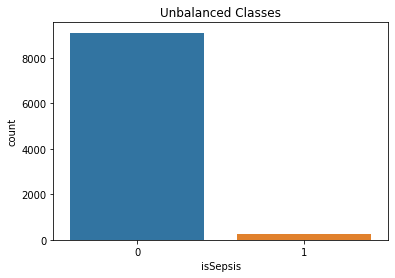

In [ ]:
sns.countplot('isSepsis', data=final)
plt.title('Unbalanced Classes')
plt.show()


In [ ]:
df=final['isSepsis'].value_counts()
df

0    9109
1     277
Name: isSepsis, dtype: int64

In [ ]:
no_sepsis_percent = (df[0]/(df[0]+df[1]))*100
sepsis_percent = (df[1]/(df[0]+df[1]))*100

In [ ]:
print(no_sepsis_percent)
print(sepsis_percent)

97.04879607926699
2.9512039207330067


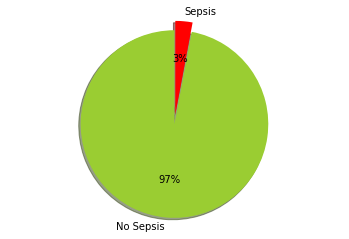

In [ ]:
labels = 'No Sepsis', 'Sepsis'
sizes = [no_sepsis_percent, sepsis_percent]
explode = (0, 0.1)
colors = ['yellowgreen','red']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels,colors=colors, autopct = '%1.0f%%', shadow=True, startangle = 90)
ax1.axis('equal')
#plt.savefig('Saved_Figures/percent_sepsis.png')
plt.show()

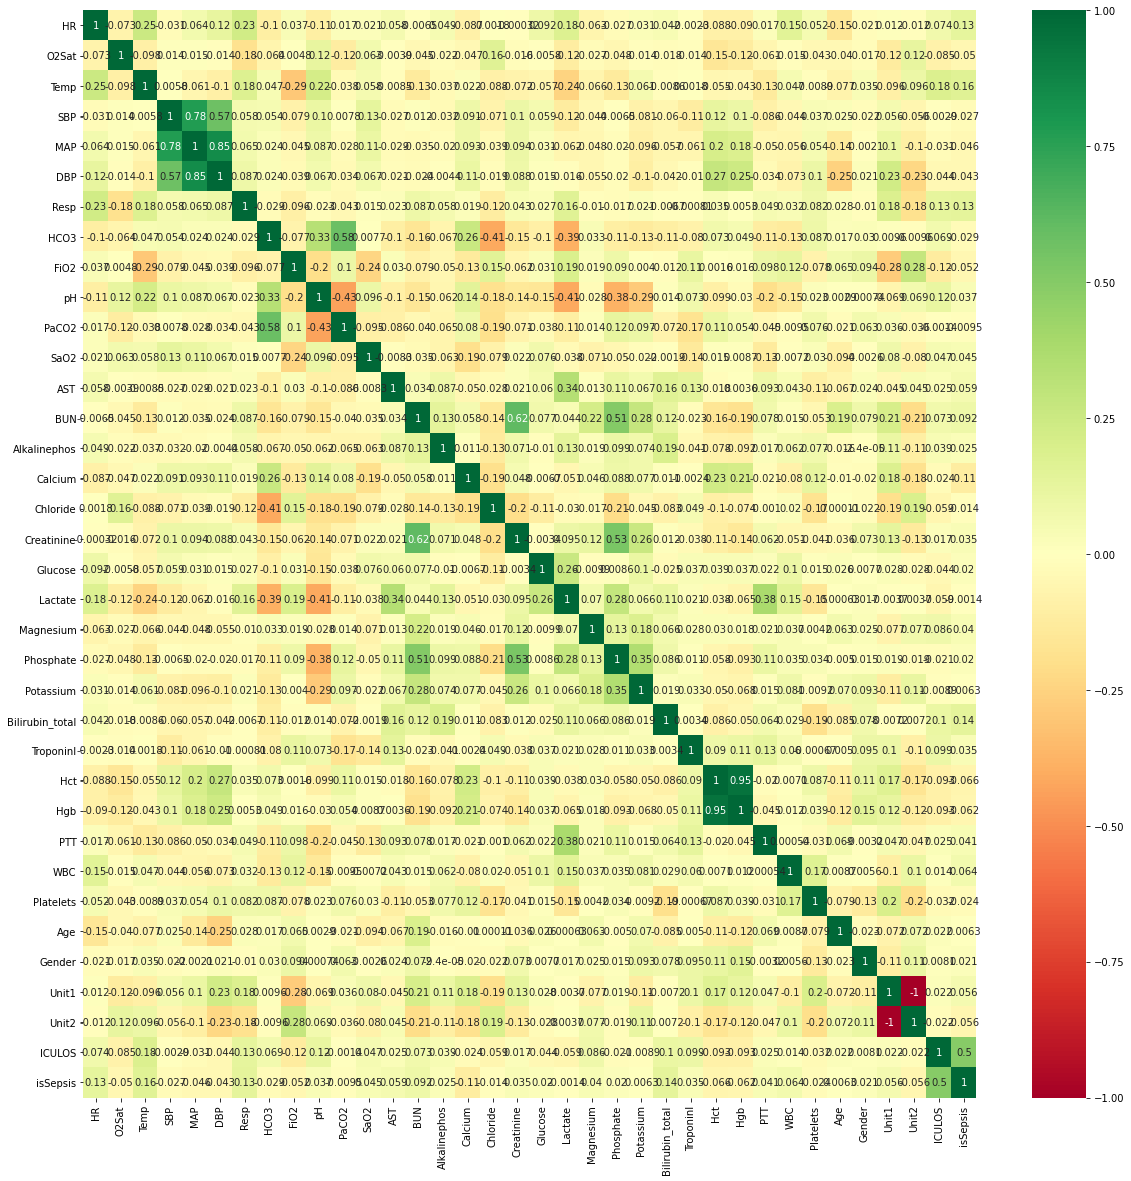

In [ ]:
corrmat=final.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(Sepsisdata[top_corr_features].corr(),annot=True,cmap="RdYlGn")

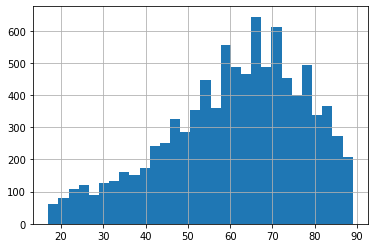

In [ ]:
final[(final['Age']>14) & (final['Age']<100)]['Age'].hist(bins=30)

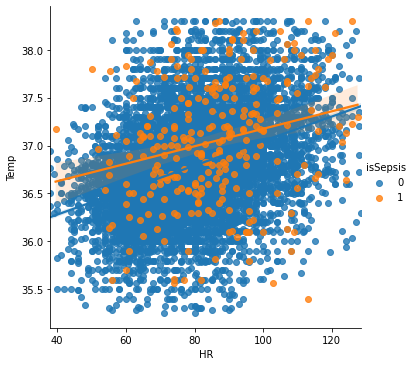

In [ ]:
sns.lmplot( x='HR', y='Temp' ,hue="isSepsis",data=final)

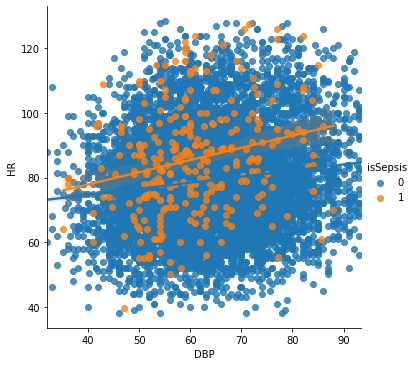

In [ ]:
sns.lmplot( x='DBP', y='HR' ,hue="isSepsis",data=final)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


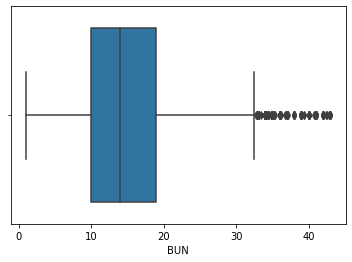

In [ ]:
sns.boxplot(final.BUN)
plt.show()

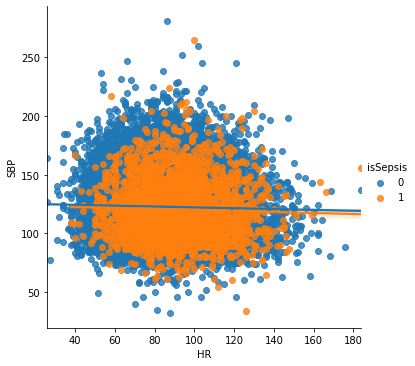

In [ ]:
sns.lmplot( x='HR', y='SBP' ,hue="isSepsis",data=Sepsisdata)

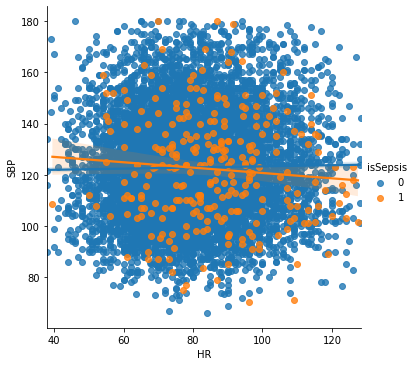

In [ ]:
sns.lmplot( x='HR', y='SBP' ,hue="isSepsis",data=final)

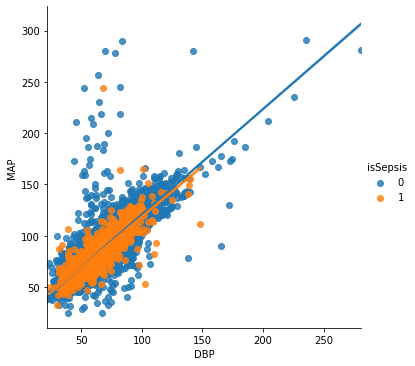

In [ ]:
sns.lmplot( x='DBP', y='MAP' ,hue="isSepsis",data=Sepsisdata)

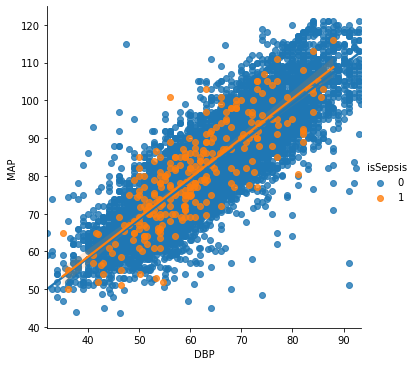

In [ ]:
sns.lmplot( x='DBP', y='MAP' ,hue="isSepsis",data=final)

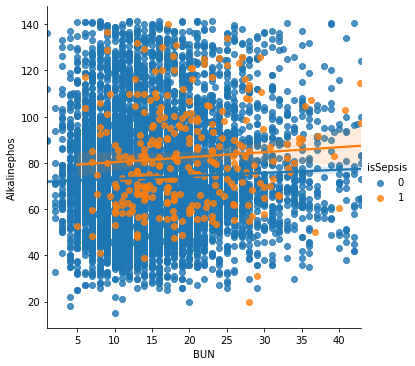

In [ ]:
sns.lmplot( x='BUN', y='Alkalinephos' ,hue="isSepsis",data=final)

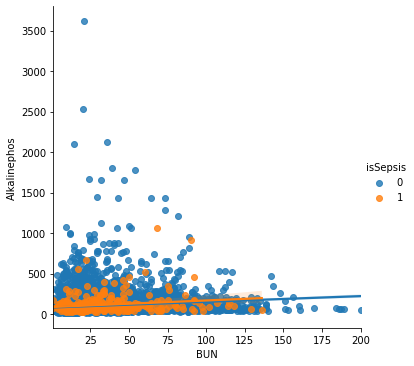

In [ ]:
sns.lmplot( x='BUN', y='Alkalinephos' ,hue="isSepsis",data=Sepsisdata)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


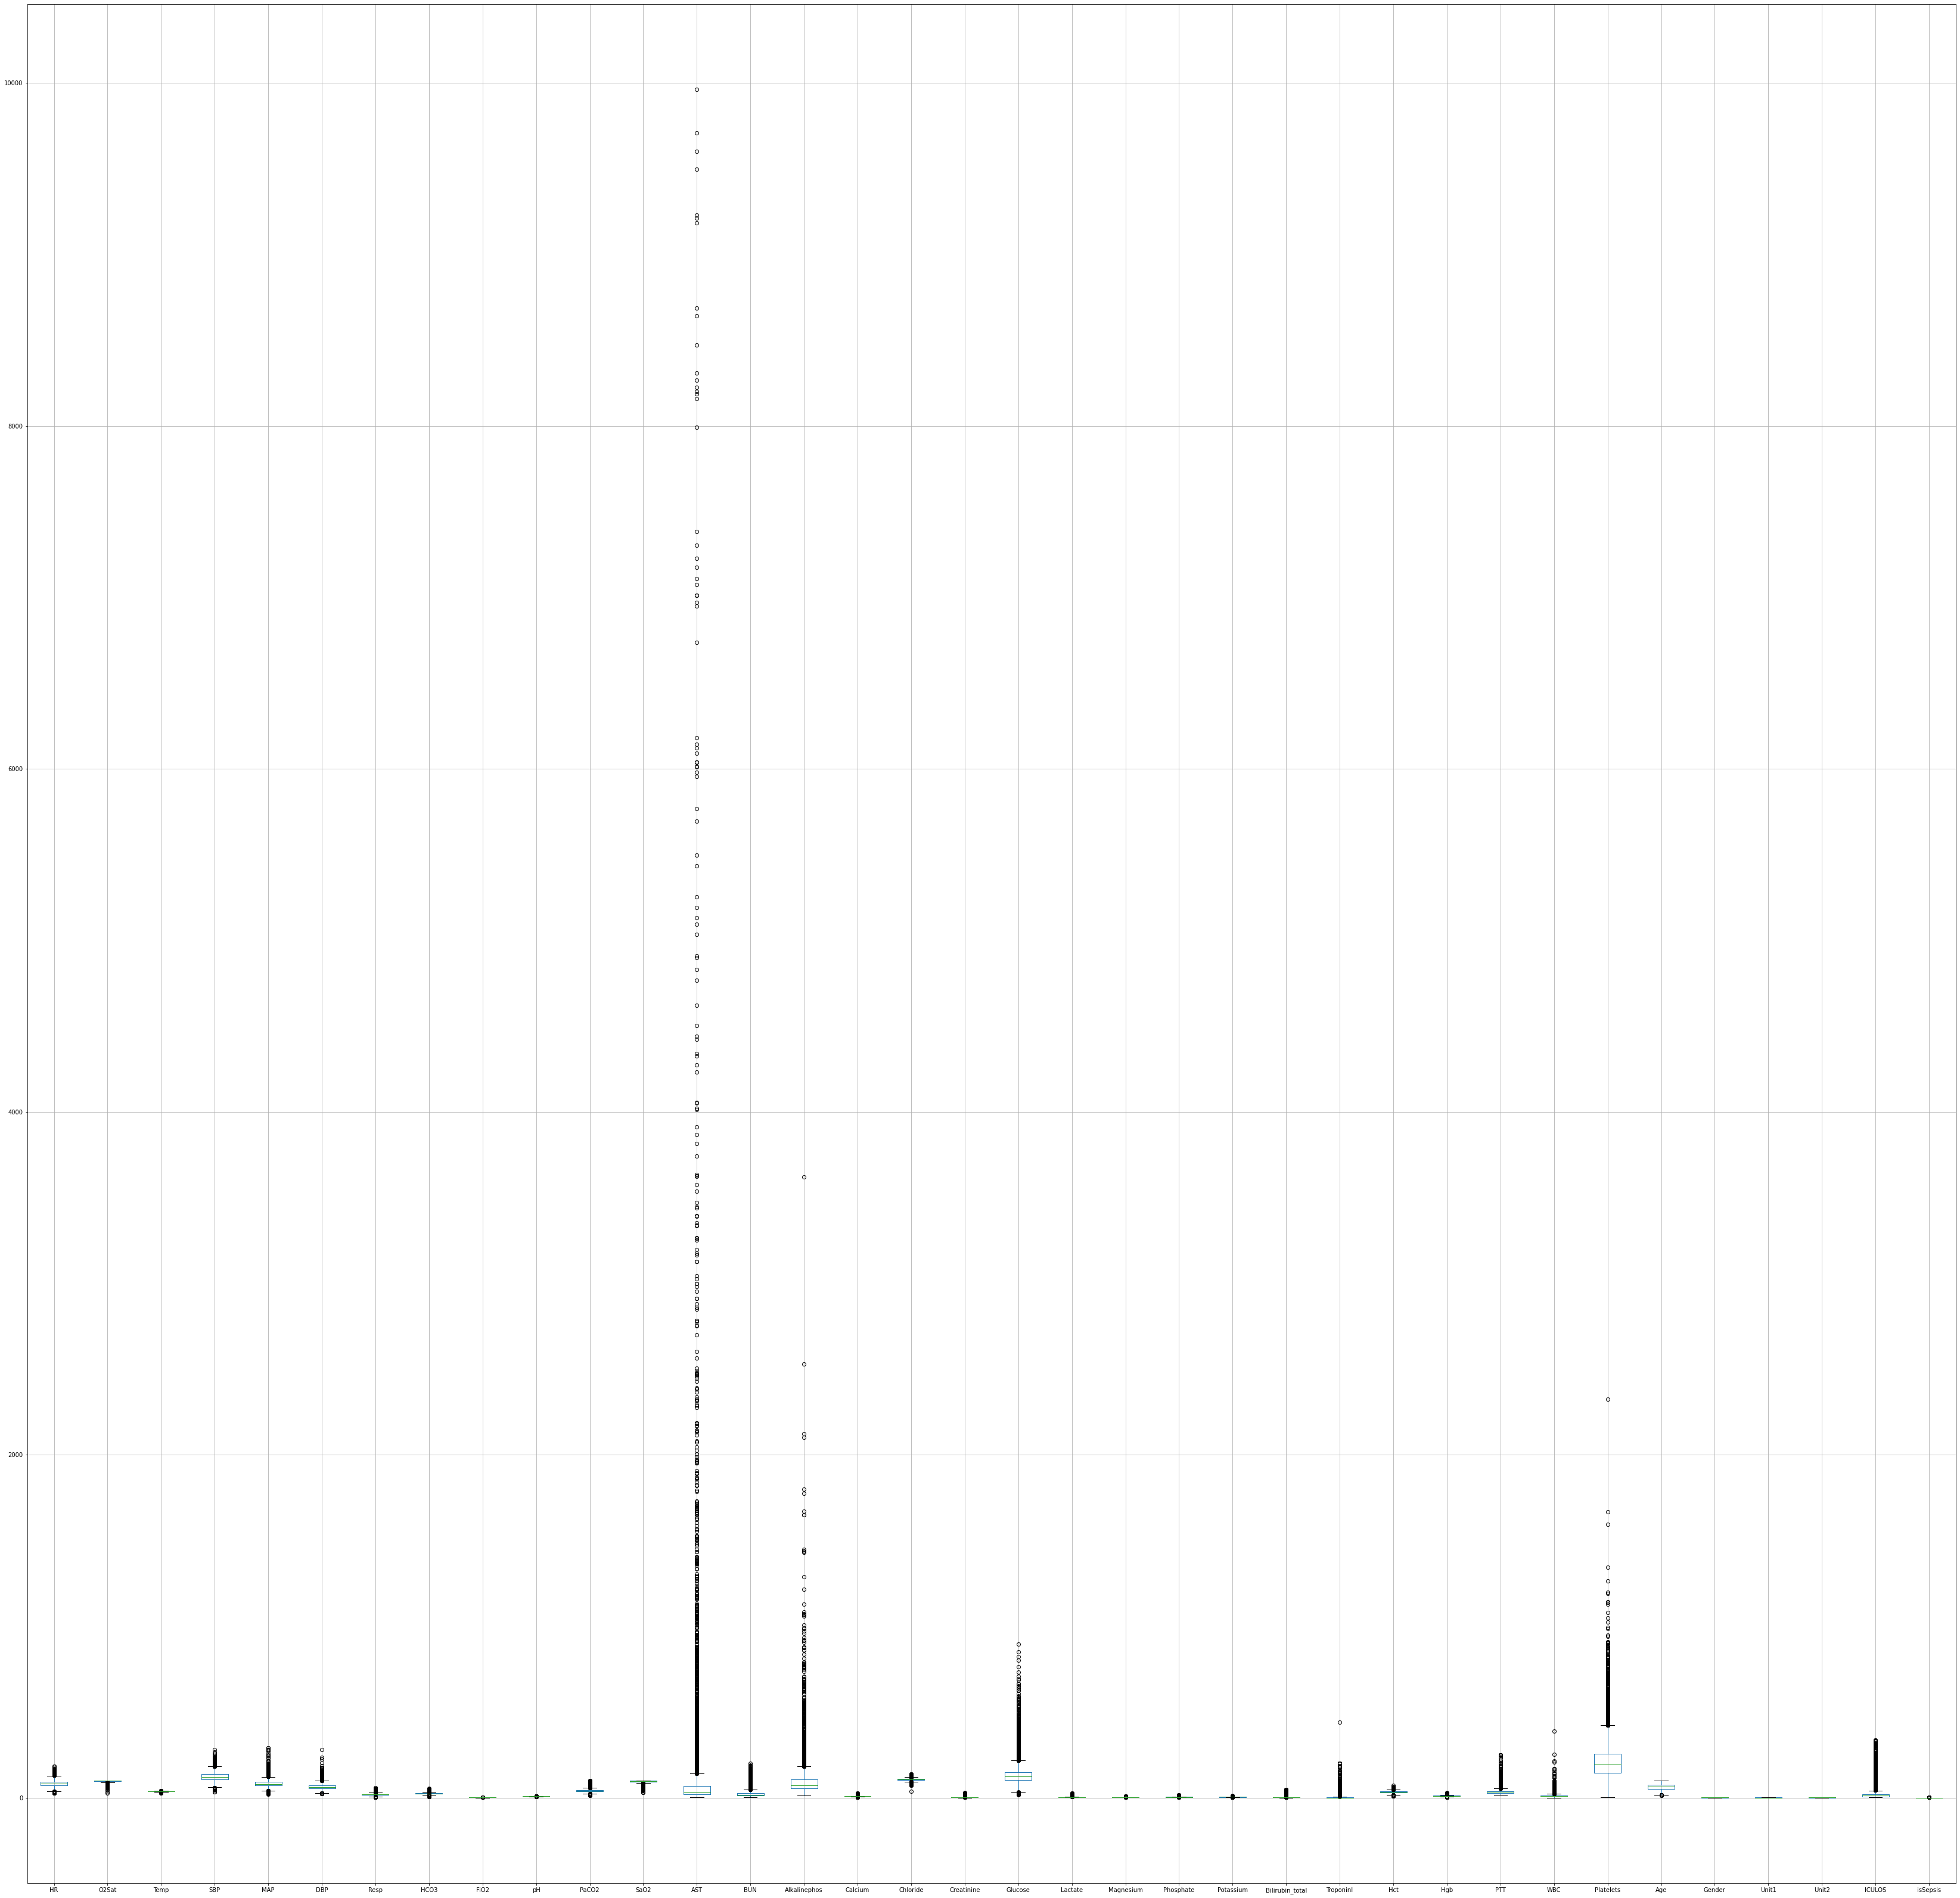

In [ ]:
df = pd.DataFrame(data =Sepsisdata, columns =['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'HCO3', 'FiO2',
       'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium',
       'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS',
       'isSepsis'])
plt.figure(figsize=(58, 58))
df.boxplot()

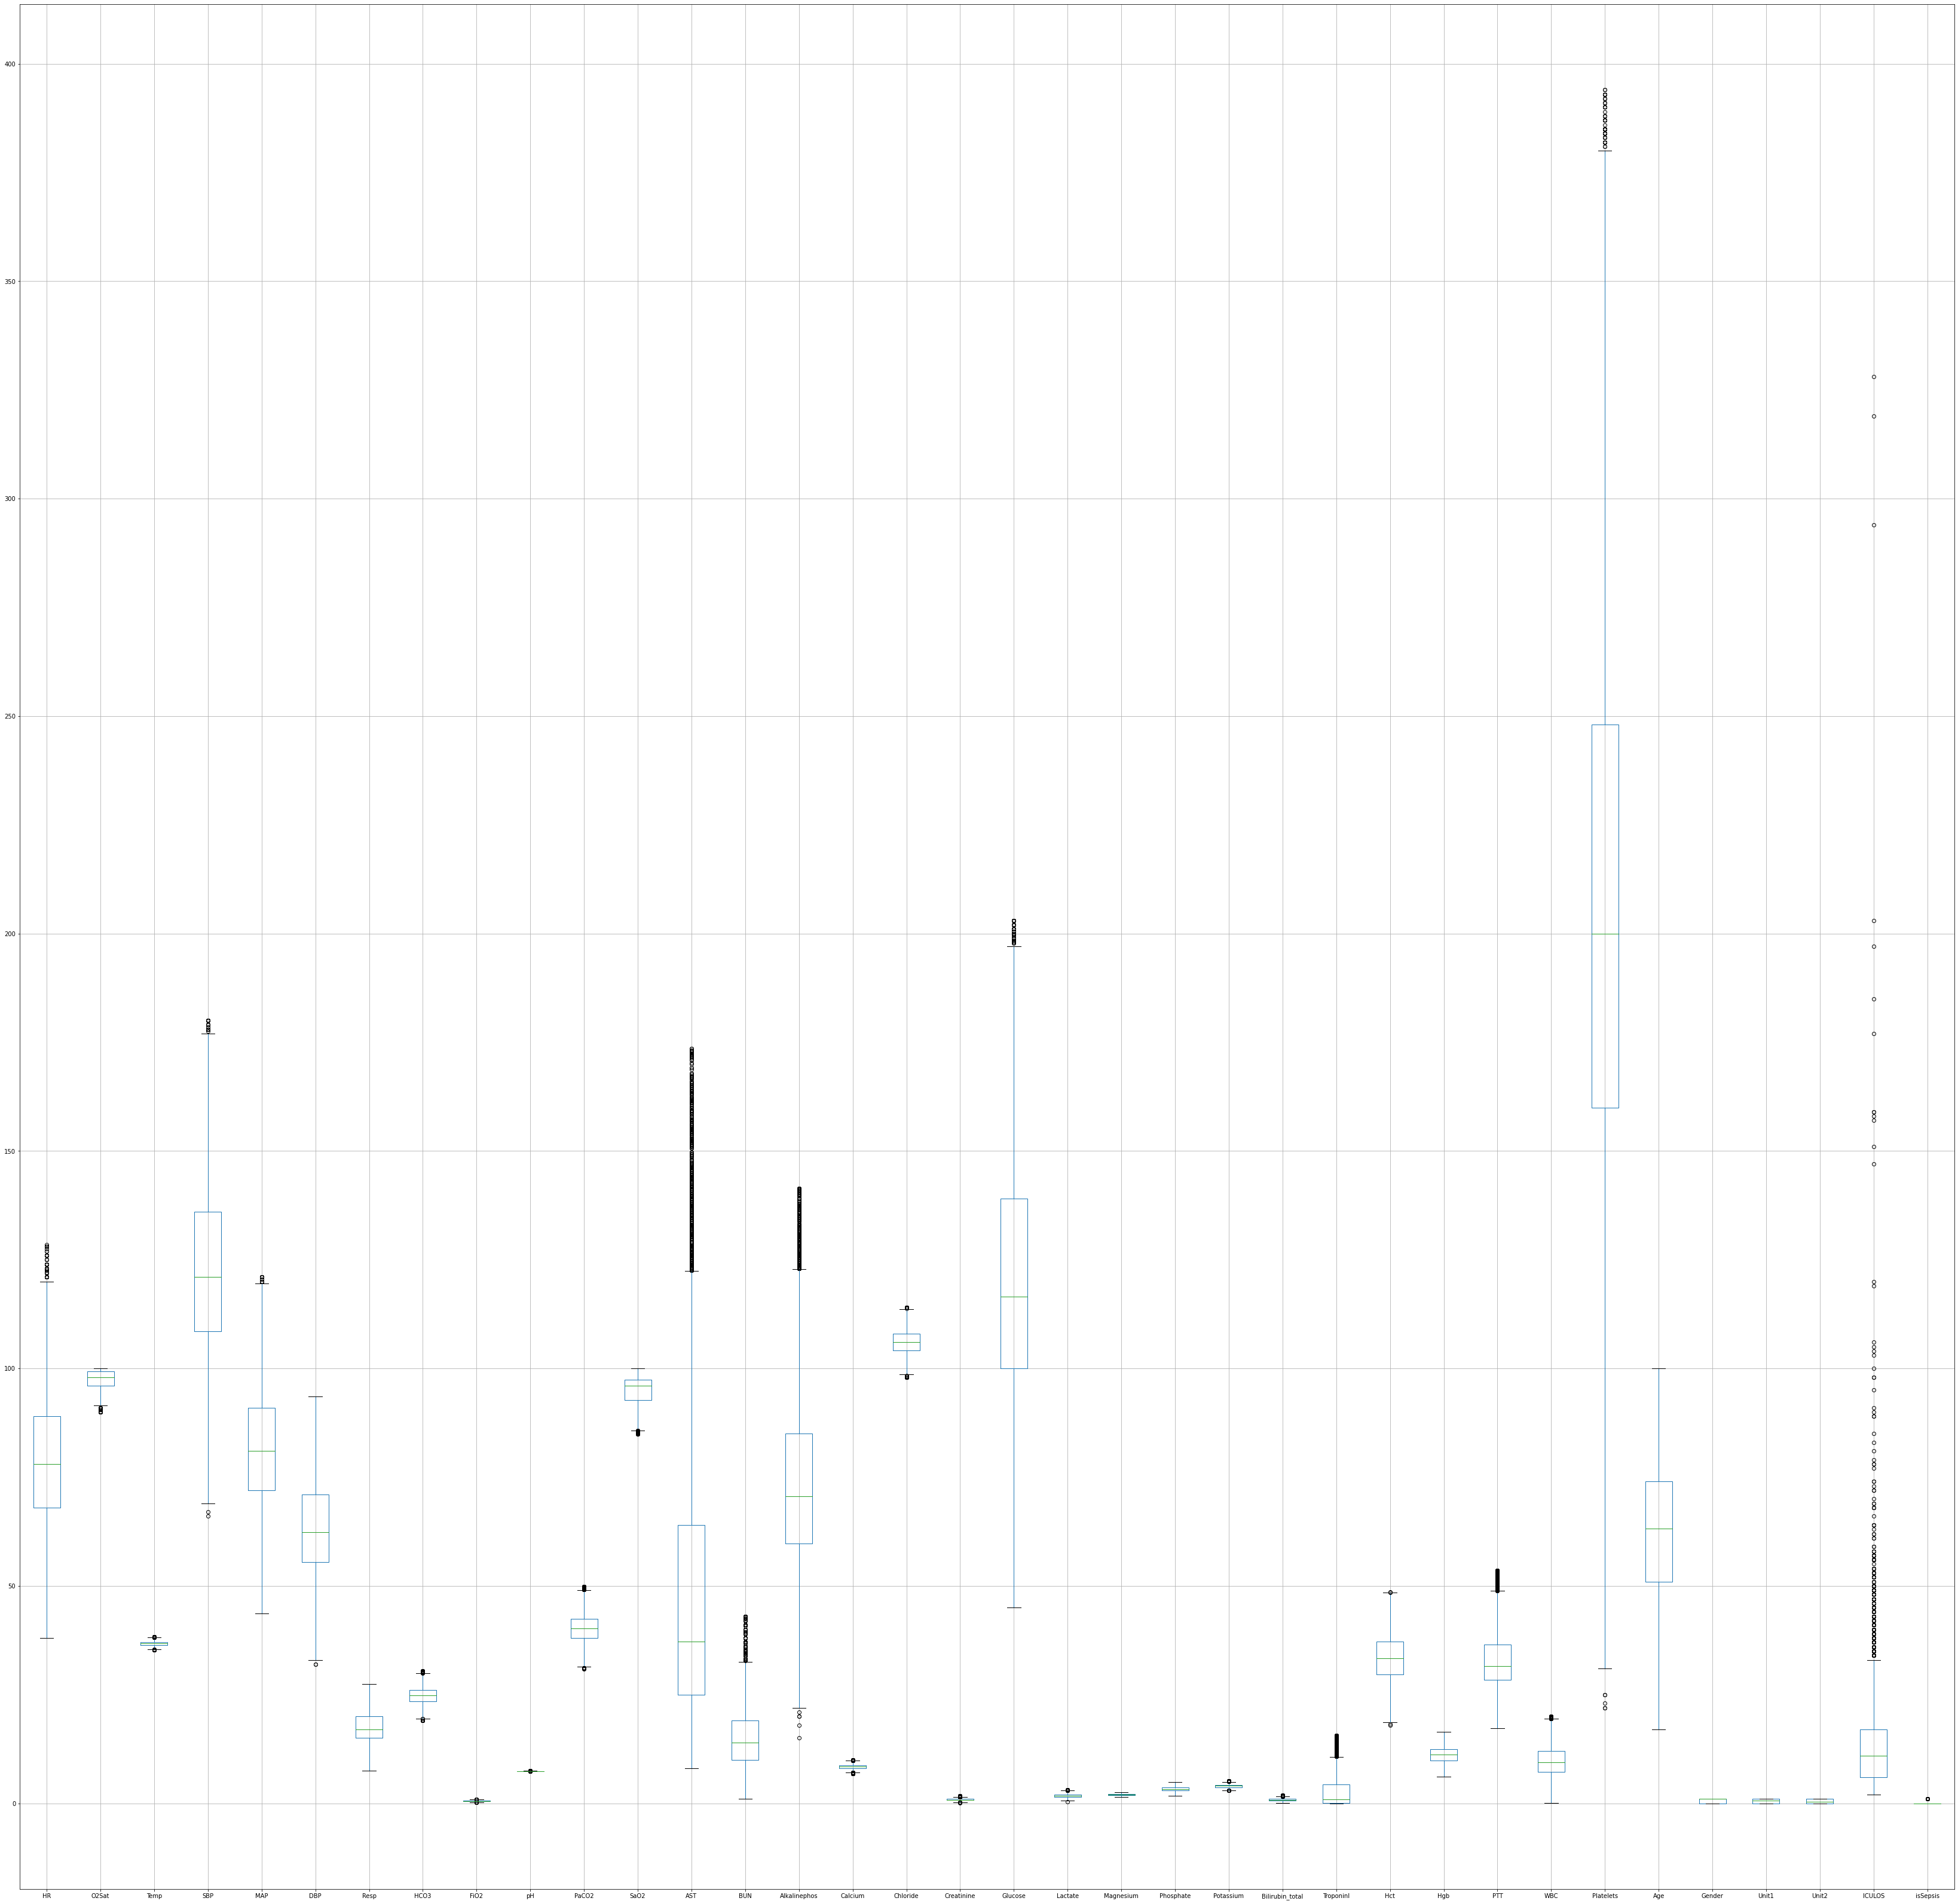

In [ ]:
df = pd.DataFrame(data =final, columns =['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'HCO3', 'FiO2',
       'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium',
       'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS',
       'isSepsis'])
plt.figure(figsize=(58, 58))
df.boxplot()


In [ ]:
final.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'HCO3', 'FiO2',
       'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium',
       'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS',
       'isSepsis'],
      dtype='object')